In [ ]:
#código en Python que detecta automáticamente ese formato latino con AM/PM en español y lo convierte a formato estándar (YYYY-MM-DD HH:MM:SS en 24h).
import pandas as pd
from google.colab import files  # Quitar si usas Jupyter local

def convertir_fechas_latinas_upload():
    """
    Solicita al usuario subir un archivo (CSV o Excel) desde el PC,
    detecta fechas en formato latino con AM/PM en español
    y las convierte a formato estándar (YYYY-MM-DD HH:MM:SS en 24h).
    """
    # Subir archivo desde PC
    print("📂 Sube tu archivo CSV o Excel...")
    uploaded = files.upload()
    archivo = list(uploaded.keys())[0]

    # Detectar extensión y leer archivo
    if archivo.lower().endswith('.csv'):
        df = pd.read_csv(archivo)
    elif archivo.lower().endswith(('.xlsx', '.xls')):
        df = pd.read_excel(archivo)
    else:
        raise ValueError("Formato no soportado. Use CSV o Excel.")

    print("\n📌 Columnas disponibles:")
    print(list(df.columns))
    columna_fecha = input("\n✏️ Escriba el nombre EXACTO de la columna que contiene la fecha y hora: ")

    # Convertir la columna de fecha
    df[columna_fecha] = pd.to_datetime(df[columna_fecha],
                                       dayfirst=True,   # Día primero (latino)
                                       errors='coerce') # Maneja errores

    # Crear nuevas columnas
    df['fecha_sola'] = df[columna_fecha].dt.date
    df['hora_sola'] = df[columna_fecha].dt.time

    print("\n✅ Conversión realizada. Primeros registros:")
    print(df.head())

    # Guardar archivo convertido
    nombre_salida = "archivo_convertido.csv"
    df.to_csv(nombre_salida, index=False)
    files.download(nombre_salida)
    print(f"💾 Archivo guardado como {nombre_salida}")

# Ejecutar la función
convertir_fechas_latinas_upload()

📂 Sube tu archivo CSV o Excel...


Saving 1_etfroniusinverter_2025-07-09_a_2025-07-24_Modifjw1.xlsx to 1_etfroniusinverter_2025-07-09_a_2025-07-24_Modifjw1.xlsx

📌 Columnas disponibles:
['time_index_colombia', 'entity_id', 'E_Wh', 'E_life_Wh', 'Vac_V', 'Iac_A', 'P_W']

✏️ Escriba el nombre EXACTO de la columna que contiene la fecha y hora: time_index_colombia

✅ Conversión realizada. Primeros registros:
      time_index_colombia                     entity_id    E_Wh    E_life_Wh  \
0 2025-07-09 07:44:15.000  fronius_plant_52kWpinverter1  1010.9  214748300.0   
1 2025-07-09 07:40:13.225  fronius_plant_52kWpinverter1   938.4  214748300.0   
2 2025-07-09 07:46:45.930   fronius_plant_45kWinverter3   498.0  104528000.0   
3 2025-07-09 07:39:42.969   fronius_plant_45kWinverter3   455.0  104528000.0   
4 2025-07-09 07:42:44.251   fronius_plant_45kWinverter3   471.0  104528000.0   

   Vac_V  Iac_A     P_W  fecha_sola        hora_sola  
0  282.1   4.02  1124.0  2025-07-09         07:44:15  
1  282.1   3.80  1059.0  2025-07-09  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

💾 Archivo guardado como archivo_convertido.csv


In [ ]:
# Convertir xlsx a csv
# Paso 1: Instalar dependencias si no están presentes
!pip install pandas openpyxl

# Paso 2: Subir archivo desde tu PC
from google.colab import files
import pandas as pd

print("📂 Selecciona el archivo .xlsx que quieres convertir...")
uploaded = files.upload()

# Paso 3: Detectar el nombre del archivo subido
for file_name in uploaded.keys():
    input_path = file_name

# Paso 4: Leer archivo Excel
df = pd.read_excel(input_path)

# Paso 5: Crear nombre para el archivo CSV
output_path = input_path.rsplit('.', 1)[0] + ".csv"

# Paso 6: Guardar como CSV
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"✅ Archivo convertido a CSV: {output_path}")

# Paso 7: Descargar el archivo CSV
files.download(output_path)

📂 Selecciona el archivo .xlsx que quieres convertir...


Saving 1_etfron_Temp_Irradiancia_20_32.xlsx to 1_etfron_Temp_Irradiancia_20_32.xlsx
✅ Archivo convertido a CSV: 1_etfron_Temp_Irradiancia_20_32.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# =========================
# CORRECCIÓN DE IRRADIANCIA según área
# =========================

import pandas as pd
from google.colab import files

# 1️⃣ Subir archivo desde el PC
print("📂 Sube tu archivo CSV con los datos del sistema solar fotovoltaico")
uploaded = files.upload()

# Obtener el nombre del archivo subido
file_name = list(uploaded.keys())[0]

# 2️⃣ Leer el archivo CSV
df = pd.read_csv(file_name)

# 3️⃣ Verificar que la columna P_W existe
if 'P_W' not in df.columns:
    raise ValueError("⚠️ La base de datos no contiene la columna 'P_W'. Verifica el archivo.")

# 4️⃣ Solicitar el área del panel
area = float(input("Ingrese el área del panel en m²: "))

# 5️⃣ Calcular la nueva irradiancia
df['Irradiancia_Wm2'] = df['P_W'] / area

# 6️⃣ Guardar el archivo corregido
output_name = file_name.replace('.csv', f'_Irradiancia_Area{area}.csv')
df.to_csv(output_name, index=False)

print(f"✅ Archivo corregido generado: {output_name}")

# 7️⃣ Descargar el archivo
files.download(output_name)

📂 Sube tu archivo CSV con los datos del sistema solar fotovoltaico


Saving 1_etfron_2025-07-09_a_2025-07-24_Modifjw1_FechasNew.csv to 1_etfron_2025-07-09_a_2025-07-24_Modifjw1_FechasNew.csv
Ingrese el área del panel en m²: 30
✅ Archivo corregido generado: 1_etfron_2025-07-09_a_2025-07-24_Modifjw1_FechasNew_Irradiancia_Area30.0.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
from google.colab import files

# 1️⃣ Subir archivo desde el PC
print("📂 Sube tu archivo CSV")
uploaded = files.upload()

# Obtener el nombre del archivo subido
file_name = list(uploaded.keys())[0]

# 2️⃣ Leer el CSV
df = pd.read_csv(file_name)

# 3️⃣ Renombrar columnas según tu especificación
column_mapping = {
    'fecha_sola': 'Fecha',
    'hora_sola': 'Hora',
    'entity_id': 'Inversor',
    'Temperatura_C': 'T_C',
    'Irradiancia_Wm2': 'Wm2'
}

df = df.rename(columns=column_mapping)

# 4️⃣ Eliminar columna 'time_index_colombia' si existe
if 'time_index_colombia' in df.columns:
    df = df.drop(columns=['time_index_colombia'])

# 5️⃣ Guardar y descargar el archivo modificado
output_name = file_name.replace('.csv', '_modificado.csv')
df.to_csv(output_name, index=False)

print(f"✅ Archivo modificado generado: {output_name}")
files.download(output_name)


📂 Sube tu archivo CSV


Saving 1_etfron_2025-07-09_a_2025-07-24_Modifjw1_FechasNew_Irradiancia_Area30.0.csv to 1_etfron_2025-07-09_a_2025-07-24_Modifjw1_FechasNew_Irradiancia_Area30.0 (1).csv
✅ Archivo modificado generado: 1_etfron_2025-07-09_a_2025-07-24_Modifjw1_FechasNew_Irradiancia_Area30.0 (1)_modificado.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ====== Colab: Cargar CSV, convertir Fecha/Hora y añadir Wind_m/s (sin _dt) ======
import pandas as pd
import numpy as np
from google.colab import files

# 1) Subir archivo
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2) Detectar separador automáticamente
with open(file_name, 'r', encoding='utf-8', errors='ignore') as f:
    head = f.read(2048)
sep = ';' if head.count(';') > head.count(',') else ','

# 3) Leer CSV crudo
df = pd.read_csv(file_name, sep=sep)

# 4) Normalizar AM/PM y limpiar fracciones de segundo
def fix_ampm(s):
    if not isinstance(s, str):
        return s
    return (s.replace("a. m.", "AM").replace("p. m.", "PM")
             .replace("a.m.", "AM").replace("p.m.", "PM")
             .replace(" a. m.", " AM").replace(" p. m.", " PM"))

if 'Fecha' in df.columns:
    df['Fecha'] = df['Fecha'].astype(str).map(fix_ampm)
if 'Hora' in df.columns:
    df['Hora'] = df['Hora'].astype(str).map(fix_ampm)
    df['Hora'] = df['Hora'].str.split('.').str[0].str.strip()  # quitar fracciones de segundo

# 5) Crear FechaHora (prioriza Fecha+Hora, luego Fecha)
if 'Fecha' in df.columns and 'Hora' in df.columns:
    combo = (df['Fecha'].astype(str) + ' ' + df['Hora'].astype(str)).str.strip()
    df['FechaHora'] = pd.to_datetime(combo, dayfirst=True, errors='coerce')
elif 'Fecha' in df.columns:
    df['FechaHora'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')
else:
    df['FechaHora'] = pd.NaT

# 6) Derivar Fecha (date) y Hora (time) limpias
df['Fecha'] = df['FechaHora'].dt.date
df['Hora']  = df['FechaHora'].dt.time

# 7) Redondear Wm2 si existe
if 'Wm2' in df.columns:
    df['Wm2'] = pd.to_numeric(df['Wm2'], errors='coerce').round(2)

# 8) Calcular Wind_m/s usando la hora real
hora = df['FechaHora'].dt.hour.fillna(0)
minu = df['FechaHora'].dt.minute.fillna(0)
hour_frac = hora + minu/60.0

np.random.seed(42)
base = 3.5
amplitud = 1.2
ruido_std = 0.45

# Patrón con pico ~15:00 y valle madrugada
patron = base + amplitud * np.sin((hour_frac - 15) * np.pi / 12)
ruido = np.random.normal(0, ruido_std, len(df))
wind = patron + ruido
wind = np.clip(wind, 0.4, 5.0)

# Ajuste fino del promedio a ~3.5 sin salirse de [0.4, 5.0]
desvio = wind.mean() - 3.5
wind_adj = np.clip(wind - desvio, 0.4, 5.0)

df['Wind_m/s'] = np.round(wind_adj, 2)

# 9) Asegurar que no quede `_dt` por ejecuciones previas
if '_dt' in df.columns:
    df.drop(columns=['_dt'], inplace=True)

# 10) Vista rápida (sin _dt)
print("\n=== Primeras filas ===")
print(df.head())

# 11) Guardar CSV limpio (sin _dt)
out_name = file_name.rsplit('.', 1)[0] + "_con_viento.csv"
if '_dt' in df.columns:
    df = df.drop(columns=['_dt'])
df.to_csv(out_name, index=False)
print(f"\n✅ Archivo con viento guardado como: {out_name}")
files.download(out_name)

📂 Sube tu archivo CSV


Saving 1_etfron_Modifjw1FechasNew_T_Wm2_con_viento (1)_parseado (1)_con_viento.csv to 1_etfron_Modifjw1FechasNew_T_Wm2_con_viento (1)_parseado (1)_con_viento (1).csv

=== Primeras filas ===
        Fecha      Hora  Inversor    E_Wh    E_life_Wh  Vac_V  Iac_A     P_W   T_C       W/m2  Wind_m/s           FechaHora
0  2025-09-07  07:44:15  FR52kWp1  1010.9  214748300.0  282.1   4.02  1124.0  23.4  37.466667      2.08 2025-09-07 07:44:15
1  2025-09-07  07:40:13  FR52kWp1   938.4  214748300.0  282.1   3.80  1059.0  22.9  35.300000      1.80 2025-09-07 07:40:13
2  2025-09-07  07:46:45  FR45kWp3   498.0  104528000.0  225.0   1.21   432.0  23.5  14.400000      2.14 2025-09-07 07:46:45
3  2025-09-07  07:39:42  FR45kWp3   455.0  104528000.0  226.0   1.00   367.0  24.2  12.233333      2.55 2025-09-07 07:39:42
4  2025-09-07  07:42:44  FR45kWp3   471.0  104528000.0  226.0   1.04   381.0  22.8  12.700000      1.75 2025-09-07 07:42:44

✅ Archivo con viento guardado como: 1_etfron_Modifjw1FechasNew_T_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Pone FechaHora al inicio como primera columna Borrarrr
import pandas as pd
from google.colab import files

# 1) Subir archivo CSV
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2) Leer el CSV
df = pd.read_csv(file_name)

# 3) Eliminar columnas 'Fecha' y 'Hora' si existen
cols_to_drop = [c for c in ['Fecha', 'Hora'] if c in df.columns]
df = df.drop(columns=cols_to_drop)

# 4) Mover 'FechaHora' a la primera posición si existe
if 'FechaHora' in df.columns:
    cols = ['FechaHora'] + [c for c in df.columns if c != 'FechaHora']
    df = df[cols]
else:
    print("⚠️ La columna 'FechaHora' no fue encontrada en el archivo.")

# 5) Guardar y descargar CSV modificado
out_name = file_name.rsplit('.', 1)[0] + "_modificado.csv"
df.to_csv(out_name, index=False)
print(f"✅ Archivo guardado como: {out_name}")
files.download(out_name)

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms.csv to 1_etfron_Fechas_T_Wm2Vms.csv
✅ Archivo guardado como: 1_etfron_Fechas_T_Wm2Vms_modificado.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Redondea a dos cifras decimales la columna w/m2 Borrarrr
import pandas as pd
from google.colab import files

# 1) Subir archivo CSV
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2) Leer CSV
df = pd.read_csv(file_name)

# 3) Redondear W/m2 a dos decimales si existe
if 'W/m2' in df.columns:
    df['W/m2'] = pd.to_numeric(df['W/m2'], errors='coerce').round(2)
else:
    print("⚠️ La columna 'W/m2' no se encontró en el archivo.")

# 4) Guardar y descargar
out_name = file_name.rsplit('.', 1)[0] + "_redondeado.csv"
df.to_csv(out_name, index=False)
print(f"✅ Archivo guardado como: {out_name}")
files.download(out_name)

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms1.csv to 1_etfron_Fechas_T_Wm2Vms1.csv
✅ Archivo guardado como: 1_etfron_Fechas_T_Wm2Vms1_redondeado.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Borrarrr
import pandas as pd
import numpy as np
from google.colab import files

print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Detectar separador automáticamente
with open(file_name, 'r', encoding='utf-8', errors='ignore') as f:
    head = f.read(2048)
sep = ';' if head.count(';') > head.count(',') else ','

df = pd.read_csv(file_name, sep=sep)

# 1) Verificar columnas
req = {'Fecha', 'Hora'}
if not req.issubset(df.columns):
    raise ValueError(f"El archivo debe contener columnas {req}. Columnas encontradas: {list(df.columns)}")

# 2) Normalizar strings y AM/PM en español
def norm(x):
    s = str(x).strip()
    # normalizar am/pm en español y variantes
    return (s.replace("a. m.", "AM").replace("p. m.", "PM")
              .replace("a.m.", "AM").replace("p.m.", "PM")
              .replace(" a. m.", " AM").replace(" p. m.", " PM"))

fraw = df['Fecha'].astype(str).map(norm)
hraw = df['Hora'].astype(str).map(norm)

combo = (fraw + ' ' + hraw).str.strip()

# 3) Intentar varios formatos comunes
formats = [
    "%d/%m/%Y %H:%M:%S.%f",
    "%d/%m/%Y %H:%M:%S",
    "%d/%m/%Y %I:%M:%S.%f %p",
    "%d/%m/%Y %I:%M:%S %p",
    "%Y-%m-%d %H:%M:%S.%f",
    "%Y-%m-%d %H:%M:%S",
    "%Y-%m-%d %I:%M:%S.%f %p",
    "%Y-%m-%d %I:%M:%S %p",
]

dt = None
for fmt in formats:
    dt_try = pd.to_datetime(combo, format=fmt, errors='coerce')
    if dt_try.notna().sum() >= 0.9 * len(combo):  # si parsea ≥90%, aceptamos
        dt = dt_try
        break

# 4) Último intento flexible (por si hay mezcla de formatos)
if dt is None or dt.isna().any():
    dt_flex = pd.to_datetime(combo, errors='coerce', dayfirst=True, infer_datetime_format=True)
    # Unir lo que falte
    dt = dt if dt is not None else dt_flex
    dt = dt.fillna(dt_flex)

# 5) Verificación y redondeo a segundos
ok_pct = round(dt.notna().mean()*100, 2)
print(f"✅ Parseo de FechaHora: {ok_pct}% filas reconocidas como datetime.")
if ok_pct == 0:
    raise ValueError("No se pudo convertir ninguna fila a datetime. Revisa ejemplos de 'Fecha' y 'Hora'.")

df['FechaHora'] = dt.dt.floor('S')  # quitar decimales de segundo

# 6) Mostrar muestra y guardar
print("\n=== Muestra de FechaHora ===")
print(df['FechaHora'].head(12))

out_name = file_name.rsplit('.', 1)[0] + "_con_FechaHora.csv"
df.to_csv(out_name, index=False)
print(f"\n💾 Archivo guardado como: {out_name}")
files.download(out_name)

📂 Sube tu archivo CSV


Saving _Borrar1_etfron_Modifjw1FechasNew_T_Wm2.csv to _Borrar1_etfron_Modifjw1FechasNew_T_Wm2 (1).csv


/tmp/ipython-input-2146129375.py:55: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dt_flex = pd.to_datetime(combo, errors='coerce', dayfirst=True, infer_datetime_format=True)
/tmp/ipython-input-2146129375.py:66: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['FechaHora'] = dt.dt.floor('S')  # quitar decimales de segundo


✅ Parseo de FechaHora: 99.91% filas reconocidas como datetime.

=== Muestra de FechaHora ===
0    2025-07-09 07:44:15
1    2025-07-09 07:40:13
2    2025-07-09 07:46:45
3    2025-07-09 07:39:42
4    2025-07-09 07:42:44
5    2025-07-09 07:37:11
6    2025-07-09 07:41:13
7    2025-07-09 07:45:15
8    2025-07-09 07:51:48
9    2025-07-09 07:54:49
10   2025-07-09 08:33:32
11   2025-07-09 08:01:21
Name: FechaHora, dtype: datetime64[ns]

💾 Archivo guardado como: _Borrar1_etfron_Modifjw1FechasNew_T_Wm2 (1)_con_FechaHora.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Convierte xlsx a csv
import pandas as pd
from google.colab import files

# 1) Subir archivo Excel
print("📂 Sube tu archivo .xlsx")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2) Leer Excel (primera hoja por defecto)
df = pd.read_excel(file_name)

# 3) Guardar como CSV
out_name = file_name.rsplit('.', 1)[0] + ".csv"
df.to_csv(out_name, index=False)

print(f"✅ Archivo convertido y guardado como: {out_name}")
files.download(out_name)

📂 Sube tu archivo .xlsx


Saving 1_etfron_Fechas_T_Wm2Vms1.xlsx to 1_etfron_Fechas_T_Wm2Vms1.xlsx
✅ Archivo convertido y guardado como: 1_etfron_Fechas_T_Wm2Vms1.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# ====== Colab: Cargar CSV, convertir Fecha/Hora sin date_parser, explorar y graficar ====== Borrarrrr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# 1) Subir archivo
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2) Detectar separador automáticamente (coma o ;)
with open(file_name, 'r', encoding='utf-8', errors='ignore') as f:
    head = f.read(2048)
sep = ';' if head.count(';') > head.count(',') else ','

# 3) Leer CSV crudo
df = pd.read_csv(file_name, sep=sep)

# 4) Opciones de display (todo en una línea, sin cortes)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', None)

# 5) Normalizar AM/PM en español y limpiar fracciones de segundo
def fix_ampm(s):
    if not isinstance(s, str):
        return s
    return (s.replace("a. m.", "AM").replace("p. m.", "PM")
             .replace("a.m.", "AM").replace("p.m.", "PM")
             .replace(" a. m.", " AM").replace(" p. m.", " PM"))

if 'Fecha' in df.columns:
    df['Fecha'] = df['Fecha'].astype(str).map(fix_ampm)
if 'Hora' in df.columns:
    df['Hora'] = df['Hora'].astype(str).map(fix_ampm)
    # Quitar fracciones de segundo si existen (e.g., 07:44:15.000000)
    df['Hora'] = df['Hora'].str.split('.').str[0].str.strip()

# 6) Convertir a datetime (sin date_parser)
#    Crea FechaHora si hay Fecha y Hora; si no, intenta convertir Fecha sola.
if 'Fecha' in df.columns and 'Hora' in df.columns:
    combo = (df['Fecha'].astype(str) + ' ' + df['Hora'].astype(str)).str.strip()
    df['FechaHora'] = pd.to_datetime(combo, dayfirst=True, errors='coerce')
elif 'Fecha' in df.columns:
    df['FechaHora'] = pd.to_datetime(df['Fecha'], dayfirst=True, errors='coerce')
else:
    df['FechaHora'] = pd.NaT

# 7) Derivar columnas tipadas Fecha (date) y Hora (time) desde FechaHora
df['Fecha'] = df['FechaHora'].dt.date
df['Hora']  = df['FechaHora'].dt.time

# 8) Redondear Wm2 a 2 decimales si existe
if 'Wm2' in df.columns:
    df['Wm2'] = pd.to_numeric(df['Wm2'], errors='coerce').round(2)

# 9) Exploración
print("\n=== INFO ===")
df.info()
print("\n=== DESCRIPTIVE STATS ===")
print(df.describe(include='all'))
print("\n=== NÚMERO DE VALORES ÚNICOS ===")
print(df.nunique())
print("\n=== VALORES NULOS POR COLUMNA ===")
print(df.isnull().sum())
print("\n=== PRIMERAS FILAS ===")
print(df.head())

# 10) Gráficos
time_col = 'FechaHora' if pd.api.types.is_datetime64_any_dtype(df['FechaHora']) else None
num_cols  = df.select_dtypes(include=['number']).columns.tolist()
cat_cols  = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Series de tiempo: SOLO para un día aleatorio
if time_col and df[time_col].notna().any():
    fechas = pd.to_datetime(df[time_col]).dt.date.dropna().unique()
    if len(fechas) > 0:
        fecha_random = np.random.choice(fechas)
        print(f"\n🎯 Graficando series de tiempo para el día aleatorio: {fecha_random}")
        dfd = df[pd.to_datetime(df[time_col]).dt.date == fecha_random].sort_values(time_col)

        for col in num_cols:
            if dfd[col].notna().sum() == 0:
                continue
            plt.figure(figsize=(10, 4))
            sns.lineplot(x=dfd[time_col], y=dfd[col])
            plt.title(f"{col} vs {time_col} — {fecha_random}")
            plt.xlabel("Tiempo"); plt.ylabel(col)
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    else:
        print("\nℹ️ No hay fechas válidas para graficar (FechaHora vacía).")
else:
    print("\nℹ️ No se encontró columna temporal válida para series de tiempo.")

# Barras por categorías (solo categóricas con ≤20 niveles)
for ccat in cat_cols:
    if df[ccat].nunique() <= 20 and df[ccat].notna().sum() > 0:
        for cn in num_cols:
            if df[cn].notna().sum() == 0:
                continue
            plt.figure(figsize=(10, 4))
            sns.barplot(x=ccat, y=cn, data=df, ci=None)
            plt.title(f"{cn} por {ccat}")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

# 11) Guardar CSV limpio y descargar
out_name = file_name.rsplit('.', 1)[0] + "_parseado.csv"
df.to_csv(out_name, index=False)
print(f"\n✅ Archivo limpio guardado como: {out_name}")
files.download(out_name)

In [ ]:
#Identifica si la primera columna tiene nulos y los reporta
import pandas as pd
from google.colab import files

# === 1) Subir CSV desde el PC ===
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# === 2) Leer CSV ===
df = pd.read_csv(file_name)

# === 3) Detectar la primera columna ===
primera_columna = df.columns[0]
print(f"🔍 Primera columna detectada: '{primera_columna}'")

# === 4) Detectar ubicaciones con valores nulos usando df.isnull() ===
mask_nulos = df[primera_columna].isnull()

# Crear reporte con índice y número de fila estilo Excel
reporte = pd.DataFrame({
    "Fila": df.index[mask_nulos] + 2,  # +2 porque fila 1 es encabezado
    "Indice": df.index[mask_nulos],
    "ValorOriginal": df.loc[mask_nulos, primera_columna]
})

# === 5) Mostrar resultados ===
print(f"\nTotal de valores nulos en '{primera_columna}': {mask_nulos.sum()}")
print("\n=== Primeras 20 ubicaciones detectadas ===")
print(reporte.head(20).to_string(index=False))

# === 6) Guardar reporte completo ===
out_name = file_name.rsplit('.', 1)[0] + f"_{primera_columna}_nulas.csv"
reporte.to_csv(out_name, index=False)
print(f"\n💾 Reporte completo guardado como: {out_name}")
files.download(out_name)

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms2.csv to 1_etfron_Fechas_T_Wm2Vms2 (5).csv
🔍 Primera columna detectada: 'FechaHora'

Total de valores nulos en 'FechaHora': 33

=== Primeras 20 ubicaciones detectadas ===
 Fila  Indice ValorOriginal
 2751    2749           NaN
 2868    2866           NaN
 2911    2909           NaN
 3120    3118           NaN
 6568    6566           NaN
 7511    7509           NaN
 7532    7530           NaN
 8101    8099           NaN
 8190    8188           NaN
 9270    9268           NaN
10547   10545           NaN
13431   13429           NaN
13611   13609           NaN
15640   15638           NaN
15653   15651           NaN
16880   16878           NaN
19727   19725           NaN
19734   19732           NaN
20501   20499           NaN
20539   20537           NaN

💾 Reporte completo guardado como: 1_etfron_Fechas_T_Wm2Vms2 (5)_FechaHora_nulas.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Detecta nulos en primera columna los cuenta y borra
import pandas as pd
from google.colab import files

# 1) Subir CSV
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2) Leer CSV (detección simple de separador)
with open(file_name, 'r', encoding='utf-8', errors='ignore') as f:
    head = f.read(2048)
sep = ';' if head.count(';') > head.count(',') else ','
df = pd.read_csv(file_name, sep=sep)

# 3) Detectar primera columna
col = df.columns[0]
print(f"🔎 Primera columna: '{col}'")

# 4) Ubicar nulos en la primera columna
mask = df[col].isnull()
n_nulos = int(mask.sum())
n_total = int(len(df))
pct = (n_nulos / n_total * 100) if n_total else 0

# Reporte de ubicaciones
reporte = pd.DataFrame({
    "Fila": df.index[mask] + 2,        # estilo Excel (1 = encabezado)
    "Indice": df.index[mask],
    "ValorOriginal": df.loc[mask, col]
}).sort_values("Fila")

print(f"\n📊 Total filas: {n_total}")
print(f"❗ Nulos en '{col}': {n_nulos} ({pct:.3f}%)")
print("\n=== Primeras 20 ubicaciones detectadas ===")
print(reporte.head(20).to_string(index=False) if n_nulos > 0 else "No hay nulos.")

# 5) Decidir acción según umbral 0.5%
umbral = 0.5  # porcentaje
if n_nulos > 0 and pct < umbral:
    print(f"\n✅ Nulos < {umbral}% → se eliminarán {n_nulos} filas.")
    df_corr = df.dropna(subset=[col])
    out_name = file_name.rsplit('.', 1)[0] + "_corregido.csv"
    df_corr.to_csv(out_name, index=False)
    print(f"💾 Archivo corregido guardado como: {out_name}")
    files.download(out_name)
elif n_nulos == 0:
    print("\n✅ No hay nulos en la primera columna. No se requiere corrección.")
else:
    print(f"\n⚠️ Nulos ≥ {umbral}% → no se elimina nada. Revisa la calidad de datos antes de continuar.")

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms2.csv to 1_etfron_Fechas_T_Wm2Vms2 (6).csv
🔎 Primera columna: 'FechaHora'

📊 Total filas: 39037
❗ Nulos en 'FechaHora': 33 (0.085%)

=== Primeras 20 ubicaciones detectadas ===
 Fila  Indice ValorOriginal
 2751    2749           NaN
 2868    2866           NaN
 2911    2909           NaN
 3120    3118           NaN
 6568    6566           NaN
 7511    7509           NaN
 7532    7530           NaN
 8101    8099           NaN
 8190    8188           NaN
 9270    9268           NaN
10547   10545           NaN
13431   13429           NaN
13611   13609           NaN
15640   15638           NaN
15653   15651           NaN
16880   16878           NaN
19727   19725           NaN
19734   19732           NaN
20501   20499           NaN
20539   20537           NaN

✅ Nulos < 0.5% → se eliminarán 33 filas.
💾 Archivo corregido guardado como: 1_etfron_Fechas_T_Wm2Vms2 (6)_corregido.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord.csv

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39002 entries, 0 to 39001
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FechaHora  39002 non-null  datetime64[ns]
 1   Inversor   39002 non-null  object        
 2   E_Wh       39002 non-null  float64       
 3   E_life_Wh  39002 non-null  float64       
 4   Vac_V      39002 non-null  float64       
 5   Iac_A      39002 non-null  float64       
 6   P_W        39002 non-null  float64       
 7   T_C        39002 non-null  float64       
 8   W/m2       39002 non-null  float64       
 9   Wind_m/s   39002 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 3.0+ MB

=== DESCRIPTIVE STATS ===
                            FechaHora  Inversor           E_Wh     E_life_Wh         Vac_V         Iac_A           P_W           T_C       

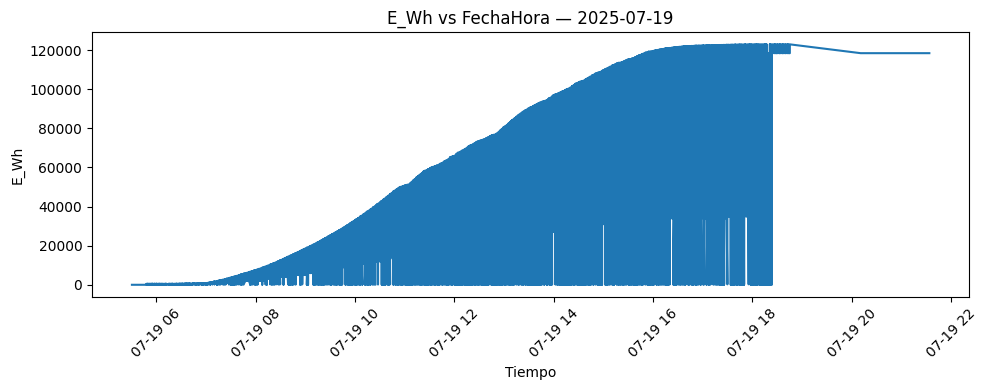

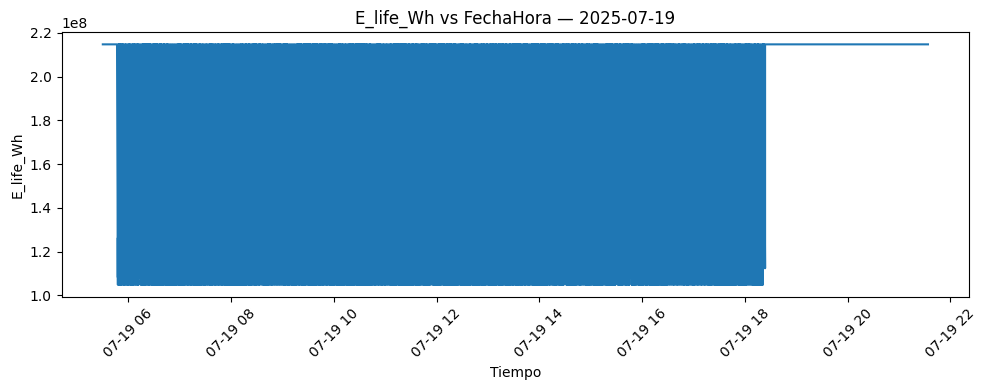

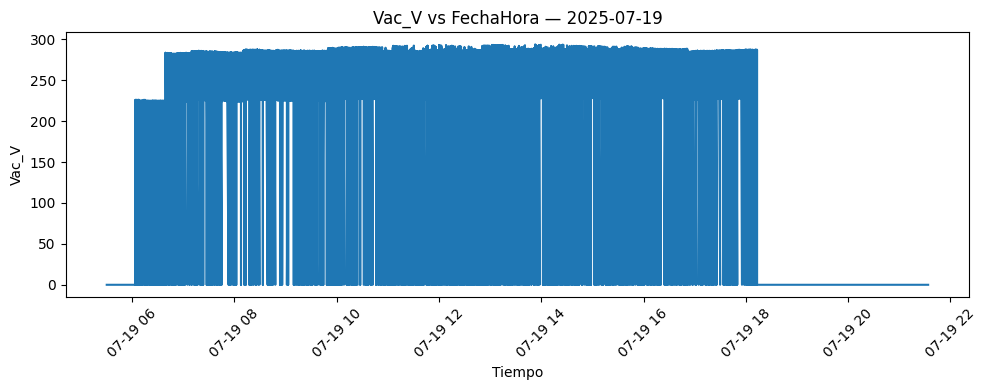

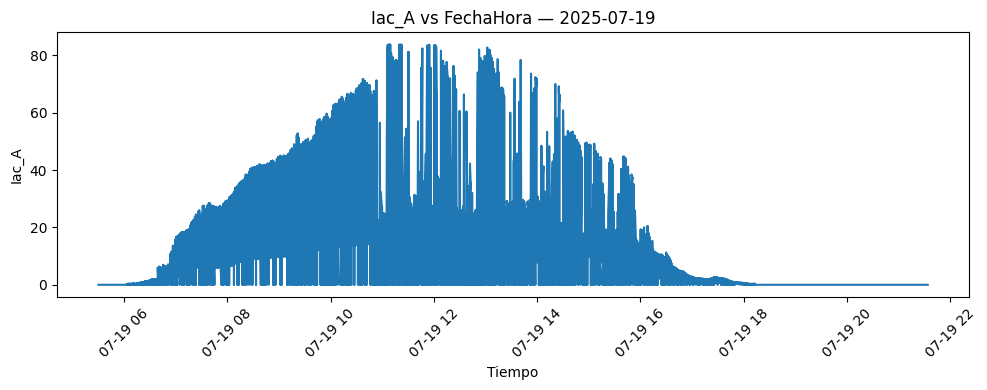

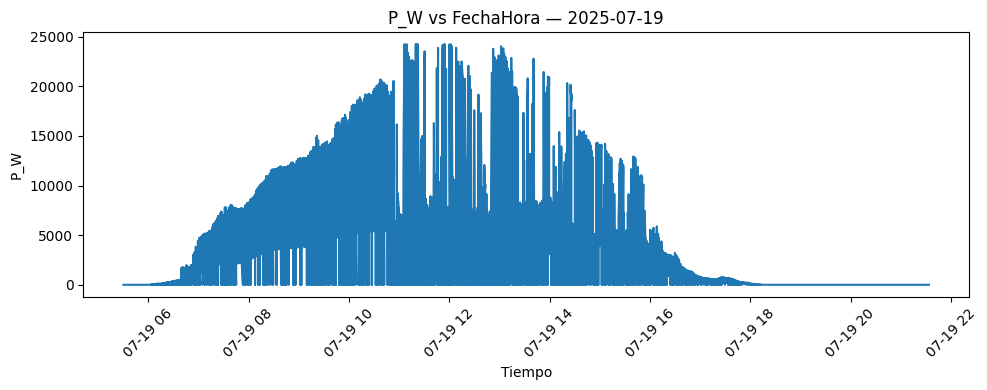

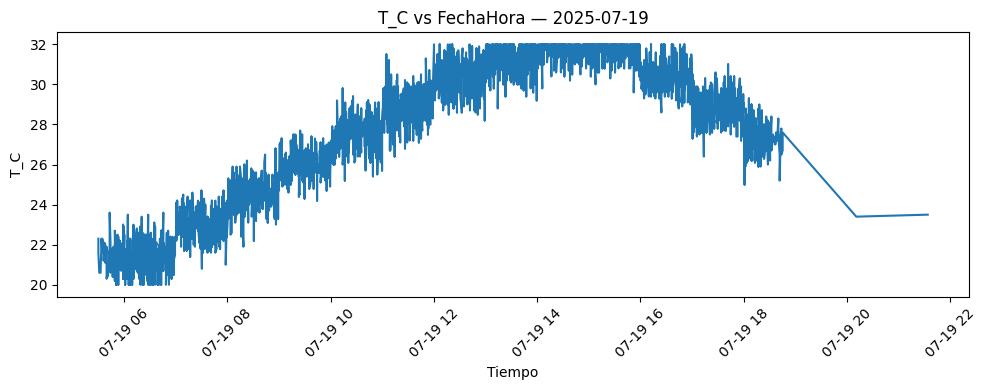

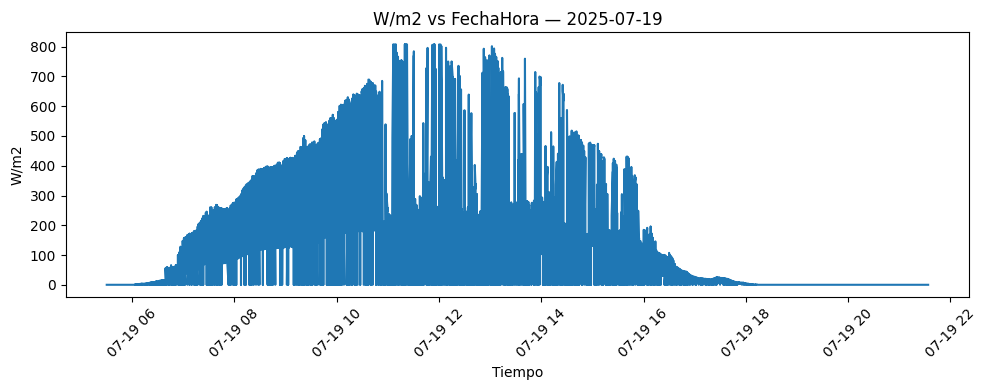

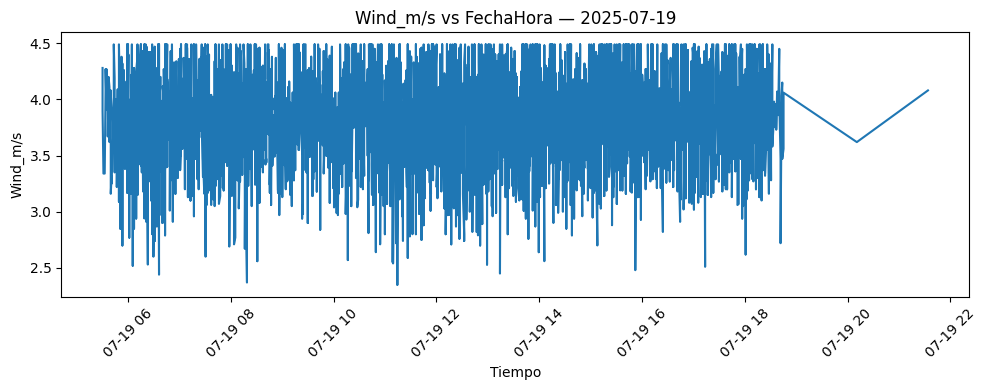

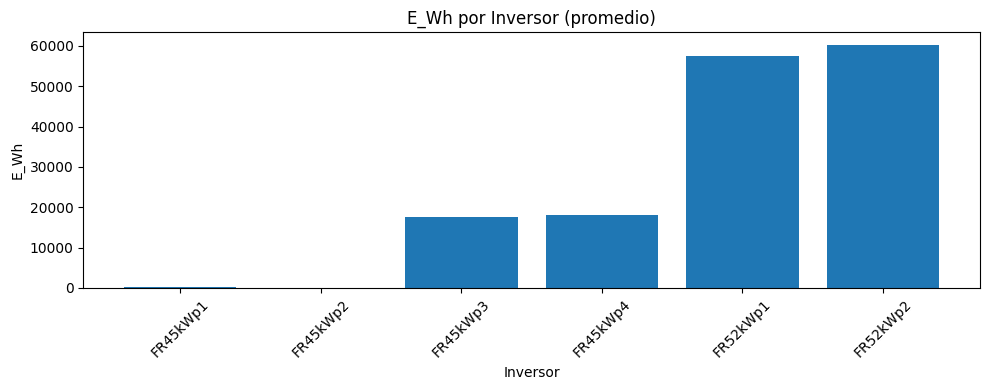

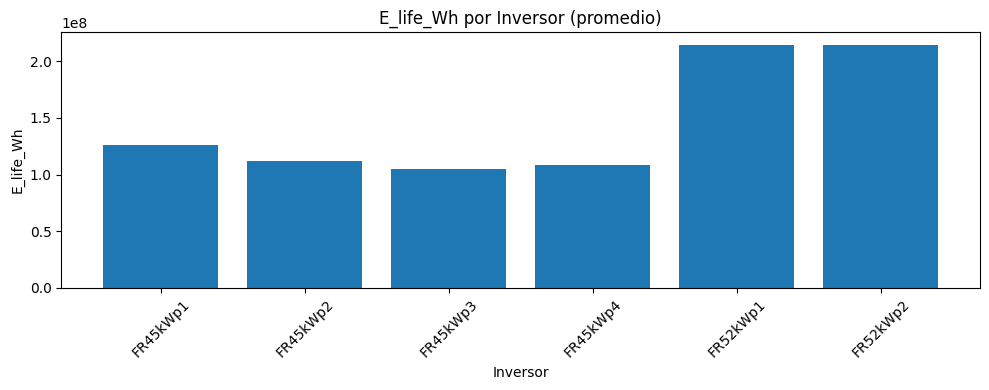

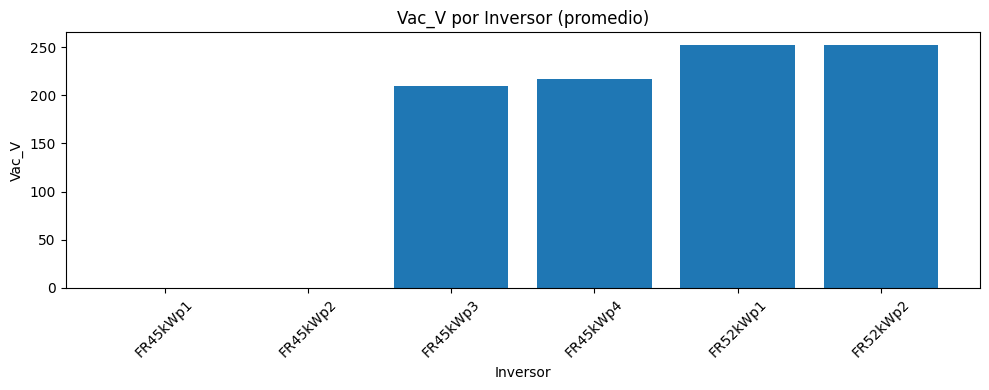

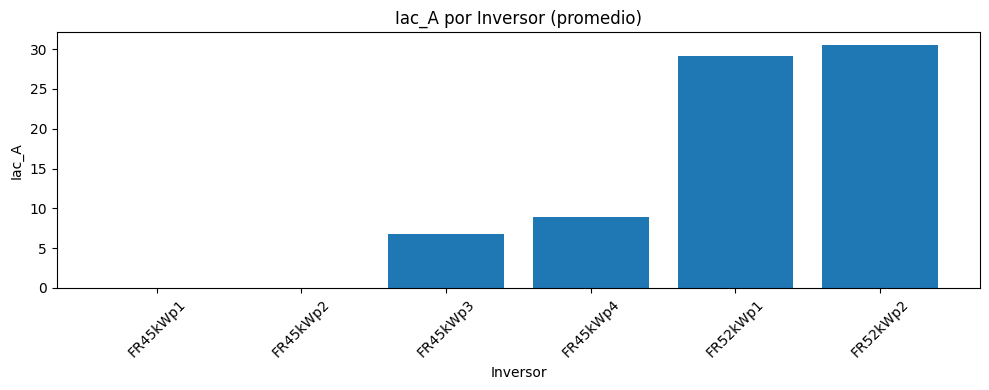

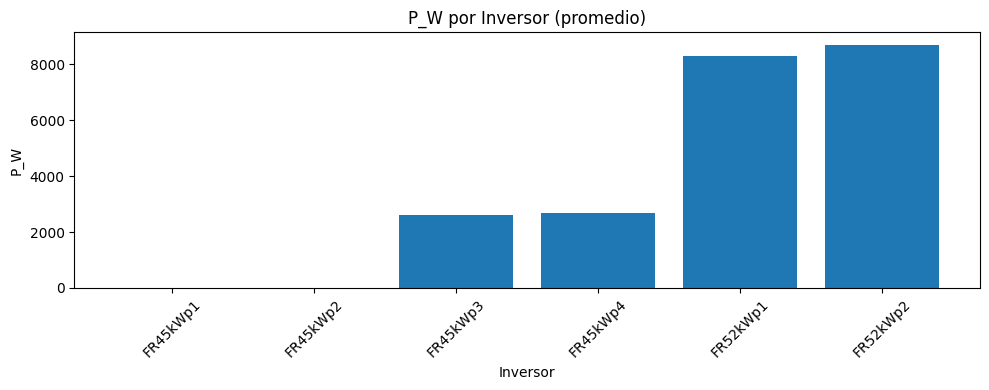

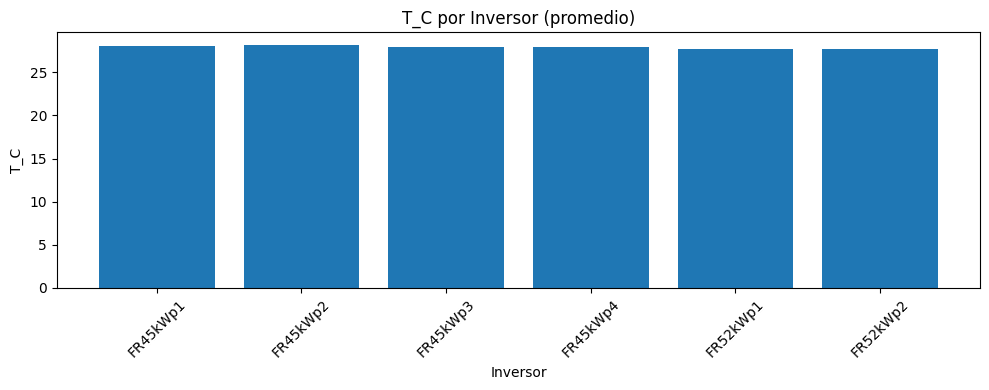

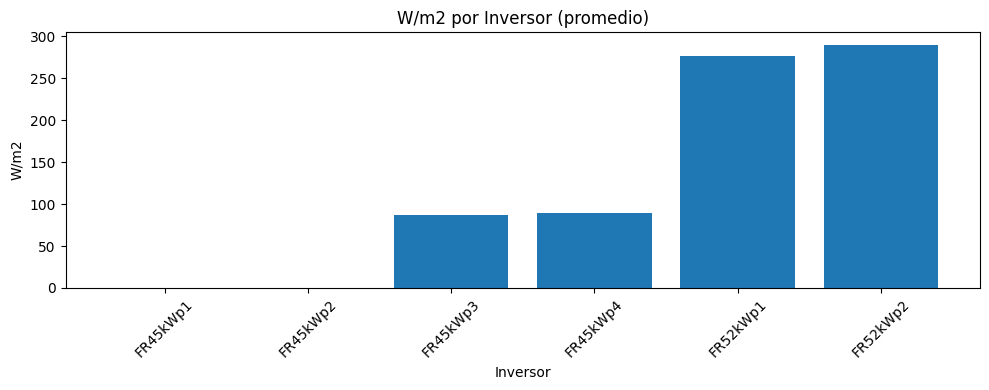

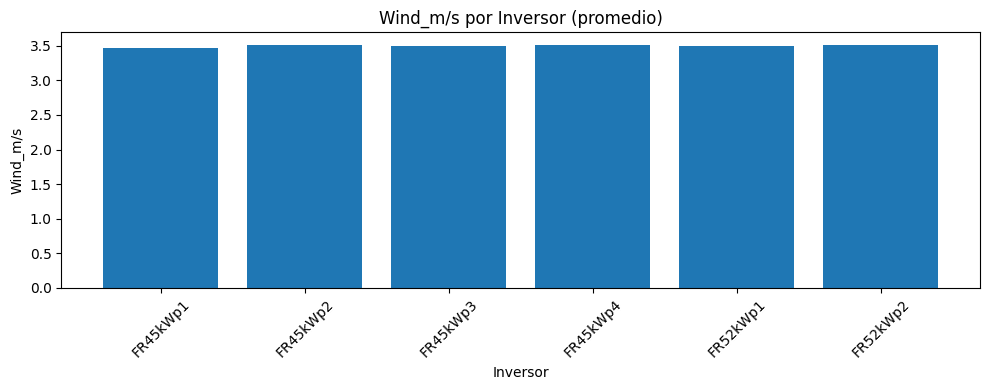

In [ ]:
# === Exploración y gráficos usando FechaHora (Colab) === OK!!!!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1) Subir CSV
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2) Detectar separador y cargar
with open(file_name, 'r', encoding='utf-8', errors='ignore') as f:
    head = f.read(2048)
sep = ';' if head.count(';') > head.count(',') else ','
df = pd.read_csv(file_name, sep=sep)

# 3) Asegurar que 'FechaHora' sea datetime
if 'FechaHora' not in df.columns:
    raise ValueError("No se encontró la columna 'FechaHora' en el CSV.")
df['FechaHora'] = pd.to_datetime(df['FechaHora'], errors='coerce')
if df['FechaHora'].isna().all():
    raise ValueError("'FechaHora' no pudo convertirse a datetime. Revisa el formato de la columna.")

# 4) Exploración rápida
print("\n=== INFO ===")
df.info()

print("\n=== DESCRIPTIVE STATS ===")
print(df.describe(include='all'))

print("\n=== NÚMERO DE VALORES ÚNICOS ===")
print(df.nunique())

print("\n=== VALORES NULOS POR COLUMNA ===")
print(df.isnull().sum())

print("\n=== PRIMERAS FILAS ===")
print(df.head())

# 5) Columnas por tipo
time_col = 'FechaHora'
numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != time_col]
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# 6) Series de tiempo para un día ALEATORIO (rango completo del día)
# np.random.seed(123)  # ← Descomenta para que el día aleatorio sea siempre el mismo
fechas_disp = df[time_col].dt.date.dropna().sort_values().unique()
if fechas_disp.size == 0:
    raise ValueError("No hay fechas válidas en la columna FechaHora.")

fecha_plot = np.random.choice(fechas_disp)  # ← Día aleatorio disponible en el CSV
print(f"\n🎯 Graficando series de tiempo para el día aleatorio: {fecha_plot}")

inicio_dia = pd.Timestamp(fecha_plot)
fin_dia = inicio_dia + pd.Timedelta(days=1)
dft = df[(df[time_col] >= inicio_dia) & (df[time_col] < fin_dia)].sort_values(time_col)

if len(numeric_cols) == 0:
    print("\nℹ️ No se encontraron columnas numéricas para graficar series de tiempo.")
else:
    for col in numeric_cols:
        if dft[col].notna().sum() == 0:
            continue
        plt.figure(figsize=(10,4))
        plt.plot(dft[time_col], dft[col])
        plt.title(f"{col} vs {time_col} — {fecha_plot}")
        plt.xlabel("Tiempo"); plt.ylabel(col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# 7) Barras por categorías (promedio por categoría, usando TODO el dataset)
max_levels = 20
for ccat in cat_cols:
    nunq = df[ccat].nunique(dropna=True)
    if nunq == 0 or nunq > max_levels:
        continue
    for cn in numeric_cols:
        if df[cn].notna().sum() == 0:
            continue
        agg = df.groupby(ccat, dropna=False)[cn].mean().reset_index()
        plt.figure(figsize=(10,4))
        plt.bar(agg[ccat].astype(str), agg[cn])
        plt.title(f"{cn} por {ccat} (promedio)")
        plt.xlabel(ccat); plt.ylabel(cn)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

In [ ]:
#Busca valores nulos para la columna que selecciones y reporta su ubicación
import pandas as pd
from google.colab import files

# === 1) Subir CSV desde el PC ===
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# === 2) Leer CSV ===
df = pd.read_csv(file_name)

# === 3) Mostrar columnas disponibles y pedir al usuario cuál analizar ===
print("\n📋 Columnas disponibles en el archivo:")
for i, col in enumerate(df.columns):
    print(f"{i+1}. {col}")

columna_objetivo = input("\n✏️ Escribe exactamente el nombre de la columna que deseas analizar para valores nulos: ").strip()

if columna_objetivo not in df.columns:
    raise ValueError(f"⚠️ La columna '{columna_objetivo}' no existe en el archivo.")

# === 4) Detectar ubicaciones con valores nulos usando df.isnull() ===
mask_nulos = df[columna_objetivo].isnull()

# Crear reporte con índice y número de fila estilo Excel
reporte = pd.DataFrame({
    "Fila": df.index[mask_nulos] + 2,  # +2 porque fila 1 es encabezado
    "Indice": df.index[mask_nulos],
    "ValorOriginal": df.loc[mask_nulos, columna_objetivo]
})

# === 5) Mostrar resultados ===
total_nulos = mask_nulos.sum()
print(f"\nTotal de valores nulos en '{columna_objetivo}': {total_nulos}")
if total_nulos > 0:
    print("\n=== Primeras 20 ubicaciones detectadas ===")
    print(reporte.head(20).to_string(index=False))
else:
    print("✅ No se encontraron valores nulos en esta columna.")

# === 6) Guardar reporte completo ===
if total_nulos > 0:
    out_name = file_name.rsplit('.', 1)[0] + f"_{columna_objetivo}_nulas.csv"
    reporte.to_csv(out_name, index=False)
    print(f"\n💾 Reporte completo guardado como: {out_name}")
    files.download(out_name)

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms3.csv to 1_etfron_Fechas_T_Wm2Vms3.csv

📋 Columnas disponibles en el archivo:
1. FechaHora
2. Inversor
3. E_Wh
4. E_life_Wh
5. Vac_V
6. Iac_A
7. P_W
8. T_C
9. W/m2
10. Wind_m/s

✏️ Escribe exactamente el nombre de la columna que deseas analizar para valores nulos: W/m2

Total de valores nulos en 'W/m2': 0
✅ No se encontraron valores nulos en esta columna.


In [ ]:
# Ordena CVS según fecha y hora
# === Ordenar por FechaHora con verificación visual (Colab) ===
import pandas as pd
import numpy as np
from google.colab import files

# 1) Subir archivo
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2) Leer CSV
df = pd.read_csv(file_name)

# 3) Validar columna FechaHora y convertir a datetime si hace falta
if "FechaHora" not in df.columns:
    raise ValueError("❌ No se encontró la columna 'FechaHora' en el archivo.")

if not pd.api.types.is_datetime64_any_dtype(df["FechaHora"]):
    df["FechaHora"] = pd.to_datetime(df["FechaHora"], errors="coerce")

if df["FechaHora"].isna().all():
    raise ValueError("❌ 'FechaHora' no es convertible a datetime. Revisa el formato.")

# 4) Verificación ANTES
print("\n=== ANTES de ordenar ===")
print("Primeras 5 fechas:\n", df["FechaHora"].head().to_string(index=False))
print("\nÚltimas 5 fechas:\n", df["FechaHora"].tail().to_string(index=False))

# Conteo de transiciones fuera de orden (inversiones)
diff = df["FechaHora"].diff()
inversiones = int((diff < pd.Timedelta(0)).sum())
print(f"\n🔎 Transiciones fuera de orden (inversiones): {inversiones}")

# 5) ¿Está ordenado?
esta_ordenada = df["FechaHora"].is_monotonic_increasing

if esta_ordenada:
    print("\n✅ La columna 'FechaHora' ya está ordenada (ascendente).")
    df_out = df.copy()
else:
    print("\n⚠️ La columna 'FechaHora' NO está ordenada. Ordenando…")
    df_out = df.sort_values("FechaHora").reset_index(drop=True)
    print("✅ Ordenado por 'FechaHora' (ascendente).")

    # Verificación DESPUÉS
    print("\n=== DESPUÉS de ordenar ===")
    print("Primeras 5 fechas:\n", df_out["FechaHora"].head().to_string(index=False))
    print("\nÚltimas 5 fechas:\n", df_out["FechaHora"].tail().to_string(index=False))

    diff_after = df_out["FechaHora"].diff()
    inversiones_after = int((diff_after < pd.Timedelta(0)).sum())
    print(f"\n🔁 Transiciones fuera de orden tras ordenar: {inversiones_after}")

# 6) Guardar y descargar
suffix = "_ordenado" if not esta_ordenada else "_sin_cambios"
out_name = file_name.rsplit(".", 1)[0] + f"{suffix}.csv"
df_out.to_csv(out_name, index=False)
files.download(out_name)
print(f"\n💾 Archivo guardado como: {out_name}")

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord.csv

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39002 entries, 0 to 39001
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FechaHora  39002 non-null  datetime64[ns]
 1   Inversor   39002 non-null  object        
 2   E_Wh       39002 non-null  float64       
 3   E_life_Wh  39002 non-null  float64       
 4   Vac_V      39002 non-null  float64       
 5   Iac_A      39002 non-null  float64       
 6   P_W        39002 non-null  float64       
 7   T_C        39002 non-null  float64       
 8   W/m2       39002 non-null  float64       
 9   Wind_m/s   39002 non-null  float64       
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 3.0+ MB

=== DESCRIPTIVE STATS ===
                            FechaHora  Inversor           E_Wh     E_life_Wh  \
count                           39002     39002   39002.000

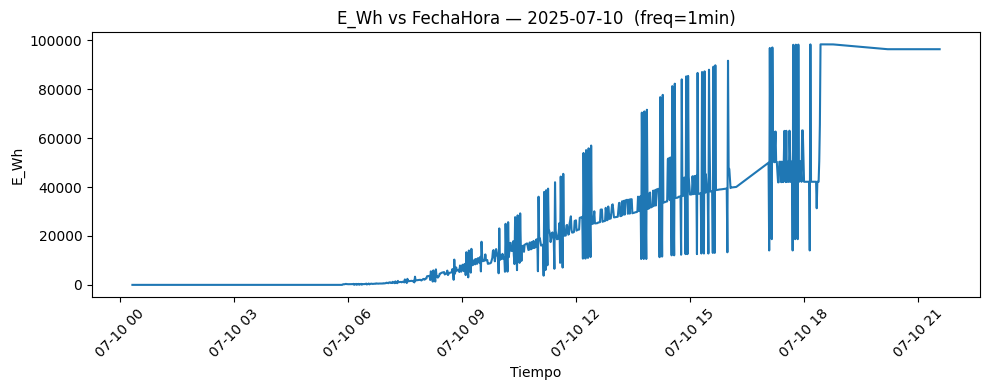

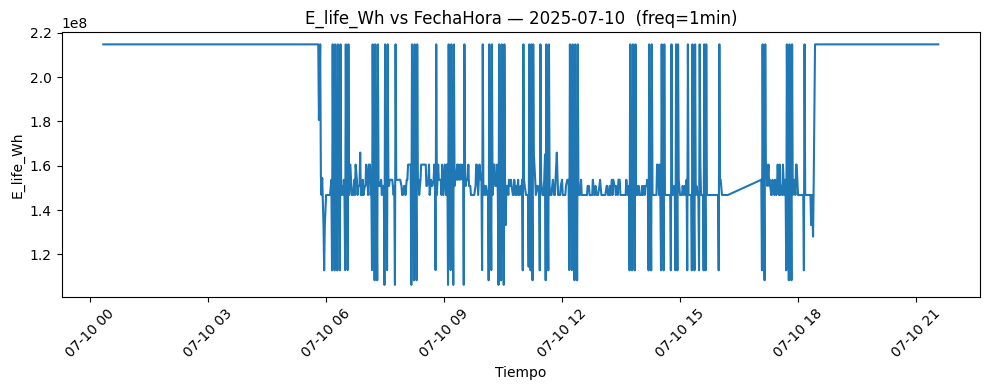

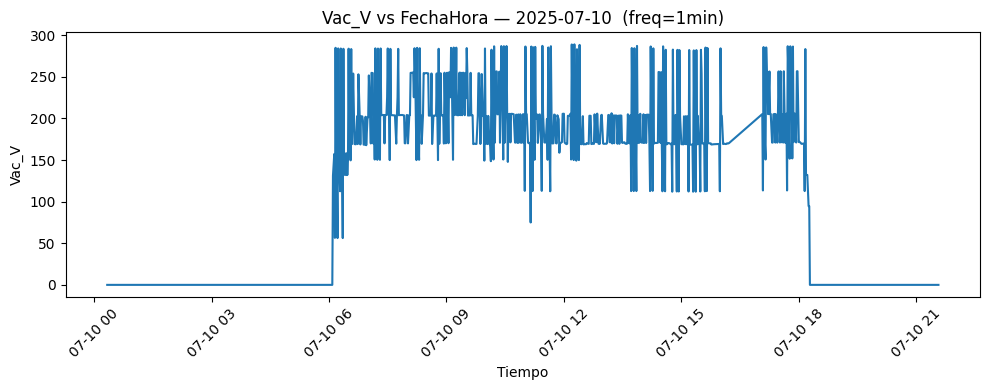

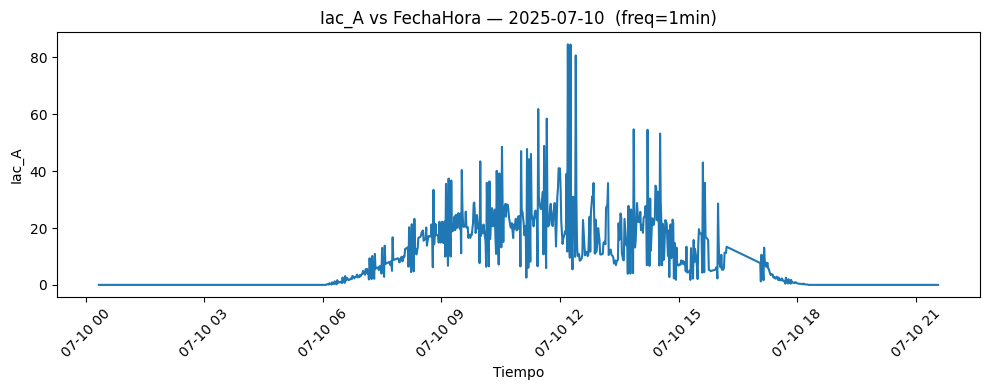

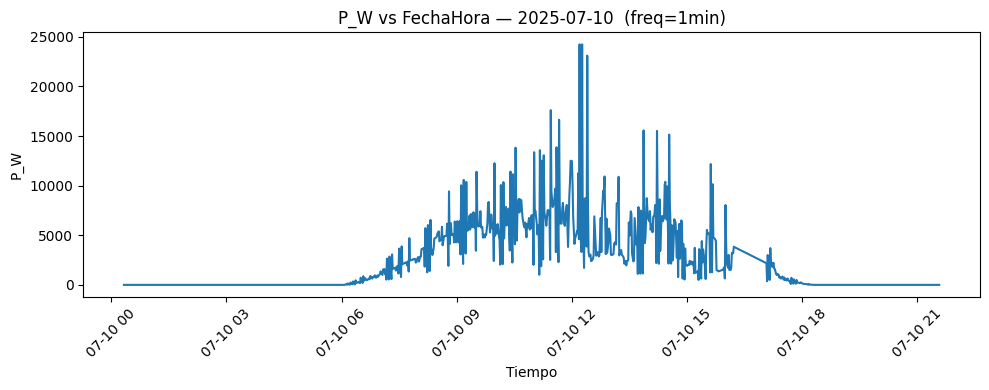

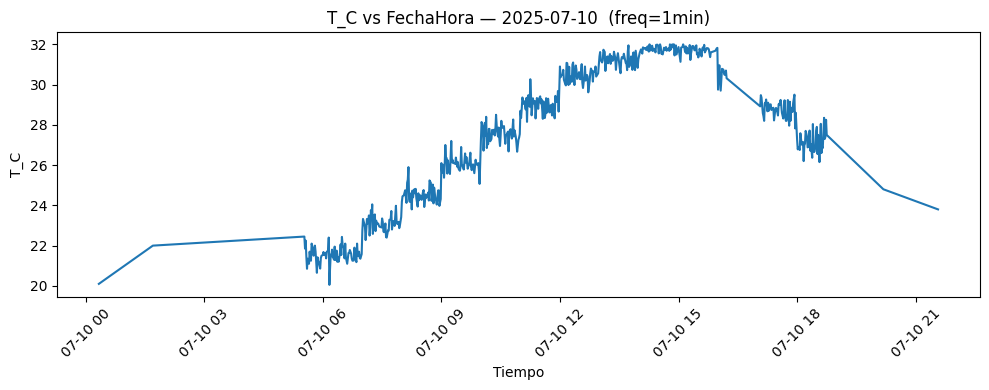

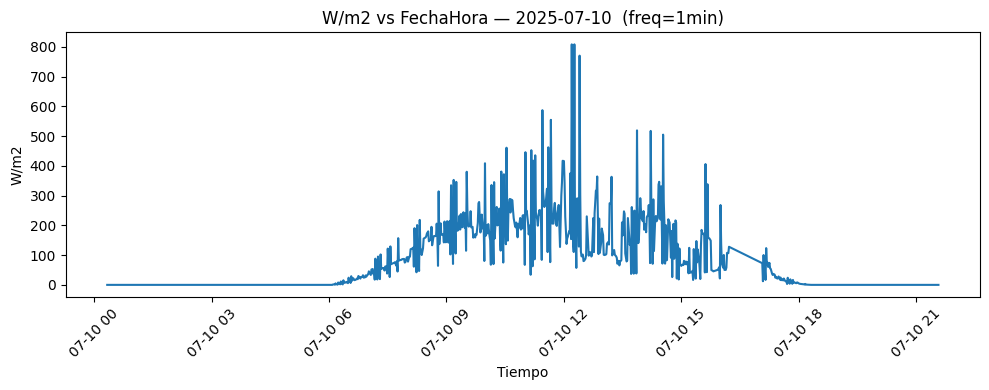

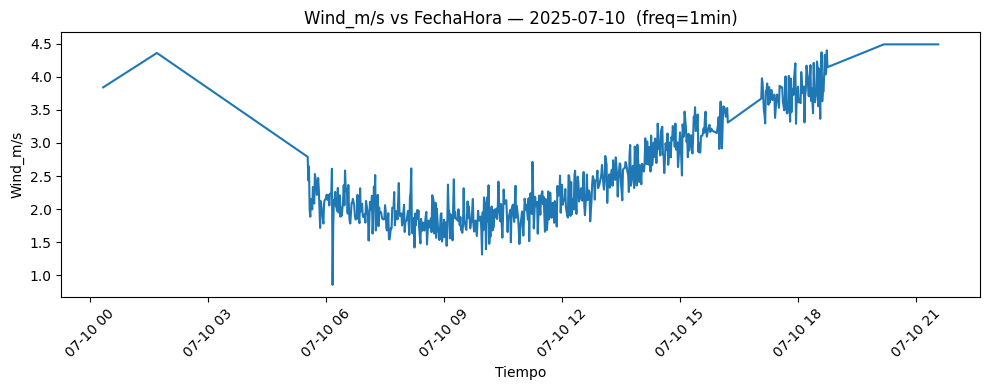

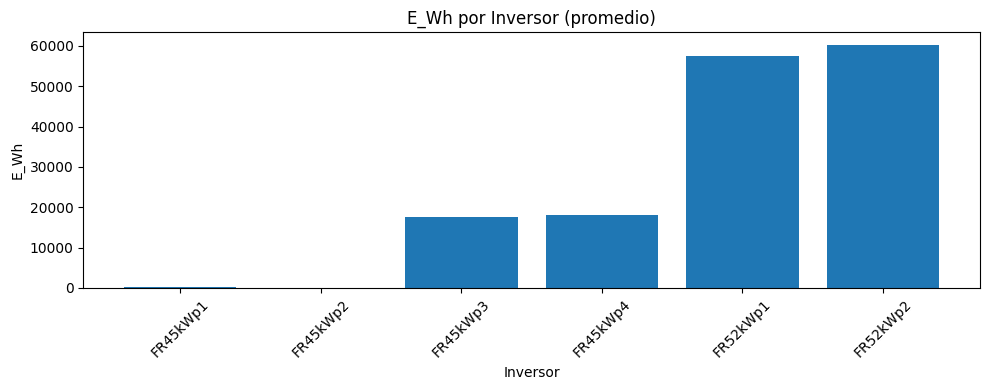

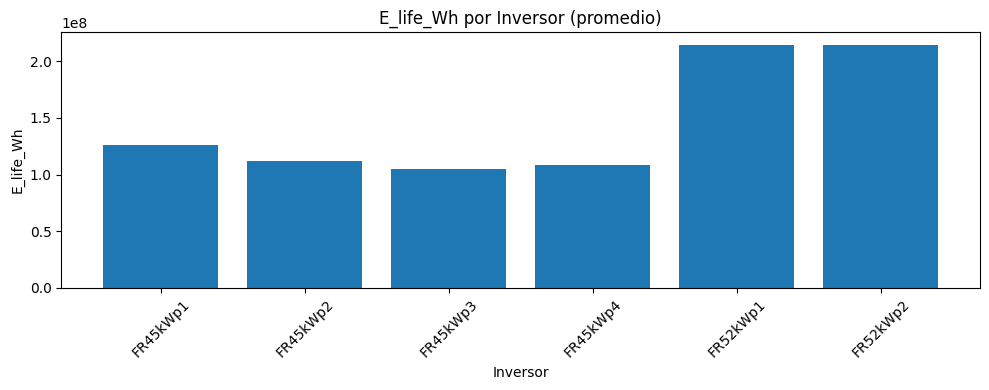

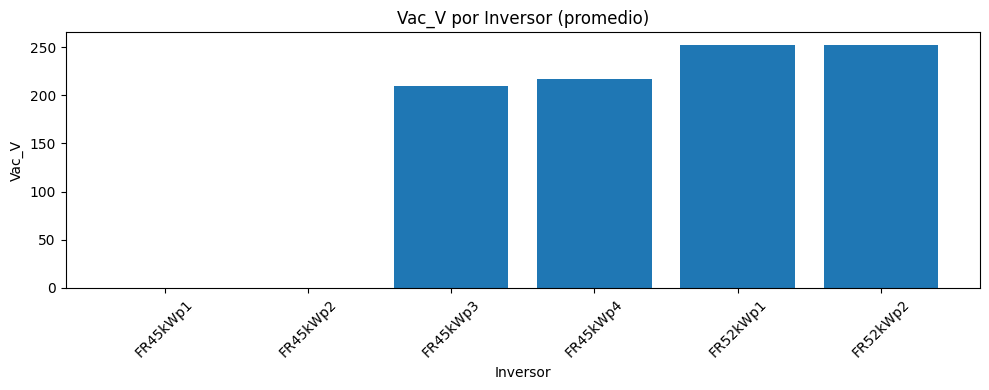

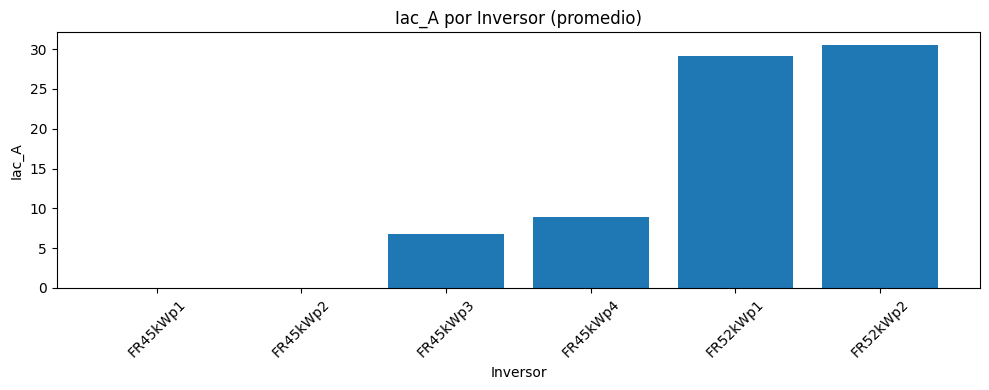

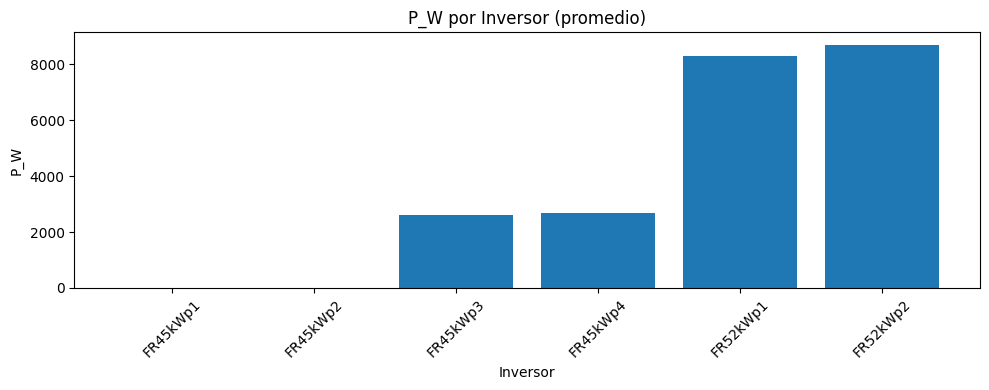

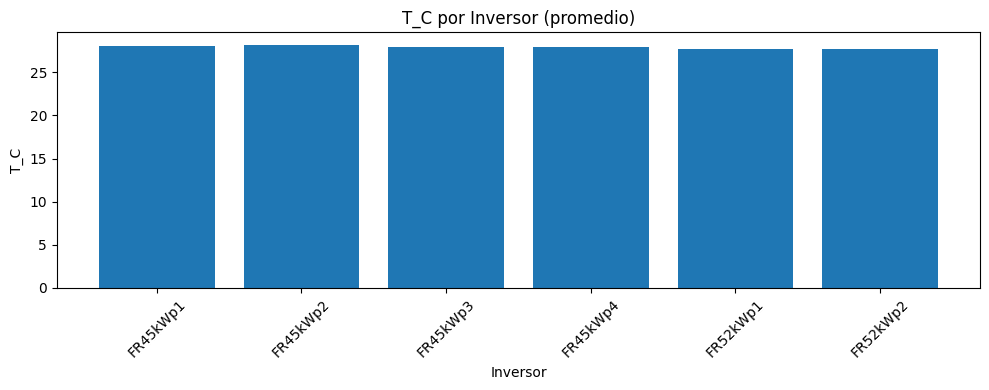

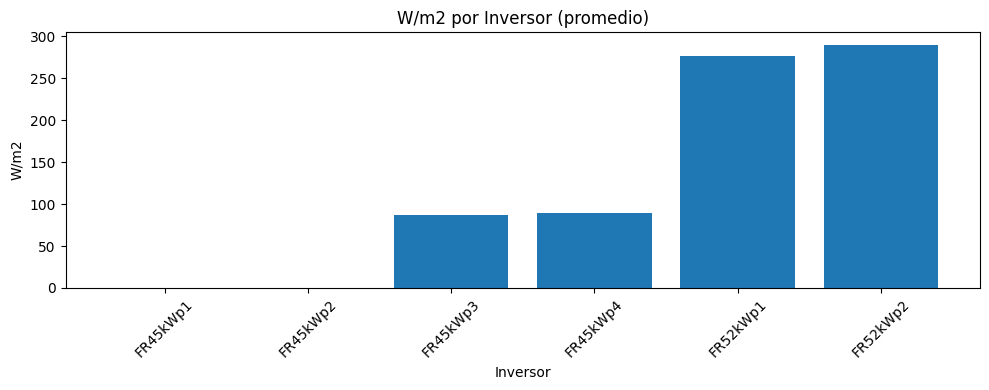

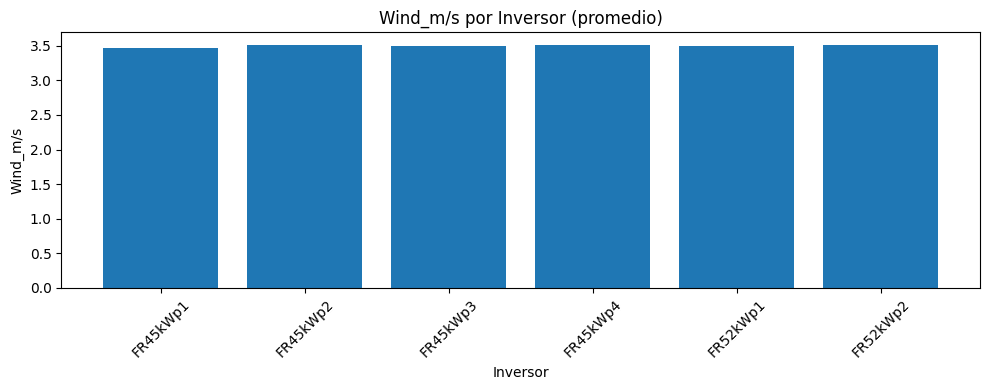

In [ ]:
#Borrarr borrar Suavizado
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1) Subir CSV
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# 2) Detectar separador y cargar
with open(file_name, 'r', encoding='utf-8', errors='ignore') as f:
    head = f.read(2048)
sep = ';' if head.count(';') > head.count(',') else ','
df = pd.read_csv(file_name, sep=sep)

# 3) Asegurar que 'FechaHora' sea datetime
if 'FechaHora' not in df.columns:
    raise ValueError("No se encontró la columna 'FechaHora' en el CSV.")
df['FechaHora'] = pd.to_datetime(df['FechaHora'], errors='coerce')
if df['FechaHora'].isna().all():
    raise ValueError("'FechaHora' no pudo convertirse a datetime. Revisa el formato de la columna.")

# 4) Exploración rápida
print("\n=== INFO ===")
df.info()

print("\n=== DESCRIPTIVE STATS ===")
print(df.describe(include='all'))

print("\n=== NÚMERO DE VALORES ÚNICOS ===")
print(df.nunique())

print("\n=== VALORES NULOS POR COLUMNA ===")
print(df.isnull().sum())

print("\n=== PRIMERAS FILAS ===")
print(df.head())

# 5) Columnas por tipo
time_col = 'FechaHora'
numeric_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != time_col]
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

# 6) Series de tiempo para un día ALEATORIO (rango completo del día)
# === Series de tiempo: ordenar, rellenar huecos y graficar un día ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 📌 Nombre de tu columna de tiempo:
time_col = 'FechaHora'

# Asegurar datetime
df[time_col] = pd.to_datetime(df[time_col], errors='coerce')
if df[time_col].isna().all():
    raise ValueError(f"'{time_col}' no es convertible a datetime.")

# Columnas numéricas a graficar
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if not numeric_cols:
    raise ValueError("No hay columnas numéricas para graficar.")

# Fechas disponibles
fechas_disp = df[time_col].dt.date.dropna().sort_values().unique()
if fechas_disp.size == 0:
    raise ValueError("No hay fechas válidas en la columna de tiempo.")

# 📌 Elegir un día aleatorio (fija semilla si quieres repetibilidad)
# np.random.seed(123)
fecha_plot = np.random.choice(fechas_disp)
# 📌 Si prefieres una fecha fija, comenta la línea de arriba y usa:
# fecha_plot = pd.to_datetime("2025-07-12").date()

print(f"🎯 Día seleccionado: {fecha_plot}")

# Filtrar rango completo del día [00:00:00, 24:00:00)
inicio = pd.Timestamp(fecha_plot)
fin = inicio + pd.Timedelta(days=1)
dft = df[(df[time_col] >= inicio) & (df[time_col] < fin)].copy()

# Ordenar por tiempo
dft = dft.sort_values(time_col)

# Indexar por tiempo
dft = dft.set_index(time_col)

# 📌 Frecuencia objetivo para re-muestrear (cámbiala a '5min', '30s', etc.)
freq = '1min'

# Re-muestrear a rejilla regular con la media del intervalo
rs = dft[numeric_cols].resample(freq).mean()

# Rellenar huecos:
# 1) Interpolación temporal para series “suaves”
rs = rs.interpolate(method='time', limit_direction='both')
# 2) Relleno hacia adelante/atrás para dejar lo menos posible en NaN
rs = rs.ffill().bfill()

# (Opcional) Si tienes contadores acumulados (tipo E_life_Wh), mejor ffill() sin interpolar:
# rs[['E_life_Wh']] = dft[['E_life_Wh']].resample(freq).ffill()

# Graficar una figura por variable numérica
for col in numeric_cols:
    serie = rs[col]
    if serie.notna().sum() == 0:
        continue
    plt.figure(figsize=(10,4))
    plt.plot(serie.index, serie.values)  # serie ya ordenada y continua
    plt.title(f"{col} vs {time_col} — {fecha_plot}  (freq={freq})")
    plt.xlabel("Tiempo"); plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 7) Barras por categorías (promedio por categoría, usando TODO el dataset)
max_levels = 20
for ccat in cat_cols:
    nunq = df[ccat].nunique(dropna=True)
    if nunq == 0 or nunq > max_levels:
        continue
    for cn in numeric_cols:
        if df[cn].notna().sum() == 0:
            continue
        agg = df.groupby(ccat, dropna=False)[cn].mean().reset_index()
        plt.figure(figsize=(10,4))
        plt.bar(agg[ccat].astype(str), agg[cn])
        plt.title(f"{cn} por {ccat} (promedio)")
        plt.xlabel(ccat); plt.ylabel(cn)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord (10).csv


/tmp/ipython-input-316764895.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(potencias_por_dia, labels=[str(f) for f in sorted(df['Fecha'].unique())],


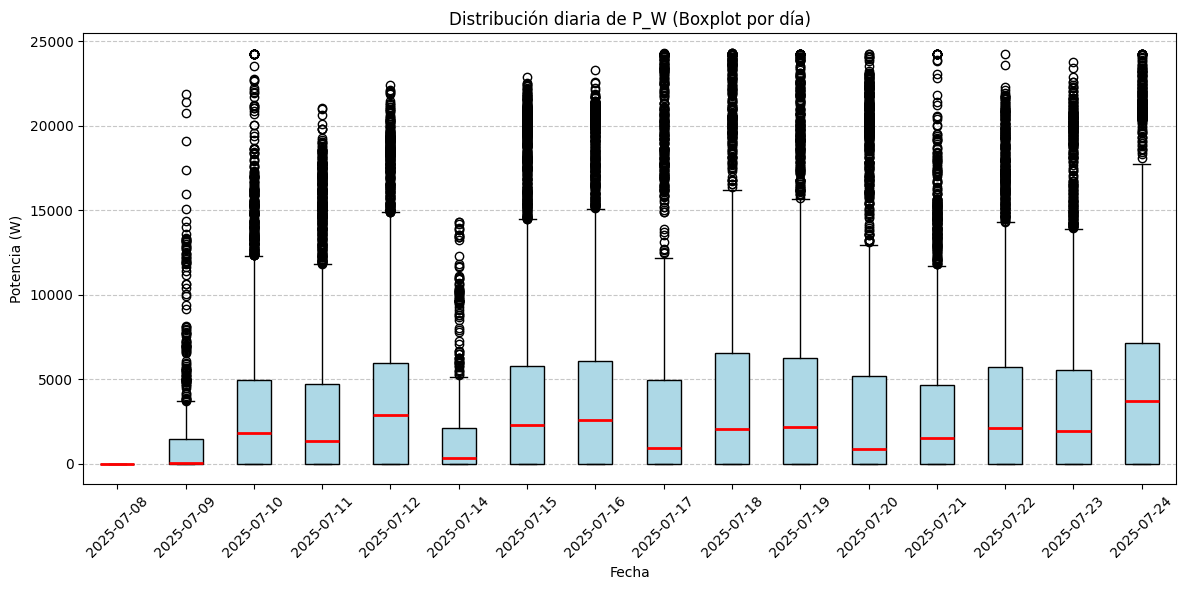

In [ ]:
#Gráficas por día P boxplots
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# =======================
# 1) Subir CSV desde el PC
# =======================
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

# =======================
# 2) Leer y preparar datos
# =======================
df = pd.read_csv(file_path)

# Asegurar datetime
df['FechaHora'] = pd.to_datetime(df['FechaHora'], errors='coerce')
df = df.dropna(subset=['FechaHora'])

# Columna solo fecha
df['Fecha'] = df['FechaHora'].dt.date

# =======================
# 3) Boxplot por día
# =======================
# Creamos una lista con las potencias de cada día
potencias_por_dia = [df.loc[df['Fecha'] == fecha, 'P_W'].dropna().values
                     for fecha in sorted(df['Fecha'].unique())]

# Creamos el gráfico
plt.figure(figsize=(12,6))
plt.boxplot(potencias_por_dia, labels=[str(f) for f in sorted(df['Fecha'].unique())],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue'),
            medianprops=dict(color='red', linewidth=2))

plt.title('Distribución diaria de P_W (Boxplot por día)')
plt.xlabel('Fecha')
plt.ylabel('Potencia (W)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord (7).csv


/tmp/ipython-input-4222527804.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


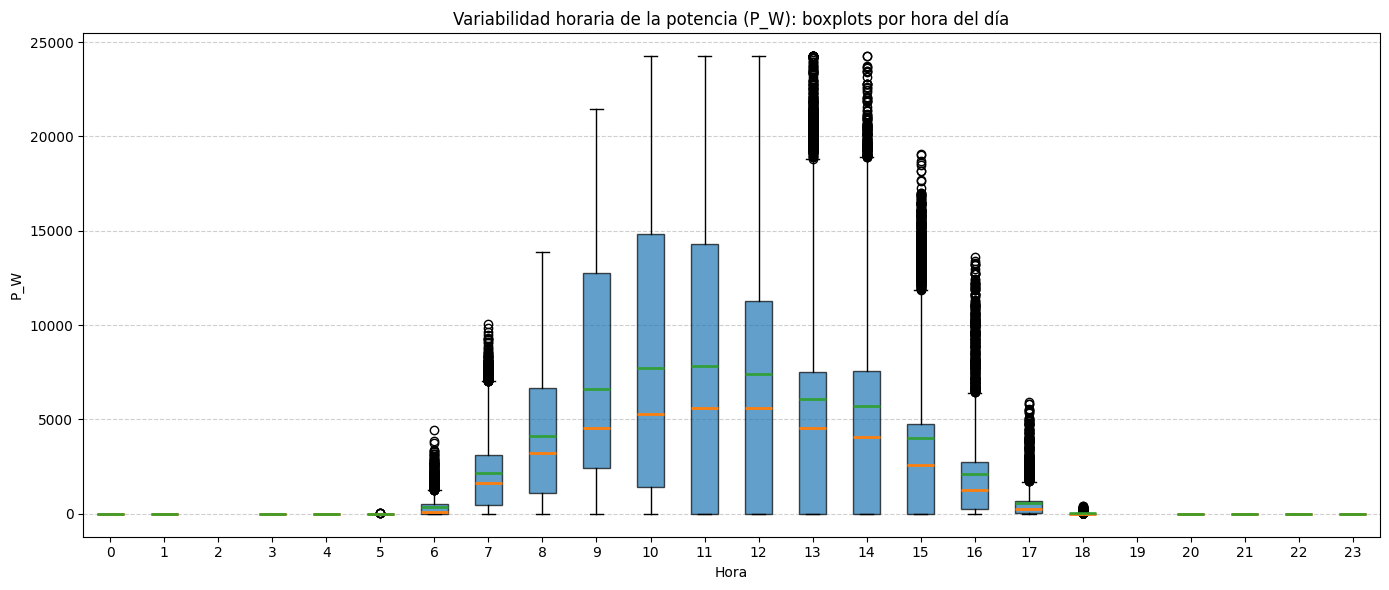

    Hora  count         mean  median  min      max          std
0      0      5     0.000000     0.0  0.0      0.0     0.000000
1      1      1     0.000000     0.0  0.0      0.0          NaN
2      3      1     0.000000     0.0  0.0      0.0          NaN
3      4      5     0.000000     0.0  0.0      0.0     0.000000
4      5    902     0.245011     0.0  0.0     56.0     3.413243
5      6   3182   360.164362    98.0  0.0   4424.0   570.378391
6      7   2728  2176.967742  1643.0  0.0  10062.0  2166.764449
7      8   2616  4148.612385  3207.5  0.0  13879.0  3789.395006
8      9   2777  6616.866042  4542.0  0.0  21457.0  5813.296463
9     10   3034  7749.185234  5298.5  0.0  24257.0  7154.461755
10    11   3116  7850.754814  5607.0  0.0  24270.0  7824.689265
11    12   3133  7407.619215  5604.0  0.0  24273.0  7769.818184
12    13   3213  6059.907563  4572.0  0.0  24263.0  6856.352016
13    14   3081  5700.114249  4085.0  0.0  24256.0  6330.013731
14    15   3089  4019.742311  2569.0  0.

In [ ]:
# construir un boxplot por cada hora del día usando todas las mediciones de P_W registradas
# en esa hora a lo largo de los días. Así se ve la variabilidad horaria (distribución intradía agregada por hora).
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# ============ 1) Subir CSV ============
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

# ============ 2) Leer y preparar ============
df = pd.read_csv(file_path)
df['FechaHora'] = pd.to_datetime(df['FechaHora'], errors='coerce')
df = df.dropna(subset=['FechaHora'])

# Asegúrate de tener la columna de potencia
if 'P_W' not in df.columns:
    raise ValueError("No se encontró la columna 'P_W' en el CSV.")

# Hora del día (0..23)
df['Hora'] = df['FechaHora'].dt.hour

# (Opcional) filtrar rango de fechas si quieres un período concreto
# df = df[(df['FechaHora'] >= '2025-07-01') & (df['FechaHora'] < '2025-08-01')]

# ============ 3) Datos para boxplot (P_W por hora, agregando todos los días) ============
datos_por_hora = [df.loc[df['Hora'] == h, 'P_W'].dropna().values for h in range(24)]

# ============ 4) Boxplot tipo “variabilidad por hora” ============
plt.figure(figsize=(14,6))
bp = plt.boxplot(
    datos_por_hora,
    labels=[str(h) for h in range(24)],
    showmeans=True, meanline=True,  # dibuja la media como línea
    patch_artist=True
)

# Estilo simple (puedes omitir si no quieres colorear)
for box in bp['boxes']:
    box.set(alpha=0.7)
for med in bp['medians']:
    med.set(linewidth=2)            # mediana (línea dentro de cada caja)
for mean in bp['means']:
    mean.set(linewidth=2, linestyle='-', alpha=0.9)  # media (línea diferente)

plt.title('Variabilidad horaria de la potencia (P_W): boxplots por hora del día')
plt.xlabel('Hora')
plt.ylabel('P_W')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ============ 5) (Opcional) Tabla de estadísticas por hora ============
stats_hora = df.groupby('Hora')['P_W'].agg(['count','mean','median','min','max','std']).reset_index()
print(stats_hora)

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord (8).csv


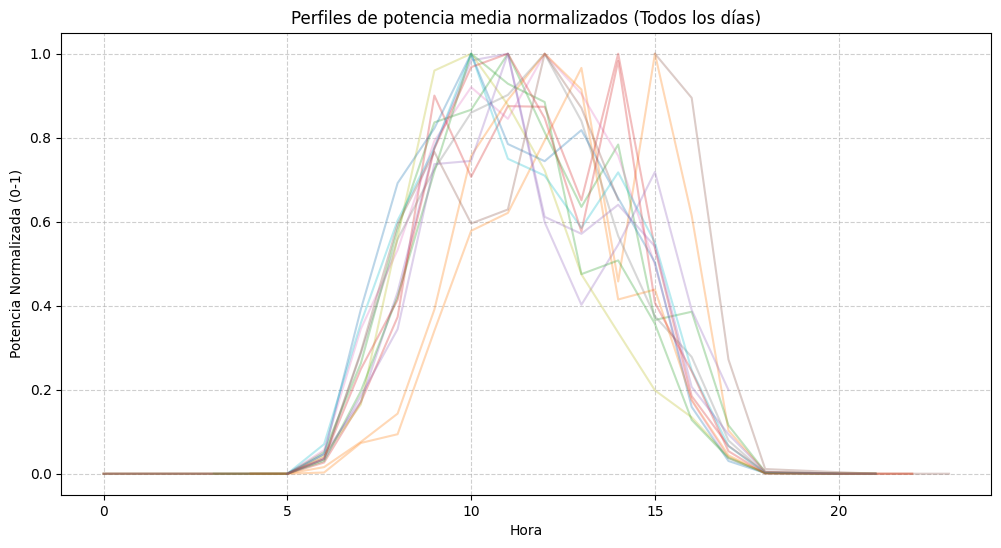

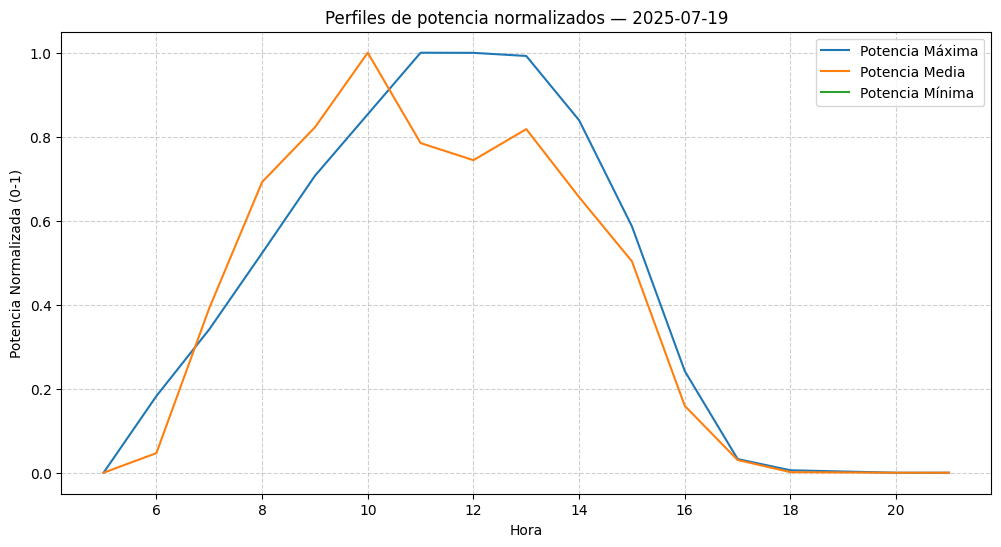

In [ ]:
#Normaliza y grafica P para todo los días y 19 de julio
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# ========= 1) Subir CSV =========
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

# ========= 2) Leer y preparar =========
df = pd.read_csv(file_path)
df['FechaHora'] = pd.to_datetime(df['FechaHora'], errors='coerce')
df = df.dropna(subset=['FechaHora'])

# Hora y fecha
df['Fecha'] = df['FechaHora'].dt.date
df['Hora'] = df['FechaHora'].dt.hour

# ========= 3) Calcular potencia máxima, media y mínima por hora de cada día =========
perfil_diario = df.groupby(['Fecha', 'Hora'])['P_W'].agg(['max', 'mean', 'min']).reset_index()

# ========= 4) Normalizar min-max por cada día =========
def normalizar_dia(grupo):
    # Normaliza cada columna entre 0 y 1
    return (grupo - grupo.min()) / (grupo.max() - grupo.min())

# Aplicar normalización por día
normalizados = perfil_diario.groupby('Fecha')[['max', 'mean', 'min']].transform(normalizar_dia)
perfil_normalizado = perfil_diario[['Fecha', 'Hora']].join(normalizados)

# ========= 5) Graficar todos los días superpuestos =========
plt.figure(figsize=(12,6))
for fecha, grupo in perfil_normalizado.groupby('Fecha'):
    plt.plot(grupo['Hora'], grupo['mean'], alpha=0.3)  # perfil medio normalizado
plt.title('Perfiles de potencia media normalizados (Todos los días)')
plt.xlabel('Hora')
plt.ylabel('Potencia Normalizada (0-1)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ========= 6) Graficar perfiles normalizados de un día específico =========
fecha_especifica = pd.to_datetime("2025-07-19").date()
grupo_dia = perfil_normalizado[perfil_normalizado['Fecha'] == fecha_especifica]

plt.figure(figsize=(12,6))
plt.plot(grupo_dia['Hora'], grupo_dia['max'], label='Potencia Máxima')
plt.plot(grupo_dia['Hora'], grupo_dia['mean'], label='Potencia Media')
plt.plot(grupo_dia['Hora'], grupo_dia['min'], label='Potencia Mínima')
plt.title(f'Perfiles de potencia normalizados — {fecha_especifica}')
plt.xlabel('Hora')
plt.ylabel('Potencia Normalizada (0-1)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord (9).csv
        Fecha     P_W_mean  P_W_min  P_W_max  E_Wh_max
0  2025-07-08     0.000000      0.0      0.0  121660.0
1  2025-07-09  1493.070788      0.0  21873.0   99520.0
2  2025-07-10  3777.921257      0.0  24256.0  100340.0
3  2025-07-11  3731.299730      0.0  21015.0  100940.0
4  2025-07-12  4885.747361      0.0  22426.0  117240.0


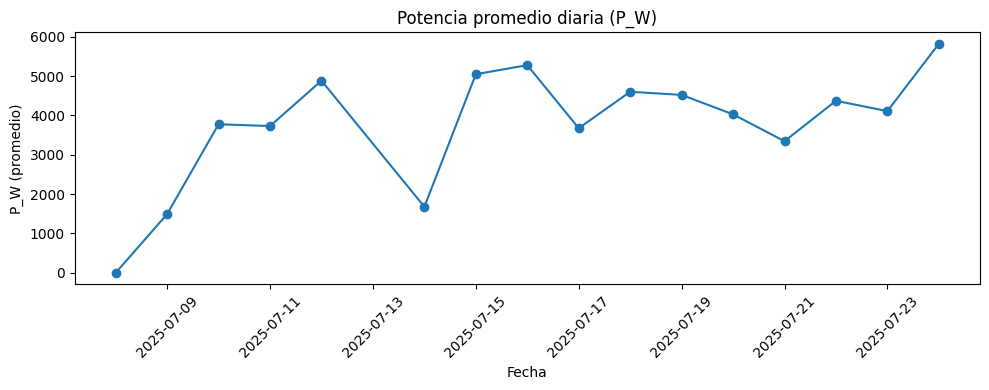

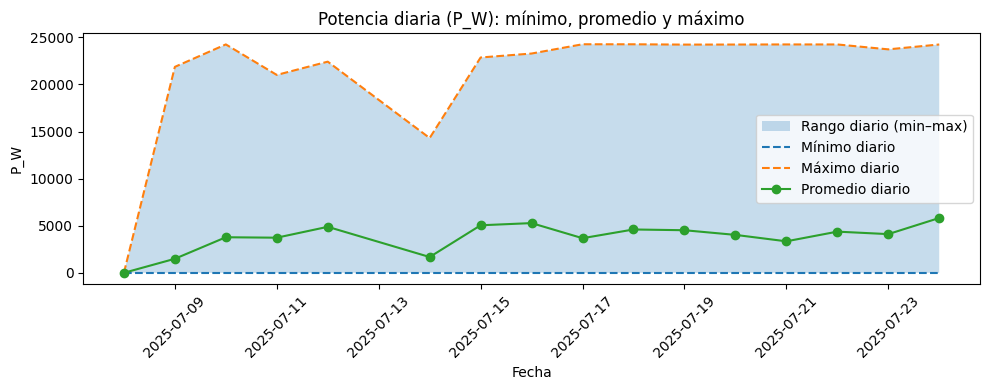

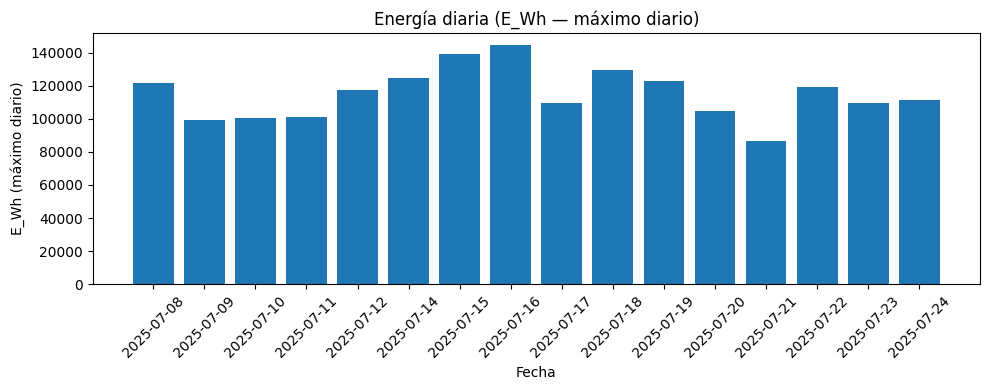

💾 Resultados guardados como: perfiles_diarios_PyE_con_min_max_Emax.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Gráficas por día: P_W (pmax, pmed, pmin) y E_Wh (máximo diario) OK
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# =======================
# 1) Subir CSV desde el PC
# =======================
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

# =======================
# 2) Leer y preparar datos
# =======================
df = pd.read_csv(file_path)

# Asegurar datetime
df['FechaHora'] = pd.to_datetime(df['FechaHora'], errors='coerce')
df = df.dropna(subset=['FechaHora'])

# Columna solo fecha
df['Fecha'] = df['FechaHora'].dt.date

# =======================
# 3) Cálculo de métricas diarias
#    (E_Wh ahora es MÁXIMO diario)
# =======================
resultados = df.groupby('Fecha').agg(
    P_W_mean=('P_W', 'mean'),
    P_W_min =('P_W', 'min'),
    P_W_max =('P_W', 'max'),
    E_Wh_max=('E_Wh','max')     # ⬅️ cambio clave: máximo diario
).reset_index()

# Ordenar por fecha
resultados = resultados.sort_values('Fecha')

# Vista rápida en consola
print(resultados.head())

# =======================
# 4) Gráficos
# =======================

# --- (a) Potencia promedio diaria ---
plt.figure(figsize=(10,4))
plt.plot(resultados['Fecha'], resultados['P_W_mean'], marker='o')
plt.title('Potencia promedio diaria (P_W)')
plt.xlabel('Fecha'); plt.ylabel('P_W (promedio)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- (b) Potencia diaria: banda min–max + media ---
fig, ax = plt.subplots(figsize=(10,4))
fechas = resultados['Fecha']
ax.fill_between(fechas, resultados['P_W_min'], resultados['P_W_max'], alpha=0.25, label='Rango diario (min–max)')
ax.plot(fechas, resultados['P_W_min'], linestyle='--', label='Mínimo diario')
ax.plot(fechas, resultados['P_W_max'], linestyle='--', label='Máximo diario')
ax.plot(fechas, resultados['P_W_mean'], marker='o', label='Promedio diario')
ax.set_title('Potencia diaria (P_W): mínimo, promedio y máximo')
ax.set_xlabel('Fecha'); ax.set_ylabel('P_W')
plt.xticks(rotation=45)
ax.legend()
plt.tight_layout()
plt.show()

# --- (c) Energía diaria (MÁXIMO por día) ---
plt.figure(figsize=(10,4))
plt.bar(resultados['Fecha'].astype(str), resultados['E_Wh_max'])
plt.title('Energía diaria (E_Wh — máximo diario)')
plt.xlabel('Fecha'); plt.ylabel('E_Wh (máximo diario)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# =======================
# 5) Guardar resultados a CSV
# =======================
out_name = 'perfiles_diarios_PyE_con_min_max_Emax.csv'
resultados.to_csv(out_name, index=False)
print(f"💾 Resultados guardados como: {out_name}")
files.download(out_name)

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord (2).csv
=== Varianza explicada por componente ===
PC1: 38.21%
PC2: 25.28%
PC3: 14.37%
PC4: 7.53%
PC5: 5.66%
PC6: 3.99%
PC7: 2.66%
PC8: 1.00%
PC9: 0.75%
PC10: 0.35%
PC11: 0.16%
PC12: 0.03%
PC13: 0.02%
Var. acumulada (PC1+PC2): 63.49%
Var. acumulada (PC1..PC3): 77.86%


/tmp/ipython-input-1693031971.py:50: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  perfil = perfil.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)


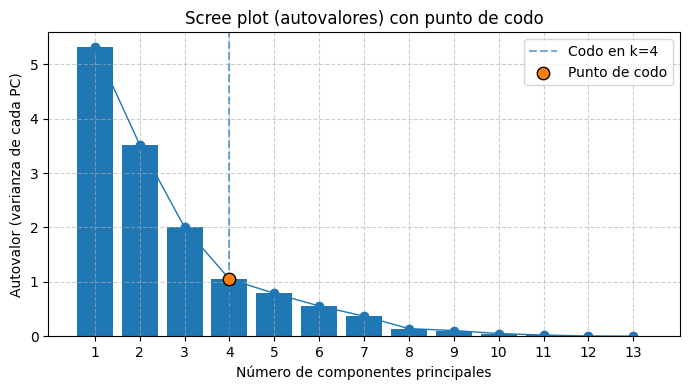

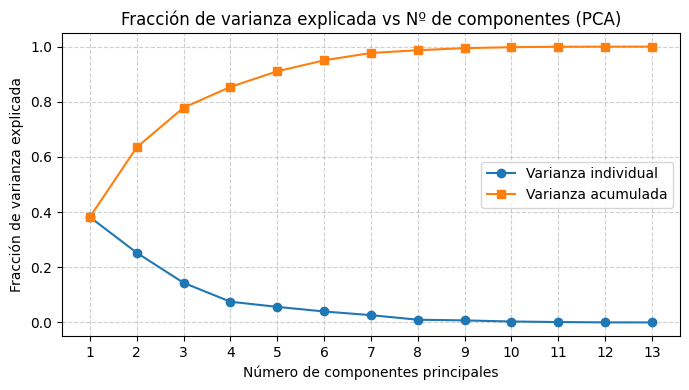

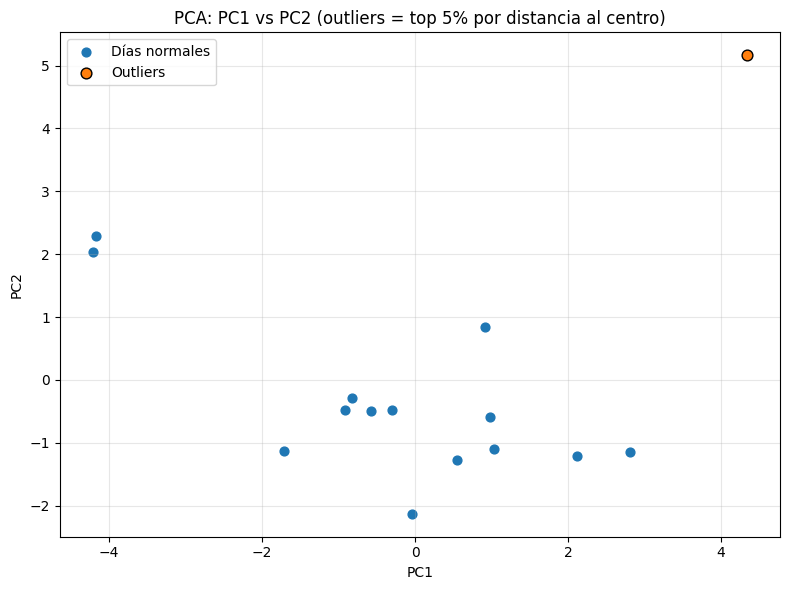


🔎 Días potencialmente anómalos (top 10):
     Fecha      PC1      PC2  DistanciaCentro  EsOutlier
2025-07-24 4.343104 5.164619         6.748025       True


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

💾 Exportados: pca_perfiles_sfv_scores.csv y pca_perfiles_sfv_outliers.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

💾 RMSE por día exportado: rmse_reconstruccion.csv

🔎 Top 5 días con mayor RMSE (PC1+PC2):
     Fecha    RMSE_PC1  RMSE_PC1_PC2
2025-07-20 1729.547348   1715.307809
2025-07-12 1365.675520   1381.028897
2025-07-17 1555.514924   1190.678034
2025-07-14 1268.630632    950.312421
2025-07-11  937.698769    940.818560
Hora            Pmax_dia
Fecha                   
2025-07-09   5151.000000
2025-07-10   7179.027027
2025-07-11   7451.744939
2025-07-12   9331.752174
2025-07-14   2983.510204
2025-07-15   9598.029661
2025-07-16  10760.004566
2025-07-17   9538.487923
2025-07-18   9175.352697
2025-07-19   8779.458874
2025-07-20   9785.446809
2025-07-21   7496.018692
2025-07-22   8635.786957
2025-07-23   9081.339207
2025-07-24  10035.052356


In [ ]:
# ============================
# PCA de perfiles diarios SFV + detección de outliers,
# PCA - (con K-means comentado)
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans  # ← opcional (comentado)

# ---------- 1) Subir CSV ----------
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

# ---------- 2) Leer y preparar ----------
# Detección simple de separador
with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
    head = f.read(2048)
sep = ';' if head.count(';') > head.count(',') else ','
df = pd.read_csv(file_path, sep=sep)

# Validaciones
if 'FechaHora' not in df.columns:
    raise ValueError("No se encontró la columna 'FechaHora'.")
if 'P_W' not in df.columns:
    raise ValueError("No se encontró la columna 'P_W' (potencia).")

# Tipos y columnas auxiliares
df['FechaHora'] = pd.to_datetime(df['FechaHora'], errors='coerce')
df = df.dropna(subset=['FechaHora'])
df['Fecha'] = df['FechaHora'].dt.date
df['Hora']  = df['FechaHora'].dt.hour

# ---------- 3) Perfiles horarios por día ----------
HORA_MIN, HORA_MAX = 6, 18   # incluye HORA_MAX
mask_horas = (df['Hora'] >= HORA_MIN) & (df['Hora'] <= HORA_MAX)

perfil = (df.loc[mask_horas]
            .groupby(['Fecha','Hora'])['P_W'].mean()
            .unstack('Hora'))

# Manejo de faltantes
perfil = perfil.sort_index(axis=1)
perfil = perfil.interpolate(axis=1, limit_direction='both')
perfil = perfil.dropna(thresh=int(0.8*perfil.shape[1]))
perfil = perfil.fillna(method='ffill', axis=1).fillna(method='bfill', axis=1)

# ---------- 4) Estandarización y PCA ----------
X = perfil.values  # (n_dias x n_horas)
scaler = StandardScaler()
Xz = scaler.fit_transform(X)

pca = PCA(n_components=None, random_state=42)
Z = pca.fit_transform(Xz)

expl = pca.explained_variance_ratio_
expl_acum = expl.cumsum()
eigvals = pca.explained_variance_

print("=== Varianza explicada por componente ===")
for i, v in enumerate(expl, start=1):
    print(f"PC{i}: {v:.2%}")
if len(expl) >= 2:
    print(f"Var. acumulada (PC1+PC2): {expl_acum[1]:.2%}")
if len(expl) >= 3:
    print(f"Var. acumulada (PC1..PC3): {expl_acum[2]:.2%}")

# ---------- 5A) Scree plot clásico (autovalores) + punto de codo ----------
def elbow_index(y):
    x = np.arange(1, len(y)+1).astype(float)
    p0 = np.array([x[0], y[0]])
    pN = np.array([x[-1], y[-1]])
    v = pN - p0
    v_norm = np.linalg.norm(v)
    pts = np.column_stack([x, y])
    cross = np.abs(v[0] * (pts[:, 1] - p0[1]) - v[1] * (pts[:, 0] - p0[0]))
    dist = cross / (v_norm if v_norm != 0 else 1.0)
    idx = int(np.argmax(dist))
    return idx, x[idx], y[idx], dist

idx_elbow, x_elbow, y_elbow, _ = elbow_index(eigvals)

plt.figure(figsize=(7,4))
plt.bar(range(1, len(eigvals)+1), eigvals)
plt.plot(range(1, len(eigvals)+1), eigvals, 'o-', linewidth=1)
plt.axvline(idx_elbow+1, linestyle='--', alpha=0.6, label=f"Codo en k={idx_elbow+1}")
plt.scatter([x_elbow], [y_elbow], s=80, edgecolor='k', zorder=5, label="Punto de codo")
plt.title('Scree plot (autovalores) con punto de codo')
plt.xlabel('Número de componentes principales')
plt.ylabel('Autovalor (varianza de cada PC)')
plt.xticks(range(1, len(eigvals)+1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 5B) Fracción de varianza explicada ----------
nums = range(1, len(expl)+1)
plt.figure(figsize=(7,4))
plt.plot(nums, expl, 'o-', label='Varianza individual')
plt.plot(nums, expl_acum, 's-', label='Varianza acumulada')
plt.title('Fracción de varianza explicada vs Nº de componentes (PCA)')
plt.xlabel('Número de componentes principales')
plt.ylabel('Fracción de varianza explicada')
plt.xticks(nums)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 6) Proyección PC1–PC2 + OUTLIERS ----------
pc12 = Z[:, :2]
centro = pc12.mean(axis=0)
dist = np.linalg.norm(pc12 - centro, axis=1)
umbral = np.percentile(dist, 95)
out_mask = dist >= umbral

plt.figure(figsize=(8,6))
plt.scatter(pc12[~out_mask, 0], pc12[~out_mask, 1], s=40, label='Días normales')
plt.scatter(pc12[out_mask, 0], pc12[out_mask, 1], s=60, edgecolor='k', label='Outliers')
plt.title('PCA: PC1 vs PC2 (outliers = top 5% por distancia al centro)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Listado de outliers (top 10)
outliers_df = pd.DataFrame({
    'Fecha': perfil.index.astype(str),
    'PC1': pc12[:,0],
    'PC2': pc12[:,1],
    'DistanciaCentro': dist,
    'EsOutlier': out_mask
}).sort_values('DistanciaCentro', ascending=False)

print("\n🔎 Días potencialmente anómalos (top 10):")
print(outliers_df[outliers_df['EsOutlier']].head(10).to_string(index=False))

# ---------- 7) Exportar resultados ----------
pcs_df = pd.DataFrame(Z, index=perfil.index, columns=[f"PC{i}" for i in range(1, Z.shape[1]+1)])
pcs_df.to_csv("pca_perfiles_sfv_scores.csv", index_label='Fecha')

outliers_df.to_csv("pca_perfiles_sfv_outliers.csv", index=False)

files.download("pca_perfiles_sfv_scores.csv")
files.download("pca_perfiles_sfv_outliers.csv")
print("💾 Exportados: pca_perfiles_sfv_scores.csv y pca_perfiles_sfv_outliers.csv")

# ---------- (OPCIONAL, COMENTADO) K-means sobre PC1–PC2 ----------
# N_CLUSTERS = 3
# kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
# labels = kmeans.fit_predict(pc12)
# plt.figure(figsize=(8,6))
# for k in range(N_CLUSTERS):
#     idx = labels == k
#     plt.scatter(pc12[idx,0], pc12[idx,1], s=40, label=f"Cluster {k}")
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
#             s=200, marker='X', edgecolor='k', label='Centros')
# plt.title("K-means en PC1–PC2 (OPCIONAL)")
# plt.xlabel("PC1"); plt.ylabel("PC2")
# plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# ---------- 8) RMSE de reconstrucción (PC1 y PC1+PC2) ----------
import numpy as np

# (Opcional) fija una fecha objetivo; si no está, usa la más cercana
FECHA_OBJ = None  # por ejemplo: pd.to_datetime("2025-07-24").date()

# Función de reconstrucción con k componentes
def _reconstruccion_fila_k(i, k):
    z_i_k = Z[i, :k]                                 # scores del día i (k PCs)
    xz_i_hat = z_i_k @ pca.components_[:k, :]        # volver al espacio estandarizado
    x_i_hat = scaler.inverse_transform(xz_i_hat.reshape(1, -1)).ravel()
    return x_i_hat

# --- RMSE para una fecha (si se define FECHA_OBJ) ---
if FECHA_OBJ is not None:
    if isinstance(FECHA_OBJ, str):
        FECHA_OBJ = pd.to_datetime(FECHA_OBJ).date()
    if FECHA_OBJ not in perfil.index:
        # usa la fecha válida más cercana
        fechas_disp = pd.to_datetime(pd.Series(perfil.index))
        i_cerc = (fechas_disp - pd.Timestamp(FECHA_OBJ)).abs().argmin()
        FECHA_OBJ = perfil.index[i_cerc]
        print(f"⚠️ Fecha no encontrada; usando la más cercana: {FECHA_OBJ}")

    idx = perfil.index.get_loc(FECHA_OBJ)
    x_real = perfil.loc[FECHA_OBJ].values
    x_hat_pc1  = _reconstruccion_fila_k(idx, 1)
    x_hat_pc12 = _reconstruccion_fila_k(idx, 2)

    rmse_pc1  = float(np.sqrt(np.mean((x_real - x_hat_pc1 )**2)))
    rmse_pc12 = float(np.sqrt(np.mean((x_real - x_hat_pc12)**2)))

    print(f"\n📅 RMSE {FECHA_OBJ}:  PC1={rmse_pc1:,.2f}  |  PC1+PC2={rmse_pc12:,.2f} (unidades de P_W)")

# --- RMSE para todos los días (se guarda a CSV) ---
rmse_rows = []
for i, fecha in enumerate(perfil.index):
    x_real = perfil.iloc[i].values
    x_hat_pc1  = _reconstruccion_fila_k(i, 1)
    x_hat_pc12 = _reconstruccion_fila_k(i, 2)
    rmse_pc1   = float(np.sqrt(np.mean((x_real - x_hat_pc1 )**2)))
    rmse_pc12  = float(np.sqrt(np.mean((x_real - x_hat_pc12)**2)))
    rmse_rows.append({"Fecha": str(fecha), "RMSE_PC1": rmse_pc1, "RMSE_PC1_PC2": rmse_pc12})

rmse_df = pd.DataFrame(rmse_rows)
rmse_df.to_csv("rmse_reconstruccion.csv", index=False)
files.download("rmse_reconstruccion.csv")
print("💾 RMSE por día exportado: rmse_reconstruccion.csv")

# (Opcional) muestra las 5 fechas con peor RMSE (PC1+PC2)
print("\n🔎 Top 5 días con mayor RMSE (PC1+PC2):")
print(rmse_df.sort_values("RMSE_PC1_PC2", ascending=False).head(5).to_string(index=False))
perfil_con_max = perfil.copy()
perfil_con_max['Pmax_dia'] = perfil_con_max.max(axis=1)

# Ver todas las filas con la columna Pmax_dia
print(perfil_con_max[['Pmax_dia']].to_string())

RMSE reconstrucción con PC1:     2,417.45
RMSE reconstrucción con PC1+PC2: 393.07


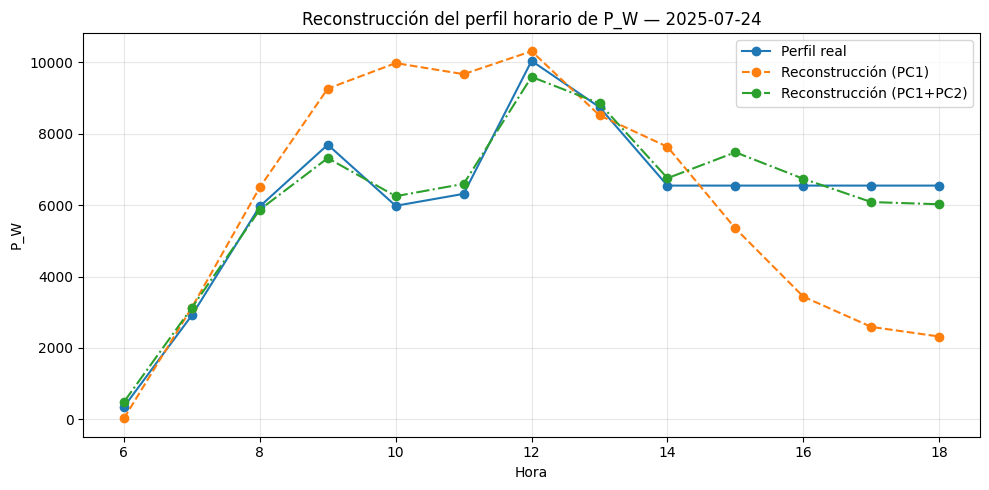

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Parámetro: día a reconstruir ===
FECHA_OBJ = pd.to_datetime("2025-07-24").date()  # cámbialo si quieres otro día

# --- Validaciones rápidas ---
assert 'perfil' in globals(), "No encuentro 'perfil' (filas=días, columnas=horas). Ejecuta antes la parte que lo crea."
assert 'pca' in globals() and 'scaler' in globals() and 'Z' in globals(), "Faltan 'pca', 'scaler' o 'Z'. Corre antes el bloque de PCA."
if FECHA_OBJ not in perfil.index:
    raise ValueError(f"La fecha {FECHA_OBJ} no está en 'perfil'. Fechas disponibles: {list(perfil.index)[:5]}...")

# --- Localizar fila del día ---
i = perfil.index.get_loc(FECHA_OBJ)
horas = perfil.columns
x_real = perfil.loc[FECHA_OBJ].values  # perfil real (en la escala original de P_W)

def reconstruccion_por_k_components(i, k):
    """Reconstruye la fila i usando las primeras k componentes."""
    z_i_k = Z[i, :k]                                   # scores del día i en las k PCs
    xz_i_hat = z_i_k @ pca.components_[:k, :]          # volver al espacio estandarizado
    x_i_hat = scaler.inverse_transform(xz_i_hat.reshape(1, -1)).ravel()  # des-escalar
    return x_i_hat

# Reconstrucciones
x_hat_pc1   = reconstruccion_por_k_components(i, 1)
x_hat_pc12  = reconstruccion_por_k_components(i, 2)

# Métrica de error
rmse_pc1  = np.sqrt(np.mean((x_real - x_hat_pc1 )**2))
rmse_pc12 = np.sqrt(np.mean((x_real - x_hat_pc12)**2))

print(f"RMSE reconstrucción con PC1:     {rmse_pc1:,.2f}")
print(f"RMSE reconstrucción con PC1+PC2: {rmse_pc12:,.2f}")

# --- Gráfico comparación ---
plt.figure(figsize=(10,5))
plt.plot(horas, x_real, marker='o', label='Perfil real')
plt.plot(horas, x_hat_pc1, marker='o', linestyle='--', label='Reconstrucción (PC1)')
plt.plot(horas, x_hat_pc12, marker='o', linestyle='-.', label='Reconstrucción (PC1+PC2)')
plt.title(f"Reconstrucción del perfil horario de P_W — {FECHA_OBJ}")
plt.xlabel("Hora"); plt.ylabel("P_W")
plt.grid(alpha=0.3); plt.legend()
plt.tight_layout()
plt.show()

[2025-07-24] RMSE  PC1=2,417.45  |  PC1+PC2=393.07


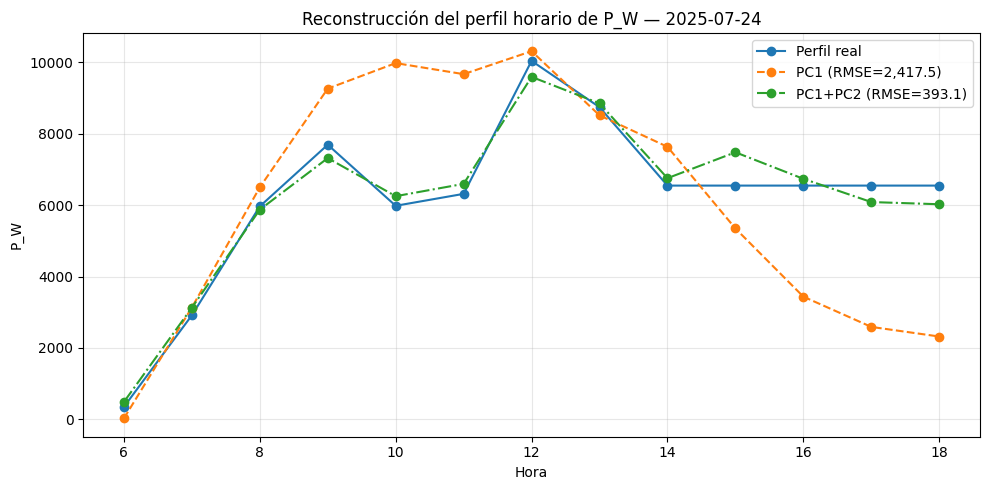

[2025-07-17] RMSE  PC1=1,555.51  |  PC1+PC2=1,190.68


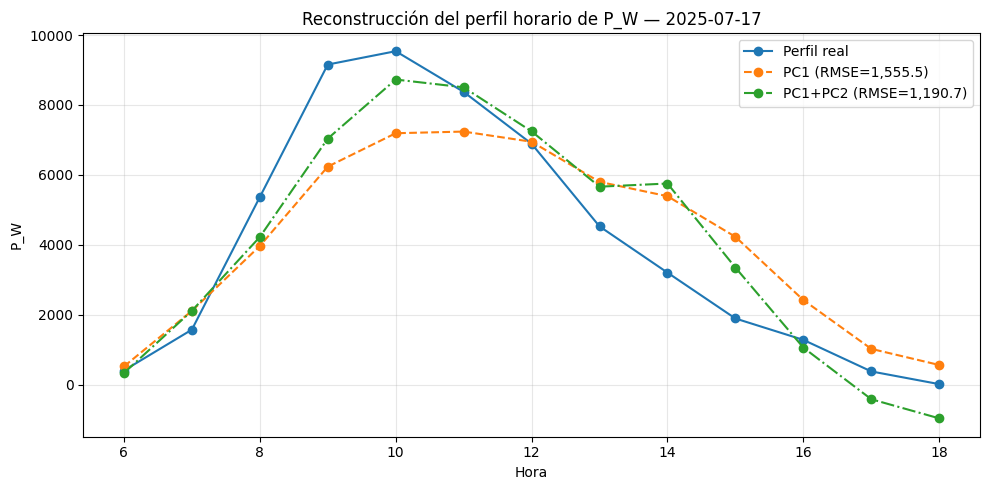

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Lista de días a reconstruir (puedes agregar más) ===
FECHAS = [
    "2025-07-24",
    "2025-07-17",
]

# --- Validaciones rápidas ---
assert 'perfil' in globals(), "No encuentro 'perfil' (filas=días, columnas=horas). Ejecuta antes la parte que lo crea."
assert 'pca' in globals() and 'scaler' in globals() and 'Z' in globals(), "Faltan 'pca', 'scaler' o 'Z'. Corre antes el bloque de PCA."

# Función de reconstrucción con k componentes
def reconstruccion_por_k_components(i, k):
    z_i_k = Z[i, :k]
    xz_i_hat = z_i_k @ pca.components_[:k, :]
    x_i_hat = scaler.inverse_transform(xz_i_hat.reshape(1, -1)).ravel()
    return x_i_hat

# Graficar cada fecha solicitada
for f in FECHAS:
    FECHA_OBJ = pd.to_datetime(f).date()
    if FECHA_OBJ not in perfil.index:
        print(f"⚠️ {FECHA_OBJ} no está en 'perfil'. Saltando.")
        continue

    i = perfil.index.get_loc(FECHA_OBJ)
    horas = perfil.columns
    x_real = perfil.loc[FECHA_OBJ].values

    # Reconstrucciones
    x_hat_pc1  = reconstruccion_por_k_components(i, 1)
    x_hat_pc12 = reconstruccion_por_k_components(i, 2)

    # RMSE
    rmse_pc1  = np.sqrt(np.mean((x_real - x_hat_pc1 )**2))
    rmse_pc12 = np.sqrt(np.mean((x_real - x_hat_pc12)**2))
    print(f"[{FECHA_OBJ}] RMSE  PC1={rmse_pc1:,.2f}  |  PC1+PC2={rmse_pc12:,.2f}")

    # Gráfico
    plt.figure(figsize=(10,5))
    plt.plot(horas, x_real, marker='o', label='Perfil real')
    plt.plot(horas, x_hat_pc1,  marker='o', linestyle='--', label=f'PC1 (RMSE={rmse_pc1:,.1f})')
    plt.plot(horas, x_hat_pc12, marker='o', linestyle='-.', label=f'PC1+PC2 (RMSE={rmse_pc12:,.1f})')
    plt.title(f"Reconstrucción del perfil horario de P_W — {FECHA_OBJ}")
    plt.xlabel("Hora"); plt.ylabel("P_W")
    plt.grid(alpha=0.3); plt.legend()
    plt.tight_layout()
    plt.show()

RMSE (PC1):     924.7 W
RMSE (PC1+PC2): 829.0 W
RMSE% (PC1):     10.5%  |  RMSE% (PC1+PC2): 9.4%


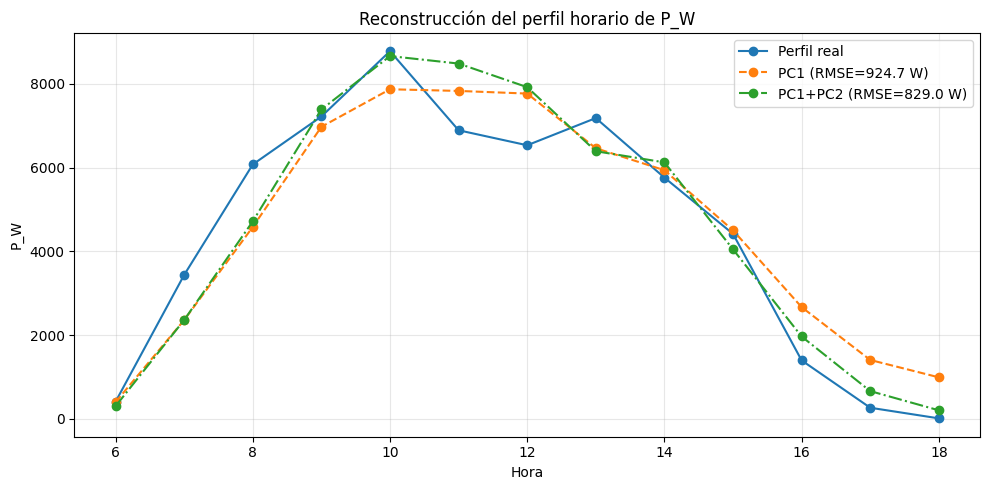

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Se asume que ya tienes:
# horas, x_real, x_hat_pc1, x_hat_pc12

# --- Calcular RMSE ---
rmse_pc1  = np.sqrt(np.mean((x_real - x_hat_pc1 )**2))
rmse_pc12 = np.sqrt(np.mean((x_real - x_hat_pc12)**2))

print(f"RMSE (PC1):     {rmse_pc1:,.1f} W")
print(f"RMSE (PC1+PC2): {rmse_pc12:,.1f} W")

# --- (Opcional) RMSE relativo al pico del día ---
pico = max(x_real.max(), 1e-9)
rmse_pc1_rel  = 100 * rmse_pc1  / pico
rmse_pc12_rel = 100 * rmse_pc12 / pico
print(f"RMSE% (PC1):     {rmse_pc1_rel:.1f}%  |  RMSE% (PC1+PC2): {rmse_pc12_rel:.1f}%")

# --- Graficar incluyendo RMSE en la leyenda ---
plt.figure(figsize=(10,5))
plt.plot(horas, x_real, marker='o', label='Perfil real')
plt.plot(horas, x_hat_pc1,  marker='o', linestyle='--', label=f'PC1 (RMSE={rmse_pc1:,.1f} W)')
plt.plot(horas, x_hat_pc12, marker='o', linestyle='-.', label=f'PC1+PC2 (RMSE={rmse_pc12:,.1f} W)')
plt.title("Reconstrucción del perfil horario de P_W")
plt.xlabel("Hora"); plt.ylabel("P_W")
plt.grid(alpha=0.3); plt.legend()
plt.tight_layout(); plt.show()

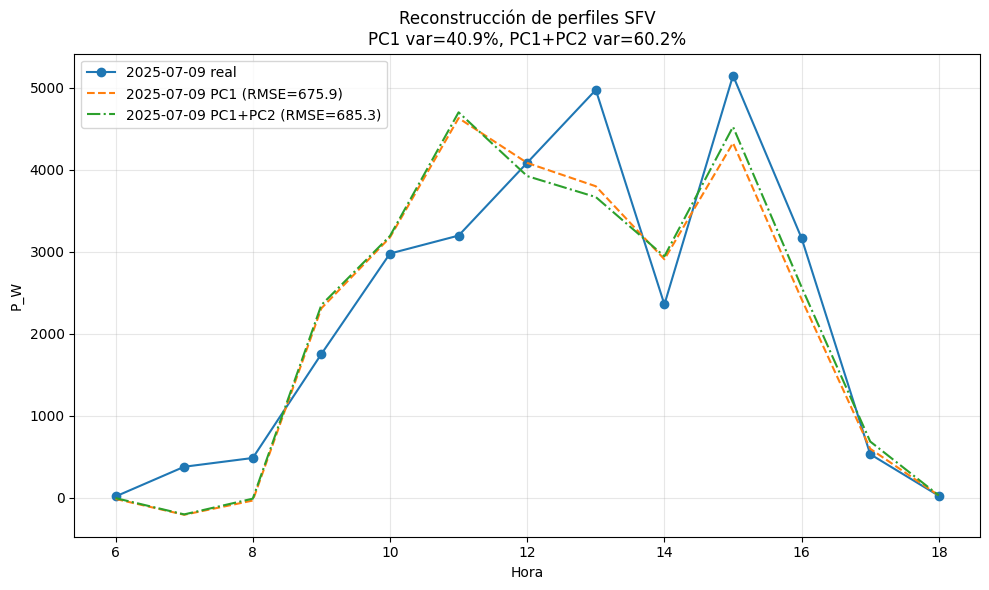

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# === Parámetros: lista de días a reconstruir ===
FECHAS_OBJ = [
    #pd.to_datetime("2025-07-10").date(),
    pd.to_datetime("2025-07-09").date(),
   # pd.to_datetime("2025-07-24").date()
]

# --- Validaciones ---
assert 'perfil' in globals(), "No encuentro 'perfil'. Ejecuta antes la parte que lo crea."
assert 'pca' in globals() and 'scaler' in globals() and 'Z' in globals(), "Faltan 'pca', 'scaler' o 'Z'. Corre antes el bloque de PCA."

# Función para reconstruir usando k componentes
def reconstruccion_por_k_components(i, k):
    z_i_k = Z[i, :k]
    xz_i_hat = z_i_k @ pca.components_[:k, :]
    return scaler.inverse_transform(xz_i_hat.reshape(1, -1)).ravel()

# Varianza explicada
var_pc1 = pca.explained_variance_ratio_[0]
var_pc12 = pca.explained_variance_ratio_[:2].sum()

# --- Gráficos ---
plt.figure(figsize=(10, 6))

for fecha in FECHAS_OBJ:
    if fecha not in perfil.index:
        print(f"⚠️ La fecha {fecha} no está en 'perfil'. Saltando.")
        continue

    i = perfil.index.get_loc(fecha)
    horas = perfil.columns
    x_real = perfil.loc[fecha].values

    # Reconstrucciones
    x_hat_pc1 = reconstruccion_por_k_components(i, 1)
    x_hat_pc12 = reconstruccion_por_k_components(i, 2)

    # RMSE
    rmse_pc1 = np.sqrt(np.mean((x_real - x_hat_pc1)**2))
    rmse_pc12 = np.sqrt(np.mean((x_real - x_hat_pc12)**2))

    # Graficar
    plt.plot(horas, x_real, marker='o', label=f"{fecha} real")
    plt.plot(horas, x_hat_pc1, linestyle='--', label=f"{fecha} PC1 (RMSE={rmse_pc1:.1f})")
    plt.plot(horas, x_hat_pc12, linestyle='-.', label=f"{fecha} PC1+PC2 (RMSE={rmse_pc12:.1f})")

plt.title(f"Reconstrucción de perfiles SFV\nPC1 var={var_pc1:.1%}, PC1+PC2 var={var_pc12:.1%}")
plt.xlabel("Hora"); plt.ylabel("P_W")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

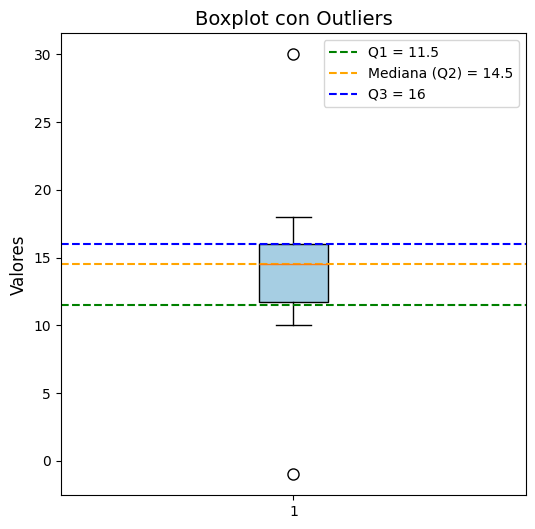

In [ ]:
import matplotlib.pyplot as plt

# Datos
datos = [11, 15, 14, 16, 17, 10, 15, 30, -1, 11, 18, 16, 12, 14, 15, 14]

# Crear figura
fig, ax = plt.subplots(figsize=(6, 6))

# Graficar boxplot
box = ax.boxplot(datos, vert=True, patch_artist=True,
                 flierprops=dict(marker='o', color='red', markersize=8))

# Etiquetas y título
ax.set_title("Boxplot con Outliers", fontsize=14)
ax.set_ylabel("Valores", fontsize=12)

# Colorear la caja
for patch in box['boxes']:
    patch.set(facecolor="#a6cee3")

# Agregar líneas de referencia para Q1, Q2 y Q3
q1 = 11.5
q2 = 14.5
q3 = 16
ax.axhline(q1, color='green', linestyle='--', label=f"Q1 = {q1}")
ax.axhline(q2, color='orange', linestyle='--', label=f"Mediana (Q2) = {q2}")
ax.axhline(q3, color='blue', linestyle='--', label=f"Q3 = {q3}")

# Leyenda
ax.legend()

plt.show()

📂 Sube tu archivo CSV


Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord.csv
=== Varianza explicada por componente ===
PC1: 40.85%
PC2: 19.32%
PC3: 13.02%
PC4: 8.47%
PC5: 7.47%
PC6: 5.16%
PC7: 3.36%
PC8: 1.08%
PC9: 0.72%
PC10: 0.38%
PC11: 0.15%
PC12: 0.01%
PC13: 0.00%
Var. acumulada (PC1+PC2): 60.18%
Var. acumulada (PC1..PC3): 73.20%


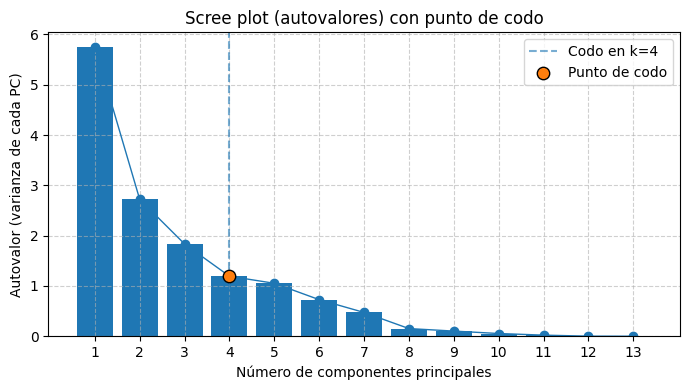

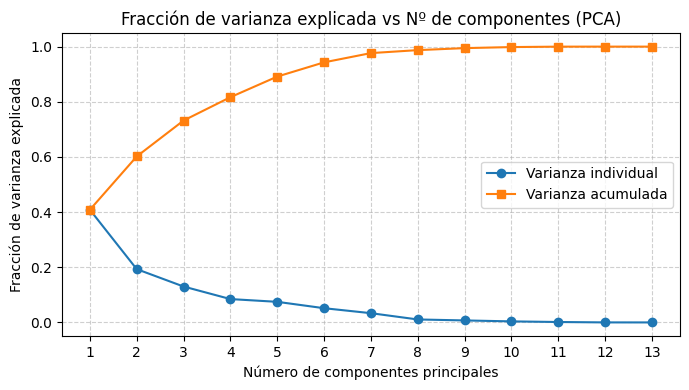

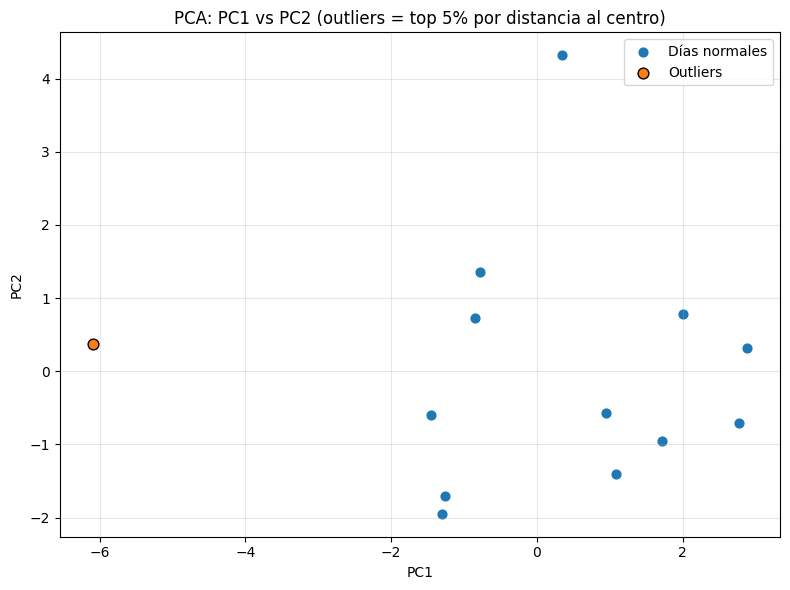


🔎 Días potencialmente anómalos (top 10):
     Fecha       PC1      PC2  DistanciaCentro  EsOutlier
2025-07-09 -6.096703 0.366802         6.107728       True


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

💾 Exportados: pca_perfiles_sfv_scores.csv y pca_perfiles_sfv_outliers.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

💾 RMSE por día exportado: rmse_reconstruccion.csv

🔎 Top 5 días con mayor RMSE (PC1+PC2):
     Fecha    RMSE_PC1  RMSE_PC1_PC2
2025-07-20 1634.328541   1446.762715
2025-07-17 1368.483856   1366.666551
2025-07-16 1000.396830   1037.341404
2025-07-11  924.541768    932.076551
2025-07-22  865.583427    898.538204


In [ ]:
#*****Prueba borrarrr
# ============================
# PCA de perfiles diarios SFV + outliers + Scree plot + RMSE
# (K-means comentado)
# ============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# from sklearn.cluster import KMeans  # ← opcional (comentado)

# ---------- 1) Subir CSV ----------
print("📂 Sube tu archivo CSV")
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

# ---------- 2) Leer y preparar ----------
# Detección simple de separador
with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
    head = f.read(2048)
sep = ';' if head.count(';') > head.count(',') else ','
df = pd.read_csv(file_path, sep=sep)

# Validaciones
if 'FechaHora' not in df.columns:
    raise ValueError("No se encontró la columna 'FechaHora'.")
if 'P_W' not in df.columns:
    raise ValueError("No se encontró la columna 'P_W' (potencia).")

# Tipos y columnas auxiliares
df['FechaHora'] = pd.to_datetime(df['FechaHora'], errors='coerce')
df = df.dropna(subset=['FechaHora'])
df['Fecha'] = df['FechaHora'].dt.date
df['Hora']  = df['FechaHora'].dt.hour

# ---------- 3) Perfiles horarios por día ----------
HORA_MIN, HORA_MAX = 6, 18   # incluye HORA_MAX
mask_horas = (df['Hora'] >= HORA_MIN) & (df['Hora'] <= HORA_MAX)

perfil = (df.loc[mask_horas]
            .groupby(['Fecha','Hora'])['P_W'].mean()
            .unstack('Hora'))

# === Guarda una copia para gráficos "reales" sin extrapolación agresiva ===
perfil_original = perfil.copy()

# === Imputación amigable con PCA (sin extrapolar extremos) ===
perfil = perfil.sort_index(axis=1)
# 1) Solo interpolar huecos internos (no llena colas)
perfil = perfil.interpolate(axis=1, limit_area='inside')
# 2) Exigir cobertura mínima por día (p.ej., ≥90% de horas válidas)
min_cols = int(np.ceil(0.9 * perfil.shape[1]))
perfil = perfil.dropna(thresh=min_cols)
# 3) Para NaN residuales (bordes que no se interpolaron), imputar por HORA (mediana entre días)
perfil = perfil.apply(lambda col: col.fillna(col.median()), axis=0)

# ---------- 4) Estandarización y PCA ----------
X = perfil.values  # (n_dias x n_horas)
scaler = StandardScaler()
Xz = scaler.fit_transform(X)

pca = PCA(n_components=None, random_state=42)
Z = pca.fit_transform(Xz)

expl = pca.explained_variance_ratio_
expl_acum = expl.cumsum()
eigvals = pca.explained_variance_

print("=== Varianza explicada por componente ===")
for i, v in enumerate(expl, start=1):
    print(f"PC{i}: {v:.2%}")
if len(expl) >= 2:
    print(f"Var. acumulada (PC1+PC2): {expl_acum[1]:.2%}")
if len(expl) >= 3:
    print(f"Var. acumulada (PC1..PC3): {expl_acum[2]:.2%}")

# ---------- 5A) Scree plot clásico (autovalores) + punto de codo ----------
def elbow_index(y):
    x = np.arange(1, len(y)+1).astype(float)
    p0 = np.array([x[0], y[0]])
    pN = np.array([x[-1], y[-1]])
    v = pN - p0
    v_norm = np.linalg.norm(v)
    pts = np.column_stack([x, y])
    cross = np.abs(v[0] * (pts[:, 1] - p0[1]) - v[1] * (pts[:, 0] - p0[0]))
    dist = cross / (v_norm if v_norm != 0 else 1.0)
    idx = int(np.argmax(dist))
    return idx, x[idx], y[idx], dist

idx_elbow, x_elbow, y_elbow, _ = elbow_index(eigvals)

plt.figure(figsize=(7,4))
plt.bar(range(1, len(eigvals)+1), eigvals)
plt.plot(range(1, len(eigvals)+1), eigvals, 'o-', linewidth=1)
plt.axvline(idx_elbow+1, linestyle='--', alpha=0.6, label=f"Codo en k={idx_elbow+1}")
plt.scatter([x_elbow], [y_elbow], s=80, edgecolor='k', zorder=5, label="Punto de codo")
plt.title('Scree plot (autovalores) con punto de codo')
plt.xlabel('Número de componentes principales')
plt.ylabel('Autovalor (varianza de cada PC)')
plt.xticks(range(1, len(eigvals)+1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 5B) Fracción de varianza explicada ----------
nums = range(1, len(expl)+1)
plt.figure(figsize=(7,4))
plt.plot(nums, expl, 'o-', label='Varianza individual')
plt.plot(nums, expl_acum, 's-', label='Varianza acumulada')
plt.title('Fracción de varianza explicada vs Nº de componentes (PCA)')
plt.xlabel('Número de componentes principales')
plt.ylabel('Fracción de varianza explicada')
plt.xticks(nums)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ---------- 6) Proyección PC1–PC2 + OUTLIERS ----------
pc12 = Z[:, :2]
centro = pc12.mean(axis=0)
dist = np.linalg.norm(pc12 - centro, axis=1)
umbral = np.percentile(dist, 95)
out_mask = dist >= umbral

plt.figure(figsize=(8,6))
plt.scatter(pc12[~out_mask, 0], pc12[~out_mask, 1], s=40, label='Días normales')
plt.scatter(pc12[out_mask, 0], pc12[out_mask, 1], s=60, edgecolor='k', label='Outliers')
plt.title('PCA: PC1 vs PC2 (outliers = top 5% por distancia al centro)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

# Listado de outliers (top 10)
outliers_df = pd.DataFrame({
    'Fecha': perfil.index.astype(str),
    'PC1': pc12[:,0],
    'PC2': pc12[:,1],
    'DistanciaCentro': dist,
    'EsOutlier': out_mask
}).sort_values('DistanciaCentro', ascending=False)

print("\n🔎 Días potencialmente anómalos (top 10):")
print(outliers_df[outliers_df['EsOutlier']].head(10).to_string(index=False))

# ---------- 7) Exportar resultados ----------
pcs_df = pd.DataFrame(Z, index=perfil.index, columns=[f"PC{i}" for i in range(1, Z.shape[1]+1)])
pcs_df.to_csv("pca_perfiles_sfv_scores.csv", index_label='Fecha')
outliers_df.to_csv("pca_perfiles_sfv_outliers.csv", index=False)
files.download("pca_perfiles_sfv_scores.csv")
files.download("pca_perfiles_sfv_outliers.csv")
print("💾 Exportados: pca_perfiles_sfv_scores.csv y pca_perfiles_sfv_outliers.csv")

# ---------- (OPCIONAL, COMENTADO) K-means sobre PC1–PC2 ----------
# N_CLUSTERS = 3
# kmeans = KMeans(n_clusters=N_CLUSTERS, random_state=42, n_init=10)
# labels = kmeans.fit_predict(pc12)
# plt.figure(figsize=(8,6))
# for k in range(N_CLUSTERS):
#     idx = labels == k
#     plt.scatter(pc12[idx,0], pc12[idx,1], s=40, label=f"Cluster {k}")
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
#             s=200, marker='X', edgecolor='k', label='Centros')
# plt.title("K-means en PC1–PC2 (OPCIONAL)")
# plt.xlabel("PC1"); plt.ylabel("PC2")
# plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# ---------- 8) RMSE de reconstrucción (PC1 y PC1+PC2) ----------
import numpy as np

# (Opcional) fija una fecha objetivo; si no está, usa la más cercana
FECHA_OBJ = None  # por ejemplo: FECHA_OBJ = "2025-07-24"

def _reconstruccion_fila_k(i, k):
    z_i_k = Z[i, :k]
    xz_i_hat = z_i_k @ pca.components_[:k, :]
    x_i_hat = scaler.inverse_transform(xz_i_hat.reshape(1, -1)).ravel()
    return x_i_hat

# RMSE para una fecha (si se define FECHA_OBJ)
if FECHA_OBJ is not None:
    FECHA_OBJ = pd.to_datetime(FECHA_OBJ).date()
    if FECHA_OBJ not in perfil.index:
        fechas_disp = pd.to_datetime(pd.Series(perfil.index))
        i_cerc = (fechas_disp - pd.Timestamp(FECHA_OBJ)).abs().argmin()
        FECHA_OBJ = perfil.index[i_cerc]
        print(f"⚠️ Fecha no encontrada; usando la más cercana: {FECHA_OBJ}")

    idx = perfil.index.get_loc(FECHA_OBJ)
    x_real = perfil_original.loc[FECHA_OBJ].values  # usa el real sin extrapolación
    horas = perfil.columns
    # filtra NaN del real para cálculo honesto
    mask = ~np.isnan(x_real)
    x_real = x_real[mask]
    horas = horas[mask]

    x_hat_pc1  = _reconstruccion_fila_k(idx, 1)[mask]
    x_hat_pc12 = _reconstruccion_fila_k(idx, 2)[mask]

    rmse_pc1  = float(np.sqrt(np.mean((x_real - x_hat_pc1 )**2)))
    rmse_pc12 = float(np.sqrt(np.mean((x_real - x_hat_pc12)**2)))
    print(f"\n📅 RMSE {FECHA_OBJ}:  PC1={rmse_pc1:,.2f}  |  PC1+PC2={rmse_pc12:,.2f} (P_W)")

    # (Opcional) gráfico comparación
    plt.figure(figsize=(10,5))
    plt.plot(horas, x_real, marker='o', label='Perfil real (sin extrap.)')
    plt.plot(horas, x_hat_pc1,  marker='o', linestyle='--', label=f'PC1 (RMSE={rmse_pc1:,.1f})')
    plt.plot(horas, x_hat_pc12, marker='o', linestyle='-.', label=f'PC1+PC2 (RMSE={rmse_pc12:,.1f})')
    plt.title(f"Reconstrucción del perfil horario de P_W — {FECHA_OBJ}")
    plt.xlabel("Hora"); plt.ylabel("P_W")
    plt.grid(alpha=0.3); plt.legend(); plt.tight_layout(); plt.show()

# RMSE para todos los días (se guarda a CSV)
rmse_rows = []
for i, fecha in enumerate(perfil.index):
    xr = perfil_original.loc[fecha].values
    mask = ~np.isnan(xr)
    xr = xr[mask]
    xhat1 = _reconstruccion_fila_k(i, 1)[mask]
    xhat2 = _reconstruccion_fila_k(i, 2)[mask]
    rmse1 = float(np.sqrt(np.mean((xr - xhat1)**2)))
    rmse2 = float(np.sqrt(np.mean((xr - xhat2)**2)))
    rmse_rows.append({"Fecha": str(fecha), "RMSE_PC1": rmse1, "RMSE_PC1_PC2": rmse2})

rmse_df = pd.DataFrame(rmse_rows)
rmse_df.to_csv("rmse_reconstruccion.csv", index=False)
files.download("rmse_reconstruccion.csv")
print("💾 RMSE por día exportado: rmse_reconstruccion.csv")

print("\n🔎 Top 5 días con mayor RMSE (PC1+PC2):")
print(rmse_df.sort_values("RMSE_PC1_PC2", ascending=False).head(5).to_string(index=False))


Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord.csv


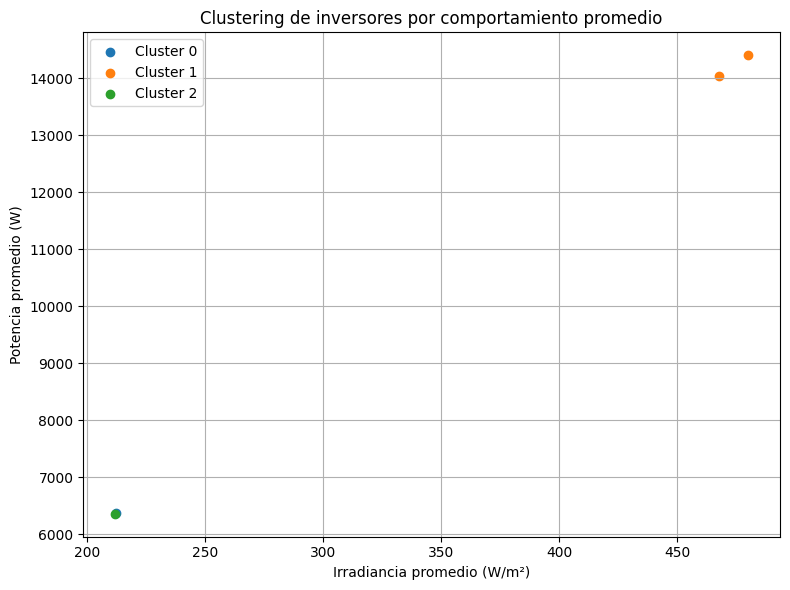

Resultados guardados en 'kmeans_inversores_clusters.csv'

Tabla de resultados:
   Inversor           P_W        W/m2        T_C       Vac_V      Iac_A  \
0  FR45kWp3   6357.317073  211.910122  29.675203  226.589431  16.226789   
1  FR45kWp4   6365.925150  212.197874  29.802096  226.443114  16.662186   
2  FR52kWp1  14035.328849  467.844283  28.883508  286.892651  49.189544   
3  FR52kWp2  14405.401621  480.180069  28.830337  286.682486  50.496632   

   Cluster  
0        2  
1        0  
2        1  
3        1  


In [ ]:
# --- K-Means por inversor en un SFV: Potencia vs Irradiancia ---
# Requisitos: pandas, numpy, scikit-learn, matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files  # Si no usas Colab, puedes adaptarlo con tkinter

# -------- 1) Subir archivo desde PC --------
uploaded = files.upload()

# Tomar el primer archivo subido
file_name = list(uploaded.keys())[0]

# -------- 2) Detectar separador --------
with open(file_name, 'r', encoding='utf-8', errors='ignore') as f:
    head = f.read(2048)
sep = ';' if head.count(';') > head.count(',') else ','

# -------- 3) Cargar datos --------
df = pd.read_csv(file_name, sep=sep)

# -------- 4) Preprocesamiento --------
df["FechaHora"] = pd.to_datetime(df["FechaHora"], errors="coerce")
df_day = df[df["W/m2"] > 200].copy()  # filtrar solo datos con irradiancia útil

if df_day.empty:
    raise ValueError("No hay registros con W/m2 > 200. Ajusta el umbral o revisa el dataset.")

# -------- 5) Agregación por inversor --------
agg_df = df_day.groupby("Inversor", as_index=False).agg({
    "P_W": "mean",
    "W/m2": "mean",
    "T_C": "mean",
    "Vac_V": "mean",
    "Iac_A": "mean"
})

# -------- 6) Normalización + K-Means --------
features = ["P_W", "W/m2", "T_C", "Vac_V", "Iac_A"]
X_scaled = StandardScaler().fit_transform(agg_df[features])

k = 3  # número de clústeres
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
agg_df["Cluster"] = kmeans.fit_predict(X_scaled)

# -------- 7) Gráfico --------
plt.figure(figsize=(8, 6))
for clu in sorted(agg_df["Cluster"].unique()):
    subset = agg_df[agg_df["Cluster"] == clu]
    plt.scatter(subset["W/m2"], subset["P_W"], label=f"Cluster {clu}")
plt.xlabel("Irradiancia promedio (W/m²)")
plt.ylabel("Potencia promedio (W)")
plt.title("Clustering de inversores por comportamiento promedio")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------- 8) Guardar resultados --------
agg_df.to_csv("kmeans_inversores_clusters.csv", index=False)
print("Resultados guardados en 'kmeans_inversores_clusters.csv'")
print("\nTabla de resultados:")
print(agg_df)

Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord.csv


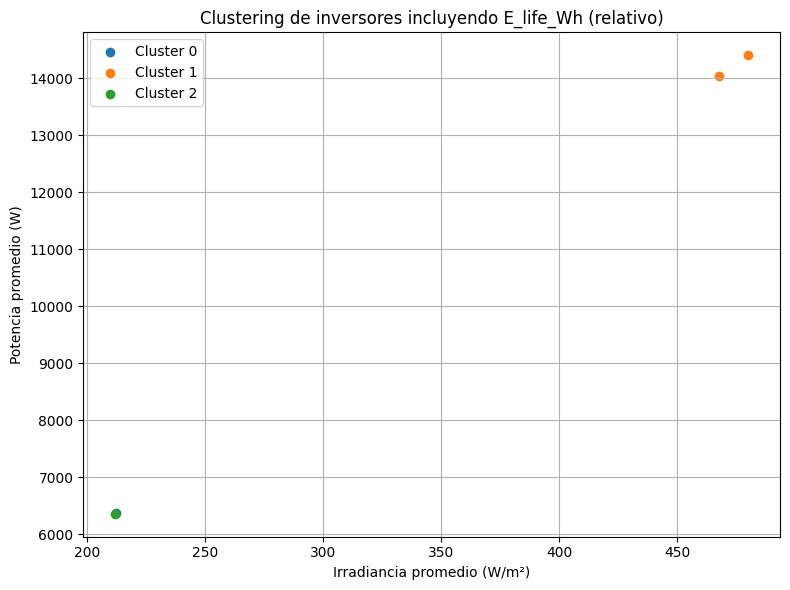

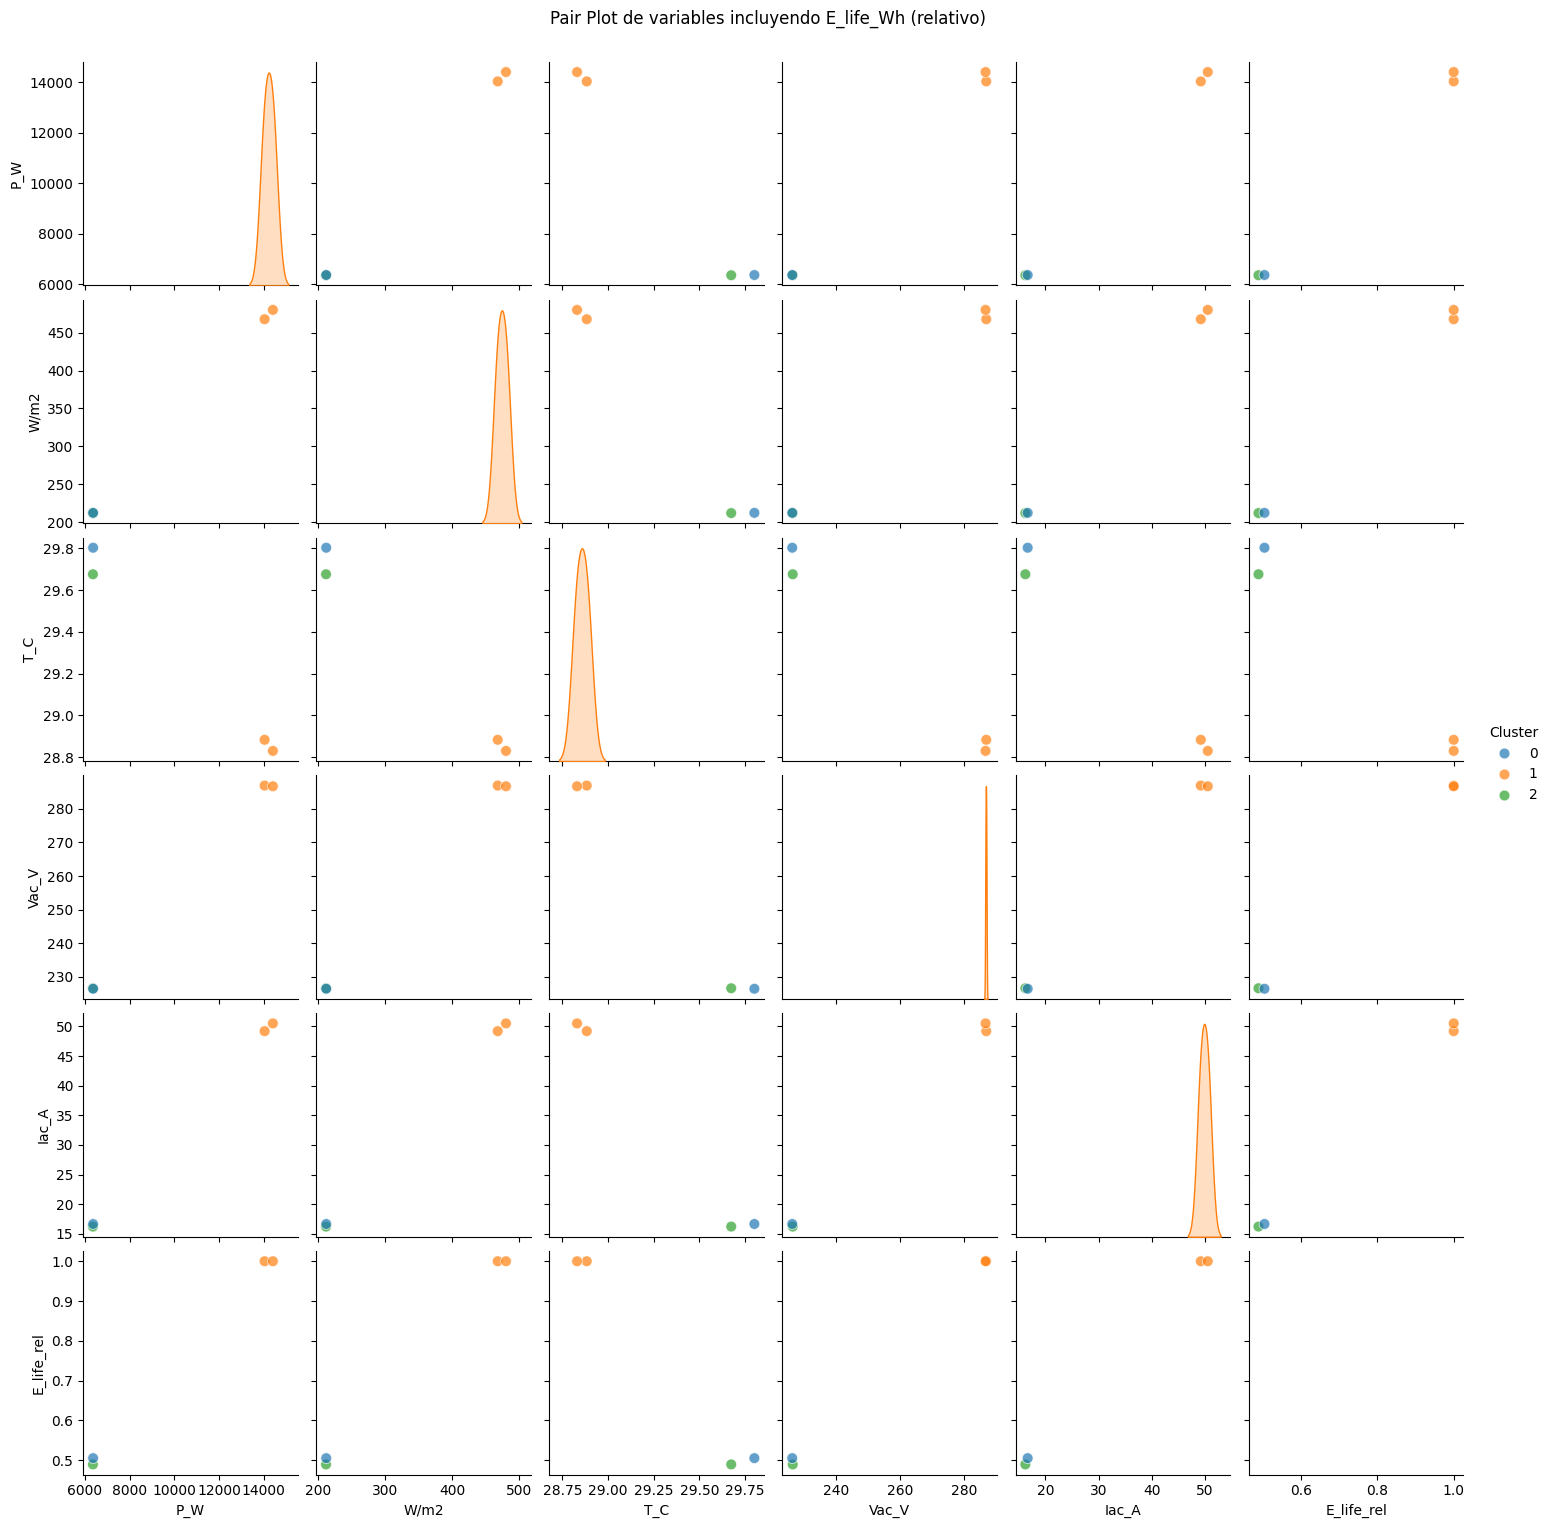

Resultados guardados en 'kmeans_inversores_con_E_life.csv'

Tabla de resultados:
   Inversor           P_W        W/m2        T_C       Vac_V      Iac_A  \
0  FR45kWp3   6357.317073  211.910122  29.675203  226.589431  16.226789   
1  FR45kWp4   6365.925150  212.197874  29.802096  226.443114  16.662186   
2  FR52kWp1  14035.328849  467.844283  28.883508  286.892651  49.189544   
3  FR52kWp2  14405.401621  480.180069  28.830337  286.682486  50.496632   

     E_life_Wh  E_life_rel  Cluster  
0  105047000.0    0.489163        2  
1  108429000.0    0.504912        0  
2  214748300.0    1.000000        1  
3  214748300.0    1.000000        1  


In [ ]:
# --- K-Means con E_life_Wh incluida --- Borrarrrr
# Requisitos: pandas, numpy, scikit-learn, seaborn, matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from google.colab import files

# -------- 1) Subir archivo desde PC --------
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# -------- 2) Detectar separador --------
with open(file_name, 'r', encoding='utf-8', errors='ignore') as f:
    head = f.read(2048)
sep = ';' if head.count(';') > head.count(',') else ','

# -------- 3) Cargar datos --------
df = pd.read_csv(file_name, sep=sep)

# -------- 4) Preprocesamiento --------
df["FechaHora"] = pd.to_datetime(df["FechaHora"], errors="coerce")
df_day = df[df["W/m2"] > 200].copy()  # filtrar solo datos con irradiancia útil

if df_day.empty:
    raise ValueError("No hay registros con W/m2 > 200. Ajusta el umbral o revisa el dataset.")

# -------- 5) Agregación por inversor --------
agg_df = df_day.groupby("Inversor", as_index=False).agg({
    "P_W": "mean",
    "W/m2": "mean",
    "T_C": "mean",
    "Vac_V": "mean",
    "Iac_A": "mean",
    "E_life_Wh": "max"  # valor acumulado
})

# -------- 6) Normalizar E_life_Wh para evitar distorsión --------
agg_df["E_life_rel"] = agg_df["E_life_Wh"] / agg_df["E_life_Wh"].max()

# -------- 7) Normalización + K-Means --------
features = ["P_W", "W/m2", "T_C", "Vac_V", "Iac_A", "E_life_rel"]
X_scaled = StandardScaler().fit_transform(agg_df[features])

k = 3  # número de clústeres
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
agg_df["Cluster"] = kmeans.fit_predict(X_scaled)

# -------- 8) Gráfico Potencia vs Irradiancia --------
plt.figure(figsize=(8, 6))
for clu in sorted(agg_df["Cluster"].unique()):
    subset = agg_df[agg_df["Cluster"] == clu]
    plt.scatter(subset["W/m2"], subset["P_W"], label=f"Cluster {clu}")
plt.xlabel("Irradiancia promedio (W/m²)")
plt.ylabel("Potencia promedio (W)")
plt.title("Clustering de inversores incluyendo E_life_Wh (relativo)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------- 9) Pair Plot multivariable --------
sns.pairplot(
    agg_df,
    vars=features,
    hue="Cluster",
    palette="tab10",
    diag_kind="kde",
    plot_kws={"alpha": 0.7, "s": 60}
)
plt.suptitle("Pair Plot de variables incluyendo E_life_Wh (relativo)", y=1.02)
plt.show()

# -------- 10) Guardar resultados --------
agg_df.to_csv("kmeans_inversores_con_E_life.csv", index=False)
print("Resultados guardados en 'kmeans_inversores_con_E_life.csv'")
print("\nTabla de resultados:")
print(agg_df)

Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord (10).csv


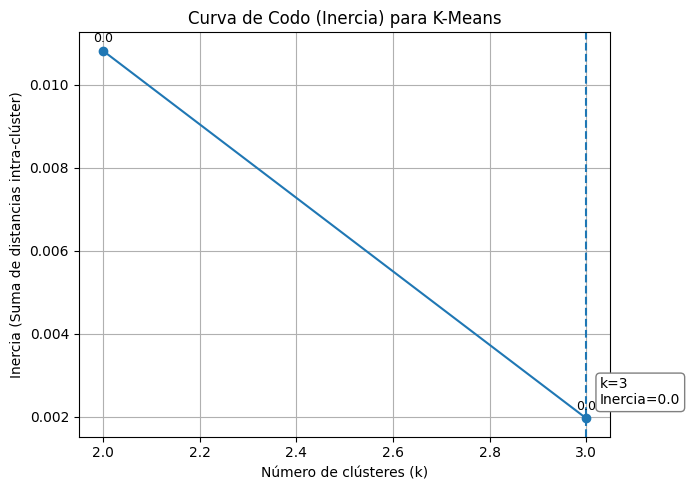

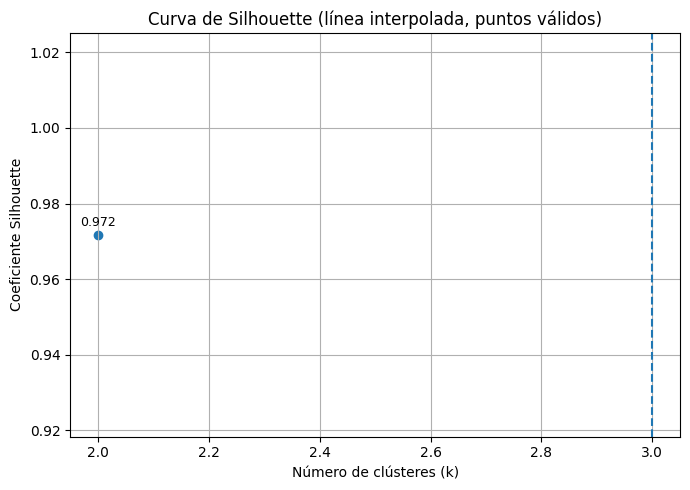


Asignación de clúster por inversor:
   Inversor  Cluster
0  FR45kWp3        1
1  FR45kWp4        1
2  FR52kWp1        2
3  FR52kWp2        0

Conteo de inversores por clúster:
Cluster
1    2
2    1
0    1
Name: count, dtype: int64

Resultados por inversor:
Inversor       P_W    W/m2   E_life_Wh  E_life_rel  Cluster
FR45kWp3  6357.317 211.910 105047000.0       0.489        1
FR45kWp4  6365.925 212.198 108429000.0       0.505        1
FR52kWp1 14035.329 467.844 214748300.0       1.000        2
FR52kWp2 14405.402 480.180 214748300.0       1.000        0

Archivo guardado: pairplot_kmeans_resultados.csv


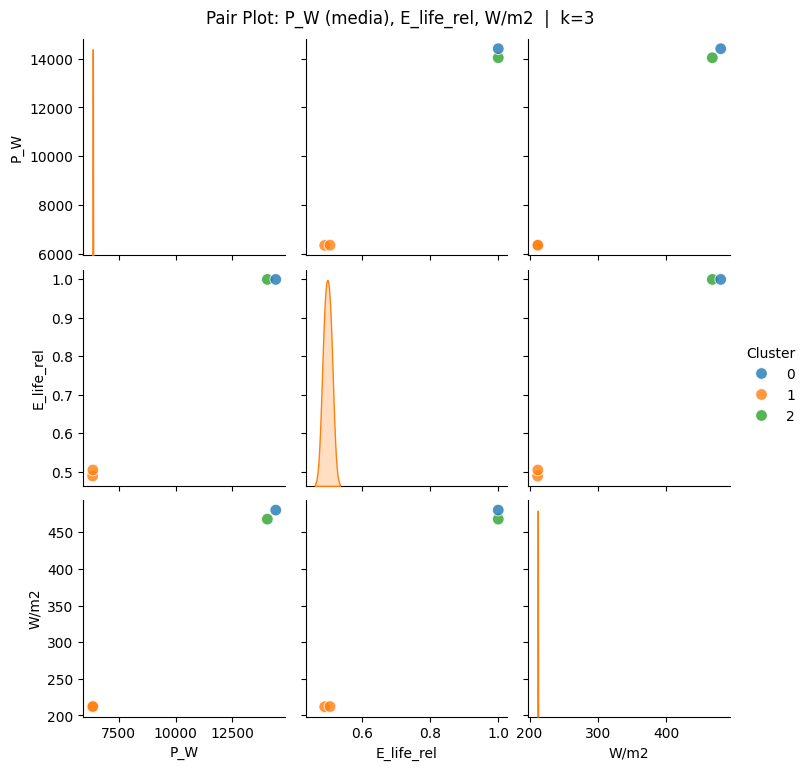

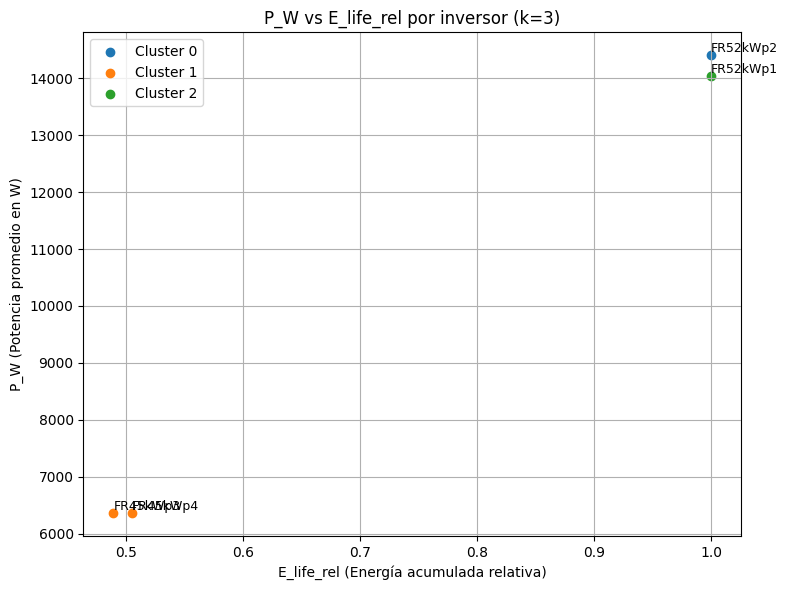

<Figure size 640x480 with 0 Axes>

In [ ]:
# === K-Means por inversor con Codo (Inercia) y Silhouette (con interpolación) y k fijo === OK
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from google.colab import files

# ---------- Parámetro: k fijo ----------
k_final = 3   # <<< CAMBIA AQUÍ EL k QUE QUIERES USAR

# ---------- 1) Subir archivo desde PC ----------
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# ---------- 2) Detectar separador ----------
with open(file_name, 'r', encoding='utf-8', errors='ignore') as f:
    head = f.read(2048)
sep = ';' if head.count(';') > head.count(',') else ','

# ---------- 3) Cargar datos ----------
df = pd.read_csv(file_name, sep=sep)

# ---------- 4) Preprocesamiento mínimo ----------
df["FechaHora"] = pd.to_datetime(df["FechaHora"], errors="coerce")
for col in ["P_W", "W/m2", "E_life_Wh"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# Filtrar operación diurna (evita ruido nocturno)
df_day = df[df["W/m2"] > 200].copy()
if df_day.empty:
    raise ValueError("No hay registros con W/m2 > 200. Ajusta el umbral o revisa el dataset.")

# ---------- 5) Agregar por inversor ----------
agg_df = df_day.groupby("Inversor", as_index=False).agg({
    "P_W": "mean",
    "W/m2": "mean",
    "E_life_Wh": "max"
})

# Limpiar valores inválidos
agg_df = agg_df.replace([np.inf, -np.inf], np.nan).dropna(subset=["P_W", "W/m2", "E_life_Wh"])
if len(agg_df) < 3:
    raise ValueError("Se requieren al menos 3 inversores para curvas de codo y silhouette.")

# ---------- 6) E_life relativo ----------
agg_df["E_life_rel"] = agg_df["E_life_Wh"] / agg_df["E_life_Wh"].max()

# ---------- 7) Preparar features y escalado ----------
features = ["P_W", "E_life_rel", "W/m2"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(agg_df[features])

# ---------- 8) Curvas de Codo y Silhouette ----------
n_samples = len(agg_df)
max_k = min(10, n_samples - 1)        # límite superior razonable
ks = list(range(2, max_k + 1))

inertias = []
sil_scores = []     # guardamos None donde silhouette no aplique

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    # silhouette no aplica si algún clúster queda con un solo punto
    _, counts = np.unique(labels, return_counts=True)
    if np.any(counts == 1):
        sil_scores.append(None)
    else:
        sil_scores.append(silhouette_score(X_scaled, labels))

# ---- Interpolación de Silhouette para graficar línea continua ----
def interpolate_series(x_list, y_list):
    """Devuelve y_interp con interpolación lineal en posiciones None;
       extremos se rellenan con el valor válido más cercano."""
    x = np.array(x_list, dtype=float)
    y = np.array([np.nan if v is None else float(v) for v in y_list], dtype=float)
    valid = ~np.isnan(y)
    if valid.sum() < 2:
        # con 0 o 1 punto válido no tiene sentido interpolar
        return y
    # Interpolación lineal en el dominio de ks
    y_interp = np.interp(x, x[valid], y[valid])
    # Rellenar NaN iniciales/finales con valores extremos (por si los hubiera)
    first_idx = np.where(valid)[0][0]
    last_idx  = np.where(valid)[0][-1]
    y_interp[:first_idx] = y[first_idx]
    y_interp[last_idx+1:] = y[last_idx]
    return y_interp

sil_interp = interpolate_series(ks, sil_scores)

# ---------- 9) Graficar Curva de Codo ----------
plt.figure(figsize=(7,5))
plt.plot(ks, inertias, '-o')
for k, s in zip(ks, inertias):
    plt.annotate(f"{s:.1f}", (k, s), textcoords="offset points", xytext=(0,6), ha='center', fontsize=9)

if k_final in ks:
    inertia_k = inertias[ks.index(k_final)]
    plt.axvline(k_final, linestyle='--', linewidth=1.5)
    plt.annotate(f"k={k_final}\nInercia={inertia_k:.1f}",
                 (k_final, inertia_k), xytext=(10,10), textcoords="offset points",
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1))

plt.xlabel("Número de clústeres (k)")
plt.ylabel("Inercia (Suma de distancias intra-clúster)")
plt.title("Curva de Codo (Inercia) para K-Means")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- 10) Graficar Curva de Silhouette (línea interpolada + puntos válidos) ----------
plt.figure(figsize=(7,5))
# Línea continua interpolada
plt.plot(ks, sil_interp, '-')
# Puntos originales válidos
ks_valid = [k for k, s in zip(ks, sil_scores) if s is not None]
sil_valid = [s for s in sil_scores if s is not None]
plt.scatter(ks_valid, sil_valid)

# Anotar solo puntos válidos
for k, s in zip(ks_valid, sil_valid):
    plt.annotate(f"{s:.3f}", (k, s), textcoords="offset points", xytext=(0,6), ha='center', fontsize=9)

# Marcar k_final
if k_final in ks:
    sil_k = sil_interp[ks.index(k_final)]
    plt.axvline(k_final, linestyle='--', linewidth=1.5)
    plt.annotate(f"k={k_final}\nSilhouette={sil_k:.3f}",
                 (k_final, sil_k), xytext=(10,10), textcoords="offset points",
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", lw=1))

plt.xlabel("Número de clústeres (k)")
plt.ylabel("Coeficiente Silhouette")
plt.title("Curva de Silhouette (línea interpolada, puntos válidos)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ---------- 11) K-Means final con k fijo ----------
kmeans = KMeans(n_clusters=k_final, random_state=42, n_init=10)
agg_df["Cluster"] = kmeans.fit_predict(X_scaled)

# ---------- 12) Mostrar y guardar tabla ----------
cols = ["Inversor", "P_W", "W/m2", "E_life_Wh", "E_life_rel", "Cluster"]
agg_df_print = agg_df[cols].copy()
agg_df_print[["P_W", "W/m2", "E_life_rel"]] = agg_df_print[["P_W", "W/m2", "E_life_rel"]].round(3)

print("\nAsignación de clúster por inversor:")
print(agg_df_print[["Inversor", "Cluster"]])

print("\nConteo de inversores por clúster:")
print(agg_df_print["Cluster"].value_counts())

print("\nResultados por inversor:")
print(agg_df_print.to_string(index=False))

agg_df_print.to_csv("pairplot_kmeans_resultados.csv", index=False)
print("\nArchivo guardado: pairplot_kmeans_resultados.csv")

# ---------- 13) Pair plot (P_W, E_life_rel, W/m2) ----------
g = sns.pairplot(
    agg_df,
    vars=["P_W", "E_life_rel", "W/m2"],
    hue="Cluster",
    palette="tab10",
    diag_kind="kde",
    plot_kws={"alpha": 0.8, "s": 70}
)
g.fig.suptitle(f"Pair Plot: P_W (media), E_life_rel, W/m2  |  k={k_final}", y=1.02)
plt.show()
g.savefig("pairplot_pw_eliferel_irr.png", dpi=150)

# ---------- 14) Scatter final P_W vs E_life_rel con etiquetas ----------
plt.figure(figsize=(8, 6))
for cluster in sorted(agg_df["Cluster"].unique()):
    subset = agg_df[agg_df["Cluster"] == cluster]
    plt.scatter(subset["E_life_rel"], subset["P_W"], label=f"Cluster {cluster}")
    for _, r in subset.iterrows():
        plt.text(r["E_life_rel"], r["P_W"], r["Inversor"], fontsize=9, ha="left", va="bottom")

plt.xlabel("E_life_rel (Energía acumulada relativa)")
plt.ylabel("P_W (Potencia promedio en W)")
plt.title(f"P_W vs E_life_rel por inversor (k={k_final})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.savefig("scatter_pw_vs_eliferel.png", dpi=150)

Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord (15).csv
CSV generados: daily_cluster_history.csv, daily_alerts.csv, summary_by_inverter.csv


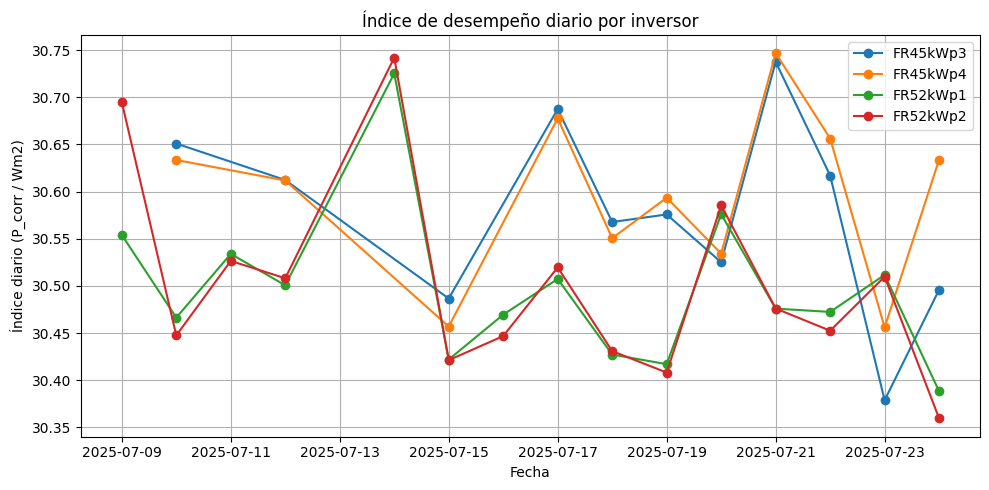

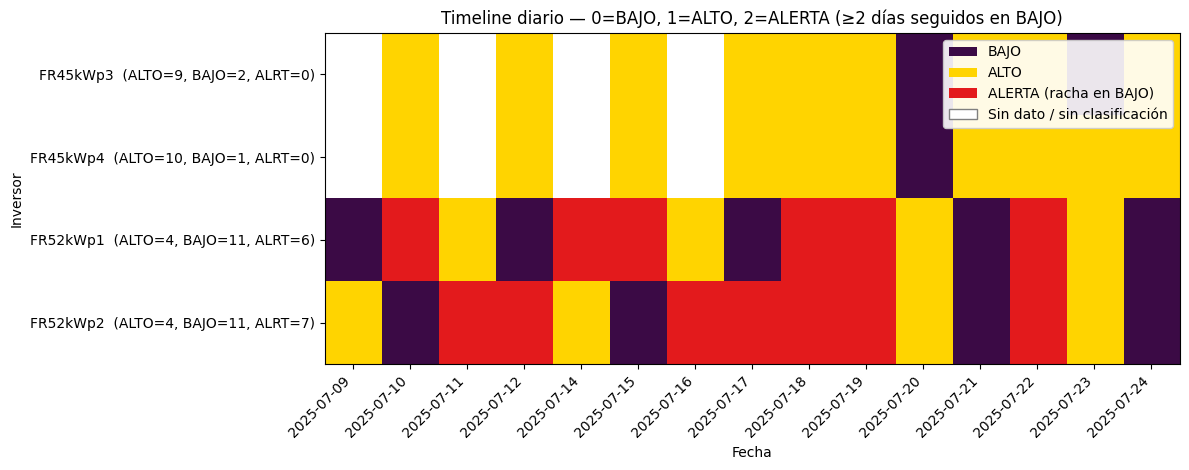

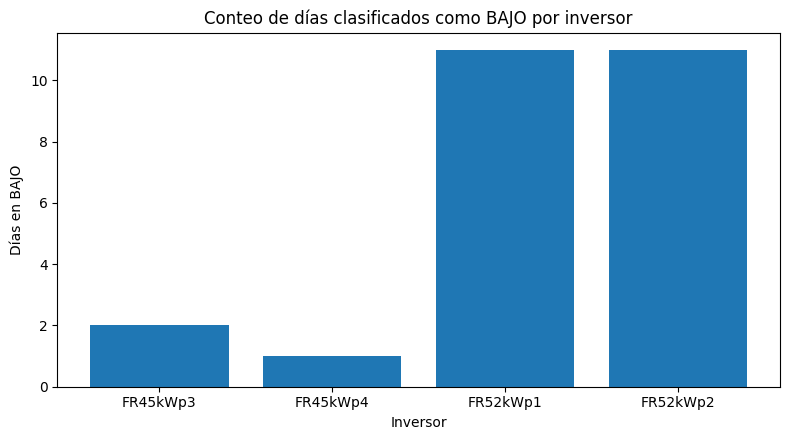


Listo. Ajusta si quieres:
- K_FINAL = 2 (número de estados por día)
- IRR_THRESHOLD = 200.0 W/m² (umbral de operación)
- ALERT_STREAK = 2 días (tamaño de racha para ALERTA)
- GAMMA_TEMP para corrección térmica (si dispones de T_C).


In [ ]:
# ================================================================
# Mantenimiento predictivo diario por inversor con K-Means (k fijo) OK
# ================================================================
# Salidas:
#  - daily_cluster_history.csv : histórico día-inversor con métricas y clúster
#  - daily_alerts.csv          : filas con ALERTA
#  - summary_by_inverter.csv   : resumen por inversor (ALTO/BAJO/ALERTAS/rachas)
#  - fig_index_series.png      : series del índice diario por inversor
#  - fig_cluster_timeline.png  : timeline (matriz) de estados con ALERTA en rojo
#  - fig_cluster_counts.png    : conteo de días BAJO por inversor
#
# Requisitos: pandas, numpy, scikit-learn, matplotlib
# Funciona en Colab (files.upload) y en Jupyter/PC (tkinter)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ---------------- Parámetros ----------------
K_FINAL = 2                 # número de clústeres por día (ALTO/BAJO)
IRR_THRESHOLD = 200.0       # W/m² mínimo para considerar operación diurna
GAMMA_TEMP = -0.004         # -0.4 %/°C para corrección térmica del módulo
ALERT_STREAK = 2            # días consecutivos en BAJO para marcar ALERTA

# ---------------- Carga interactiva ----------------
def load_csv_interactive():
    # Colab
    try:
        from google.colab import files
        uploaded = files.upload()
        fname = list(uploaded.keys())[0]
        with open(fname, 'r', encoding='utf-8', errors='ignore') as f:
            head = f.read(2048)
        sep = ';' if head.count(';') > head.count(',') else ','
        return pd.read_csv(fname, sep=sep)
    except Exception:
        # Jupyter / PC
        from tkinter import Tk, filedialog
        Tk().withdraw()
        fname = filedialog.askopenfilename(
            title="Selecciona el CSV del SFV",
            filetypes=[("CSV", "*.csv"), ("Todos", "*.*")]
        )
        if not fname:
            raise ValueError("No se seleccionó archivo.")
        with open(fname, 'r', encoding='utf-8', errors='ignore') as f:
            head = f.read(2048)
        sep = ';' if head.count(';') > head.count(',') else ','
        return pd.read_csv(fname, sep=sep)

df = load_csv_interactive()

# ---------------- Preprocesamiento ----------------
# Chequeo de columnas mínimas
required = {"Inversor", "P_W", "W/m2", "FechaHora"}
missing = required - set(df.columns)
if missing:
    raise ValueError(f"Faltan columnas requeridas: {missing}")

df["FechaHora"] = pd.to_datetime(df["FechaHora"], errors="coerce")
for col in ["P_W", "W/m2", "T_C", "E_life_Wh"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Filtrar operación diurna
df = df[df["W/m2"] > IRR_THRESHOLD].copy()
df["Fecha"] = df["FechaHora"].dt.date

# ---------------- Métricas diarias (Fecha, Inversor) ----------------
agg = {"P_W": "mean", "W/m2": "mean"}
if "T_C" in df.columns:
    agg["T_C"] = "mean"

daily = df.groupby(["Fecha", "Inversor"], as_index=False).agg(agg)

# Corrección térmica (si hay T_C)
if "T_C" in daily.columns:
    # P_corr = P_W / (1 + gamma*(T-25))
    daily["P_corr"] = daily["P_W"] / (1.0 + GAMMA_TEMP * (daily["T_C"] - 25.0))
else:
    daily["P_corr"] = daily["P_W"]

# Índice de desempeño (quita efecto de clima)
daily["P_index"] = daily["P_corr"] / daily["W/m2"]

# ---------------- K-Means por día (k fijo) ----------------
records = []
scaler = StandardScaler()

for fecha, df_d in daily.groupby("Fecha"):
    if len(df_d) < K_FINAL:   # se necesitan >= K_FINAL inversores ese día
        continue

    X = df_d[["P_index"]].values
    Xs = scaler.fit_transform(X)

    km = KMeans(n_clusters=K_FINAL, random_state=42, n_init=10)
    labels = km.fit_predict(Xs)

    # Ordenar clústeres por centroide (menor->BAJO, mayor->ALTO)
    centers = km.cluster_centers_.ravel()
    order = np.argsort(centers)
    id_low, id_high = order[0], order[-1]
    lab_txt = np.where(labels == id_high, "ALTO", "BAJO")

    for (_, row), lab, txt in zip(df_d.iterrows(), labels, lab_txt):
        records.append({
            "Fecha": fecha,
            "Inversor": row["Inversor"],
            "P_W_mean": row["P_W"],
            "Wm2_mean": row["W/m2"],
            "T_C_mean": row["T_C"] if "T_C" in daily.columns else np.nan,
            "P_corr": row["P_corr"],
            "P_index": row["P_index"],
            "Cluster_id": int(lab),
            "Cluster_txt": txt
        })

hist = pd.DataFrame(records)
if hist.empty:
    raise ValueError("No se generó histórico (¿faltan días o inversores tras el filtrado?).")

# Ordenar cronológicamente
hist = hist.sort_values(["Inversor", "Fecha"]).reset_index(drop=True)

# (Opcional) Clúster base por inversor (moda) — útil para reportes
base = hist.groupby("Inversor")["Cluster_txt"].agg(lambda s: s.mode().iat[0])
hist = hist.merge(base.rename("Cluster_base"), on="Inversor", how="left")

# ---------------- Rachas y ALERTAS (en BAJO) ----------------
def streak_counter(s: pd.Series) -> pd.Series:
    c = 0; out = []
    for v in s:
        c = c + 1 if bool(v) else 0
        out.append(c)
    return pd.Series(out, index=s.index)

hist["is_low"] = hist["Cluster_txt"].eq("BAJO")
hist["streak_low"] = (
    hist.groupby("Inversor", group_keys=False)["is_low"].apply(streak_counter)
)
hist["ALERTA"] = hist["streak_low"] >= ALERT_STREAK

# ---------------- Guardados (CSVs) ----------------
hist.to_csv("daily_cluster_history.csv", index=False)
alerts = hist[hist["ALERTA"]].copy()
alerts.to_csv("daily_alerts.csv", index=False)

# Resumen por inversor
summary = (hist.groupby(["Inversor", "Cluster_txt"])
              .size()
              .unstack(fill_value=0)
              .rename(columns={"ALTO":"dias_ALTO", "BAJO":"dias_BAJO"}))

summary["alertas"] = hist.groupby("Inversor")["ALERTA"].sum()
summary["racha_BAJO_max"] = hist.groupby("Inversor")["streak_low"].max()
last_alert = (hist[hist["ALERTA"]]
              .groupby("Inversor")["Fecha"]
              .max()
              .rename("ultima_alerta"))
summary = summary.join(last_alert)
summary["Cluster_base"] = base
summary = summary.reset_index()
summary.to_csv("summary_by_inverter.csv", index=False)

print("CSV generados: daily_cluster_history.csv, daily_alerts.csv, summary_by_inverter.csv")

# ---------------- Dashboard ----------------
# 1) Series del índice por inversor
plt.figure(figsize=(10, 5))
for inv, df_inv in hist.groupby("Inversor"):
    fechas = pd.to_datetime(df_inv["Fecha"])
    plt.plot(fechas, df_inv["P_index"], marker='o', label=inv)
plt.xlabel("Fecha"); plt.ylabel("Índice diario (P_corr / Wm2)")
plt.title("Índice de desempeño diario por inversor")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.savefig("fig_index_series.png", dpi=150); plt.show()

# 2) Timeline (0=BAJO, 1=ALTO, 2=ALERTA; NaN=blanco)
from matplotlib.colors import ListedColormap
import numpy.ma as ma
from matplotlib.patches import Patch

inv_list  = sorted(hist["Inversor"].unique())
date_list = sorted(hist["Fecha"].unique())
inv_to_i  = {inv: i for i, inv in enumerate(inv_list)}
date_to_j = {d: j for j, d in enumerate(date_list)}

M_state = np.full((len(inv_list), len(date_list)), np.nan)  # 0/1
M_alert = np.zeros_like(M_state, dtype=float)               # 1 si ALERTA
state_map = {"BAJO": 0, "ALTO": 1}

for _, r in hist.iterrows():
    i = inv_to_i[r["Inversor"]]; j = date_to_j[r["Fecha"]]
    M_state[i, j] = state_map.get(r["Cluster_txt"], np.nan)
    if bool(r["ALERTA"]):
        M_alert[i, j] = 1.0

M_plot = M_state.copy()
M_plot[M_alert == 1] = 2  # ALERTA tiene prioridad visual

cmap = ListedColormap(["#3b0a45", "#ffd400", "#e31a1c"])  # morado, amarillo, rojo
cmap.set_bad(color="white")
masked = ma.masked_invalid(M_plot)

fig, ax = plt.subplots(figsize=(12, 4.8))
ax.imshow(masked, aspect="auto", interpolation="nearest", vmin=0, vmax=2, cmap=cmap)

# Eje X (fechas)
step = max(1, len(date_list)//10)
xticks = list(range(0, len(date_list), step))
ax.set_xticks(xticks)
ax.set_xticklabels([str(date_list[j]) for j in xticks], rotation=45, ha="right")

# Etiquetas Y con conteos y nº alertas (sin emoji)
counts = (hist.groupby(["Inversor","Cluster_txt"])
              .size().unstack(fill_value=0).reindex(inv_list))
alerts_count = (hist.groupby("Inversor")["ALERTA"]
                    .sum().reindex(inv_list).fillna(0).astype(int))

labels_y = []
for inv in inv_list:
    alto = int(counts.loc[inv].get("ALTO", 0))
    bajo = int(counts.loc[inv].get("BAJO", 0))
    alrt = int(alerts_count.loc[inv])
    labels_y.append(f"{inv}  (ALTO={alto}, BAJO={bajo}, ALRT={alrt})")
ax.set_yticks(range(len(inv_list)))
ax.set_yticklabels(labels_y)

ax.set_xlabel("Fecha"); ax.set_ylabel("Inversor")
ax.set_title(f"Timeline diario — 0=BAJO, 1=ALTO, 2=ALERTA (≥{ALERT_STREAK} días seguidos en BAJO)")

# Leyenda (incluye blanco=sin dato)
legend_elems = [
    Patch(facecolor="#3b0a45", label="BAJO"),
    Patch(facecolor="#ffd400", label="ALTO"),
    Patch(facecolor="#e31a1c", label="ALERTA (racha en BAJO)"),
    Patch(facecolor="white", edgecolor="gray", label="Sin dato / sin clasificación"),
]
ax.legend(handles=legend_elems, loc="upper right", framealpha=0.9)

plt.tight_layout()
plt.savefig("fig_cluster_timeline.png", dpi=150)
plt.show()

# 3) Conteo de días BAJO por inversor
low_counts = (hist.assign(is_low = hist["Cluster_txt"] == "BAJO")
                 .groupby("Inversor")["is_low"].sum()
                 .reindex(inv_list))
plt.figure(figsize=(8, 4.5))
plt.bar(inv_list, low_counts.values)
plt.xlabel("Inversor"); plt.ylabel("Días en BAJO")
plt.title("Conteo de días clasificados como BAJO por inversor")
plt.tight_layout()
plt.savefig("fig_cluster_counts.png", dpi=150)
plt.show()

print("\nListo. Ajusta si quieres:")
print(f"- K_FINAL = {K_FINAL} (número de estados por día)")
print(f"- IRR_THRESHOLD = {IRR_THRESHOLD} W/m² (umbral de operación)")
print(f"- ALERT_STREAK = {ALERT_STREAK} días (tamaño de racha para ALERTA)")
print("- GAMMA_TEMP para corrección térmica (si dispones de T_C).")

Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord (16).csv
Umbrales aprendidos por tramo (guardados en thresholds_por_tramo.csv):
   Tramo  centro_BAJO  centro_ALTO  umbral_ROJO  umbral_VERDE  limite_mediano
  Mañana    29.996160    30.283902    30.083997     30.205397       30.140031
Mediodía    30.492571    30.743781    30.562495     30.675098       30.618176
   Tarde    30.651990    30.840386    30.712531     30.813966       30.746188

Semáforo semanal (guardado en semaforo_semanal.csv):
Tramo       Mañana  Mediodía  Tarde
Inversor                           
FR45kWp3     VERDE  AMARILLO  VERDE
FR45kWp4     VERDE  AMARILLO  VERDE
FR52kWp1  AMARILLO  AMARILLO  VERDE
FR52kWp2  AMARILLO  AMARILLO  VERDE


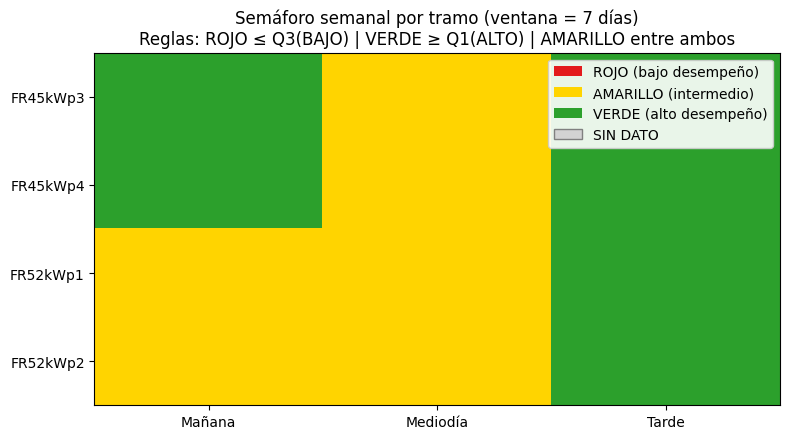


Archivos generados:
- thresholds_por_tramo.csv
- semaforo_semanal.csv
- fig_semaforo.png


In [ ]:
#Tarea Ejercicio
# ==============================
# SEMÁFORO DE MANTENIMIENTO SFV
# ==============================
# Requisitos: pandas, numpy, scikit-learn, matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# ---------- Parámetros ----------
IRR_THRESHOLD = 200.0     # W/m² para filtrar operación diurna
GAMMA_TEMP = -0.004       # -0.4%/°C para corrección térmica (si hay T_C)
WINDOW_DAYS = 7           # ventana para el semáforo semanal
K = 2                     # K-Means en 1D (BAJO/ALTO)
# Tramos horarios [inicio, fin) en hora local
SLOTS = [
    ("Mañana",   8, 11),
    ("Mediodía", 11, 14),
    ("Tarde",   14, 17),
]

# ---------- Cargar CSV (Colab o PC) ----------
def load_csv_interactive():
    # Colab
    try:
        from google.colab import files
        uploaded = files.upload()
        fname = list(uploaded.keys())[0]
        with open(fname, 'r', encoding='utf-8', errors='ignore') as f:
            head = f.read(2048)
        sep = ';' if head.count(';') > head.count(',') else ','
        return pd.read_csv(fname, sep=sep)
    except Exception:
        # Jupyter/PC
        from tkinter import Tk, filedialog
        Tk().withdraw()
        fname = filedialog.askopenfilename(
            title="Selecciona el CSV del SFV",
            filetypes=[("CSV", "*.csv"), ("Todos", "*.*")]
        )
        if not fname:
            raise ValueError("No se seleccionó archivo.")
        with open(fname, 'r', encoding='utf-8', errors='ignore') as f:
            head = f.read(2048)
        sep = ';' if head.count(';') > head.count(',') else ','
        return pd.read_csv(fname, sep=sep)

df = load_csv_interactive()

# ---------- Preprocesamiento ----------
req = {"Inversor", "P_W", "W/m2", "FechaHora"}
missing = req - set(df.columns)
if missing:
    raise ValueError(f"Faltan columnas requeridas: {missing}")

df["FechaHora"] = pd.to_datetime(df["FechaHora"], errors="coerce")
for col in ["P_W", "W/m2", "T_C"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Filtro diurno
df = df[df["W/m2"] > IRR_THRESHOLD].copy()
df["Fecha"] = df["FechaHora"].dt.date
df["Hora"]  = df["FechaHora"].dt.hour

# Índice de desempeño: P_corr/Wm2
if "T_C" in df.columns:
    df["P_corr"] = df["P_W"] / (1.0 + GAMMA_TEMP * (df["T_C"] - 25.0))
else:
    df["P_corr"] = df["P_W"]
df["P_index"] = df["P_corr"] / df["W/m2"]

# ---------- Asignar tramo horario ----------
def bucket_label(h):
    for name, h0, h1 in SLOTS:
        if h0 <= h < h1:
            return name
    return None

df["Tramo"] = df["Hora"].apply(bucket_label)
df = df.dropna(subset=["Tramo"])

# ==========================
# 1) UMBRALES POR TRAMO (K=2)
# ==========================
rows_thr = []
for name, _, _ in SLOTS:
    x = df.loc[df["Tramo"] == name, "P_index"].dropna().values.reshape(-1, 1)
    if len(x) < 10:  # pocas muestras → umbrales por percentiles globales
        if len(x) == 0:
            continue
        low_q3  = float(np.nanpercentile(x, 35))
        high_q1 = float(np.nanpercentile(x, 65))
        mid     = float(np.nanpercentile(x, 50))
        c_low, c_high = float(np.nanmean(x)), float(np.nanmean(x))
    else:
        km = KMeans(n_clusters=K, random_state=42, n_init=10)
        labels = km.fit_predict(x)
        centers = km.cluster_centers_.ravel()
        id_low, id_high = np.argsort(centers)
        x_low  = x[labels == id_low].ravel()
        x_high = x[labels == id_high].ravel()
        # Umbrales del semáforo:
        #   ROJO:  x <= Q3 del clúster BAJO
        #   VERDE: x >= Q1 del clúster ALTO
        #   AMARILLO: entre ambos
        low_q3  = float(np.nanpercentile(x_low, 75))
        high_q1 = float(np.nanpercentile(x_high, 25))
        c_low, c_high = float(centers[id_low]), float(centers[id_high])
        mid = (c_low + c_high) / 2.0  # para referencia

    rows_thr.append({
        "Tramo": name,
        "centro_BAJO": c_low,
        "centro_ALTO": c_high,
        "umbral_ROJO": low_q3,
        "umbral_VERDE": high_q1,
        "limite_mediano": mid
    })

thr = pd.DataFrame(rows_thr).sort_values("Tramo")
thr.to_csv("thresholds_por_tramo.csv", index=False)

print("Umbrales aprendidos por tramo (guardados en thresholds_por_tramo.csv):")
print(thr.to_string(index=False))

# =======================================
# 2) SEMÁFORO SEMANAL (últimos N días)
# =======================================
end_date = df["Fecha"].max()
start_date = pd.to_datetime(end_date) - pd.Timedelta(days=WINDOW_DAYS-1)
mask_week = (pd.to_datetime(df["Fecha"]) >= start_date) & (pd.to_datetime(df["Fecha"]) <= pd.to_datetime(end_date))
df_week = df.loc[mask_week].copy()

# P_index semanal por inversor-tramo (mediana del tramo)
weekly = (df_week.groupby(["Inversor", "Tramo"])["P_index"]
               .median()
               .reset_index())

# Mapear a R/A/V según umbrales del tramo
def classify_row(r):
    t = thr[thr["Tramo"] == r["Tramo"]]
    if t.empty or np.isnan(r["P_index"]):
        return "SIN DATO"
    red_thr   = t["umbral_ROJO"].iloc[0]
    green_thr = t["umbral_VERDE"].iloc[0]
    if r["P_index"] <= red_thr:
        return "ROJO"
    elif r["P_index"] >= green_thr:
        return "VERDE"
    else:
        return "AMARILLO"

weekly["Semaforo"] = weekly.apply(classify_row, axis=1)
weekly.to_csv("semaforo_semanal.csv", index=False)

print("\nSemáforo semanal (guardado en semaforo_semanal.csv):")
print(weekly.pivot(index="Inversor", columns="Tramo", values="Semaforo").fillna("SIN DATO"))

# =======================================
# 3) MINI-DASHBOARD (matriz de colores)
# =======================================
# Matriz Inversor x Tramo con valores 0/1/2 y NaN
inv_list  = sorted(weekly["Inversor"].unique())
slot_list = [s[0] for s in SLOTS]
M = np.full((len(inv_list), len(slot_list)), np.nan)

map_val = {"ROJO": 0, "AMARILLO": 1, "VERDE": 2}
for _, r in weekly.iterrows():
    i = inv_list.index(r["Inversor"])
    j = slot_list.index(r["Tramo"])
    val = map_val.get(r["Semaforo"], np.nan)
    M[i, j] = val

from matplotlib.colors import ListedColormap
import numpy.ma as ma
cmap = ListedColormap(["#e31a1c", "#ffd400", "#2ca02c"])  # rojo, amarillo, verde
cmap.set_bad(color="lightgray")  # SIN DATO

masked = ma.masked_invalid(M)
fig, ax = plt.subplots(figsize=(8, 4.5))
im = ax.imshow(masked, aspect="auto", interpolation="nearest", vmin=0, vmax=2, cmap=cmap)

ax.set_xticks(range(len(slot_list)))
ax.set_xticklabels(slot_list, rotation=0)
ax.set_yticks(range(len(inv_list)))
ax.set_yticklabels(inv_list)
ax.set_title(f"Semáforo semanal por tramo (ventana = {WINDOW_DAYS} días)\n"
             "Reglas: ROJO ≤ Q3(BAJO) | VERDE ≥ Q1(ALTO) | AMARILLO entre ambos")

# Leyenda
from matplotlib.patches import Patch
legend_elems = [
    Patch(facecolor="#e31a1c", label="ROJO (bajo desempeño)"),
    Patch(facecolor="#ffd400", label="AMARILLO (intermedio)"),
    Patch(facecolor="#2ca02c", label="VERDE (alto desempeño)"),
    Patch(facecolor="lightgray", edgecolor="gray", label="SIN DATO")
]
ax.legend(handles=legend_elems, loc="upper right", framealpha=0.9)

plt.tight_layout()
plt.savefig("fig_semaforo.png", dpi=150)
plt.show()

print("\nArchivos generados:")
print("- thresholds_por_tramo.csv")
print("- semaforo_semanal.csv")
print("- fig_semaforo.png")

In [3]:
# ==========================================================
# Reglas de Asociación (Apriori) sobre transacciones diarias OK
# (Salida numérica con ≤ 3 decimales en prints y CSV)
# ==========================================================
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# ----- Formato global para impresión (3 decimales) -----
pd.options.display.float_format = '{:.3f}'.format

# ------- Instalar/Importar mlxtend si hace falta -------
try:
    from mlxtend.frequent_patterns import apriori, association_rules
except ImportError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "mlxtend", "-q"])
    from mlxtend.frequent_patterns import apriori, association_rules

# ------- Parámetros (ajústalos si quieres) -------
IRR_THRESHOLD = 200.0
GAMMA_TEMP = -0.004
CLOUDY_CV = 0.40
HOT_TEMP = 45.0
HIGH_IRR = 700.0
LOW_IRR  = 400.0
MIN_SUPPORT = 0.2
CONF_LEVELS = [0.5, 0.6, 0.7, 0.8]

# ------- Helpers de redondeo (3 decimales) -------
METRIC_COLS = ["support", "confidence", "lift", "leverage", "conviction"]
def round_metrics(df, nd=3):
    if df is None or df.empty:
        return df
    for c in METRIC_COLS:
        if c in df.columns:
            df[c] = df[c].astype(float).round(nd)
    return df

FMT3 = {'support': '{:.3f}'.format, 'confidence': '{:.3f}'.format, 'lift': '{:.3f}'.format}

# ------- Cargar CSV desde tu PC (Colab o Jupyter) -------
def load_csv_interactive():
    # Colab
    try:
        from google.colab import files
        uploaded = files.upload()
        fname = list(uploaded.keys())[0]
        with open(fname, 'r', encoding='utf-8', errors='ignore') as f:
            head = f.read(2048)
        sep = ';' if head.count(';') > head.count(',') else ','
        return pd.read_csv(fname, sep=sep)
    except Exception:
        # Jupyter/PC
        try:
            from tkinter import Tk, filedialog
            Tk().withdraw()
            fname = filedialog.askopenfilename(
                title="Selecciona el CSV del SFV",
                filetypes=[("CSV", "*.csv"), ("Todos", "*.*")]
            )
            if not fname:
                raise ValueError("No se seleccionó archivo.")
            with open(fname, 'r', encoding='utf-8', errors='ignore') as f:
                head = f.read(2048)
            sep = ';' if head.count(';') > head.count(',') else ','
            return pd.read_csv(fname, sep=sep)
        except Exception as e:
            raise e

df = load_csv_interactive()

# ------- Preprocesamiento mínimo -------
req = {"Inversor", "P_W", "W/m2", "FechaHora"}
missing = req - set(df.columns)
if missing:
    raise ValueError(f"Faltan columnas requeridas: {missing}")

df["FechaHora"] = pd.to_datetime(df["FechaHora"], errors="coerce")
for col in ["P_W", "W/m2", "T_C"]:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Filtrar operación diurna
df = df[df["W/m2"] > IRR_THRESHOLD].copy()
df["Fecha"] = df["FechaHora"].dt.date

# P_index (corrige por temperatura si T_C existe)
if "T_C" in df.columns:
    df["P_corr"] = df["P_W"] / (1.0 + GAMMA_TEMP * (df["T_C"] - 25.0))
else:
    df["P_corr"] = df["P_W"]
df["P_index"] = df["P_corr"] / df["W/m2"]

# ------- Métricas diarias por Fecha e Inversor -------
daily = (df.groupby(["Fecha", "Inversor"], as_index=False)
           .agg(P_index=("P_index", "median"),
                Wm2=("W/m2", "mean"),
                T_C=("T_C", "mean") if "T_C" in df.columns else ("P_index", "median"))
        )

# ------- Clasificación diaria por día (k=2) para etiquetar LOW/HIGH -------
records = []
scaler = StandardScaler()
for fecha, g in daily.groupby("Fecha"):
    if len(g) < 2:
        continue  # necesitas >= 2 inversores ese día
    X = g[["P_index"]].values
    Xs = scaler.fit_transform(X)
    labels = KMeans(n_clusters=2, random_state=42, n_init=10).fit_predict(Xs)
    means = pd.Series(g["P_index"].values).groupby(labels).mean().sort_values()
    label_low  = means.index[0]
    for (_, row), lab in zip(g.iterrows(), labels):
        state = "LOW" if lab == label_low else "HIGH"
        records.append({"Fecha": fecha, "Inversor": row["Inversor"],
                        "State": state, "P_index": row["P_index"]})

states = pd.DataFrame(records)

# ------- Contexto del día para la transacción (parque) -------
day_ctx = (df.groupby("Fecha")
             .agg(Wm2_mean=("W/m2", "mean"),
                  Wm2_std=("W/m2", "std"),
                  T_mean=("T_C", "mean") if "T_C" in df.columns else ("P_index", "median"))
          ).reset_index()
day_ctx["CV"] = day_ctx["Wm2_std"] / day_ctx["Wm2_mean"]
day_ctx["CLOUDY"]   = day_ctx["CV"] >= CLOUDY_CV
day_ctx["HIGH_IRR"] = day_ctx["Wm2_mean"] >= HIGH_IRR
day_ctx["LOW_IRR"]  = day_ctx["Wm2_mean"] <= LOW_IRR
day_ctx["HOT"] = day_ctx["T_mean"] >= HOT_TEMP if "T_C" in df.columns else False

# ------- Construcción de transacciones (una fila = una Fecha) -------
dates = sorted(states["Fecha"].unique().tolist())
inverters = sorted(states["Inversor"].unique().tolist())

rows = []
for d in dates:
    items = {}
    g = states[states["Fecha"] == d]
    for inv in inverters:
        low_flag = (g[(g["Inversor"] == inv) & (g["State"] == "LOW")].shape[0] > 0)
        items[f"INV_{inv}_LOW"] = int(low_flag)
    ctx = day_ctx[day_ctx["Fecha"] == d].iloc[0]
    for key in ["CLOUDY", "HIGH_IRR", "LOW_IRR", "HOT"]:
        items[key] = int(bool(ctx[key]))
    items["Fecha"] = d
    rows.append(items)

trans_df = pd.DataFrame(rows).set_index("Fecha").sort_index()

print("\nMatriz transaccional (primeras columnas/filas):")
print(trans_df.iloc[:5, :8])

# ------- Apriori (frequent itemsets) -------
itemsets = apriori(trans_df.astype(bool), min_support=MIN_SUPPORT, use_colnames=True)
itemsets = itemsets.sort_values("support", ascending=False)
itemsets = round_metrics(itemsets)  # <-- redondeo
itemsets.to_csv("freq_itemsets.csv", index=False, float_format="%.3f")

# ------- Reglas con sensibilidad por confianza -------
def stringify(fs):
    return ", ".join(sorted(list(fs)))

all_rules_outputs = []
for conf in CONF_LEVELS:
    rules = association_rules(itemsets, metric="confidence", min_threshold=conf)
    rules = rules.sort_values(["lift", "confidence"], ascending=False)
    rules["antecedents"] = rules["antecedents"].apply(stringify)
    rules["consequents"] = rules["consequents"].apply(stringify)
    rules = round_metrics(rules)  # <-- redondeo
    out_csv = f"assoc_rules_conf_{int(conf*100)}.csv"
    rules.to_csv(out_csv, index=False, float_format="%.3f")
    all_rules_outputs.append((conf, out_csv, len(rules)))
    # Vista rápida (top 10) con formateadores
    print(f"\nTop 10 reglas (conf>={conf:.3f}):")
    print(rules[["antecedents", "consequents", "support", "confidence", "lift"]]
          .head(10).to_string(index=False, formatters=FMT3))

print("\nArchivos de reglas generados:")
for conf, path, n in all_rules_outputs:
    print(f"- {path}  ({n} reglas)")

# ------- Análisis específico de antecedentes/consecuentes -------
rules_all = association_rules(itemsets, metric="confidence", min_threshold=min(CONF_LEVELS))
rules_all["antecedents"] = rules_all["antecedents"].apply(stringify)
rules_all["consequents"] = rules_all["consequents"].apply(stringify)
rules_all = round_metrics(rules_all)

# 1) Consecuente = "INV_*_LOW"
mask_cons_inv = rules_all["consequents"].str.contains("INV_")
rules_cons_inv = rules_all[mask_cons_inv].copy().sort_values(["lift","confidence"], ascending=False)
rules_cons_inv = round_metrics(rules_cons_inv)
rules_cons_inv.to_csv("rules_consecuente_inversor.csv", index=False, float_format="%.3f")

print("\nConsecuente = inversor LOW (coocurrencias entre inversores):")
print(rules_cons_inv[["antecedents","consequents","support","confidence","lift"]]
      .head(10).to_string(index=False, formatters=FMT3))

# 2) Clima/condiciones ⇒ inversor LOW
mask_ctx_to_inv = rules_all["antecedents"].str.contains("CLOUDY|HOT|HIGH_IRR|LOW_IRR") & rules_all["consequents"].str.contains("INV_")
ctx_to_inv = rules_all[mask_ctx_to_inv].copy().sort_values(["lift","confidence"], ascending=False)
ctx_to_inv = round_metrics(ctx_to_inv)
ctx_to_inv.to_csv("rules_contexto_a_inversor.csv", index=False, float_format="%.3f")

print("\nClima/condiciones ⇒ inversor LOW:")
print(ctx_to_inv[["antecedents","consequents","support","confidence","lift"]]
      .head(10).to_string(index=False, formatters=FMT3))

print("\nSalidas guardadas:")
print("- freq_itemsets.csv")
print("- assoc_rules_conf_*.csv (sensibilidad por confianza)")
print("- rules_consecuente_inversor.csv")
print("- rules_contexto_a_inversor.csv")

Saving 1_etfron_Fechas_T_Wm2Vms3ord.csv to 1_etfron_Fechas_T_Wm2Vms3ord (2).csv

Matriz transaccional (primeras columnas/filas):
            INV_FR45kWp3_LOW  INV_FR45kWp4_LOW  INV_FR52kWp1_LOW  \
Fecha                                                              
2025-07-09                 0                 0                 1   
2025-07-10                 0                 0                 1   
2025-07-11                 0                 0                 0   
2025-07-12                 0                 0                 1   
2025-07-14                 0                 0                 1   

            INV_FR52kWp2_LOW  CLOUDY  HIGH_IRR  LOW_IRR  HOT  
Fecha                                                         
2025-07-09                 0       0         0        1    0  
2025-07-10                 1       0         0        1    0  
2025-07-11                 1       0         0        0    0  
2025-07-12                 1       0         0        0    0  
2025-07-14      